# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


# Libarary

In [8]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

#import missingno as msno
#from textwrap import wrap

# Data loading

In [9]:
transaction_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
demographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
address_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Transactions


#### Step1. 讀取Dataset & 做基本處理和調整

In [11]:
# Loading dataset
transaction_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')


In [12]:
# View data
# 這裡的column name並不是真正的column name
# 可觀察到這裡讀出來的column name都是 unnamed..
transaction_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                     transaction_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  3                                                                                                                              
4                                                  4                                                                                                                              

   Unnamed: 1   Unnamed: 2        Unnamed: 3    Unnamed: 4    Unnamed: 5  \
0  product_id  customer_id  transaction_date  online_order  order_status   
1           2         2950        25/02/2024         False      Approved   
2           3         3120        21/05/2024          True      Approved   
3          37          402        16/10/2024         False      Approved   
4          88         3135        31/08/2024         False      Approved   

       Unnamed: 6    Unnamed: 7     Unnamed: 8    Unnamed: 9 Unnamed: 10  \
0           brand  product_line  product_class  product_size  list_price   
1           Solex      Standard         medium        medium       71.49   
2   Trek Bicycles      Standard         medium         large     2091.47   
3      OHM Cycles      Standard            low        medium     1793.43   
4  Norco Bicycles      Standard         medium        medium     1198.46   

     Unnamed: 11              Unnamed: 12  
0  standard_cost  product_first_sold_date  
1          53.62                    41245  
2         388.92                    41701  
3         248.82                    36361  
4          381.1                    36145

In [13]:
# 用.iloc 根據整數位置進行索引和選擇數據
# 把column name的位置調整好
# 但又發現inex[0]這個位置也有column name, 那就要把這多餘的column name刪掉

transaction_df.columns = transaction_df.iloc[0]
transaction_df

0      transaction_id  product_id  customer_id     transaction_date  \
0      transaction_id  product_id  customer_id     transaction_date   
1                   1           2         2950           25/02/2024   
2                   2           3         3120           21/05/2024   
3                   3          37          402           16/10/2024   
4                   4          88         3135           31/08/2024   
...               ...         ...          ...                  ...   
19996           19996          51         1018           24/06/2024   
19997           19997          41          127  2024-09-11 00:00:00   
19998           19998          87         2284           14/04/2024   
19999           19999           6         2764  2024-03-07 00:00:00   
20000           20000          11         1144           22/09/2024   

0      online_order  order_status           brand  product_line  \
0      online_order  order_status           brand  product_line   
1             False      Approved           Solex      Standard   
2              True      Approved   Trek Bicycles      Standard   
3             False      Approved      OHM Cycles      Standard   
4             False      Approved  Norco Bicycles      Standard   
...             ...           ...             ...           ...   
19996          True      Approved      OHM Cycles      Standard   
19997          True      Approved           Solex          Road   
19998          True      Approved      OHM Cycles      Standard   
19999         False      Approved      OHM Cycles      Standard   
20000          True      Approved   Trek Bicycles      Standard   

0      product_class  product_size  list_price  standard_cost  \
0      product_class  product_size  list_price  standard_cost   
1             medium        medium       71.49          53.62   
2             medium         large     2091.47         388.92   
3                low        medium     1793.43         248.82   
4             medium        medium     1198.46          381.1   
...              ...           ...         ...            ...   
19996           high        medium     2005.66         1203.4   
19997         medium        medium      416.98         312.74   
19998         medium        medium      1636.9          44.71   
19999           high        medium      227.88         136.73   
20000         medium         small     1775.81        1580.47   

0      product_first_sold_date  
0      product_first_sold_date  
1                        41245  
2                        41701  
3                        36361  
4                        36145  
...                        ...  
19996                    37823  
19997                    35560  
19998                    40410  
19999                    38216  
20000                    36334  

[20001 rows x 13 columns]

In [14]:
# 注意：刪除多餘的row!
# .drop(df.index[0], axis=0, inplace=True)
# 索引哪一行, 是沿著row進行, 並且確定更改
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [15]:
transaction_df

0     transaction_id product_id customer_id     transaction_date online_order  \
1                  1          2        2950           25/02/2024        False   
2                  2          3        3120           21/05/2024         True   
3                  3         37         402           16/10/2024        False   
4                  4         88        3135           31/08/2024        False   
5                  5         78         787  2024-01-10 00:00:00         True   
...              ...        ...         ...                  ...          ...   
19996          19996         51        1018           24/06/2024         True   
19997          19997         41         127  2024-09-11 00:00:00         True   
19998          19998         87        2284           14/04/2024         True   
19999          19999          6        2764  2024-03-07 00:00:00        False   
20000          20000         11        1144           22/09/2024         True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0     list_price standard_cost product_first_sold_date  
1          71.49         53.62                   41245  
2        2091.47        388.92                   41701  
3        1793.43        248.82                   36361  
4        1198.46         381.1                   36145  
5         1765.3        709.48                   42226  
...          ...           ...                     ...  
19996    2005.66        1203.4                   37823  
19997     416.98        312.74                   35560  
19998     1636.9         44.71                   40410  
19999     227.88        136.73                   38216  
20000    1775.81       1580.47                   36334  

[20000 rows x 13 columns]

####Step2. 先觀察Dataset的基本資料

In [16]:
# 總行數：20000
# Categorical Variable: online_order, order_status, brand, product_line, product_size,product_class
# Numerical Variable: list_price, standard_cost
# 其餘：transaction_id, product_id, customer_id, transaction_date, product_first_sold_date
transaction_df.describe()

0       transaction_id  product_id  customer_id transaction_date online_order  \
count            20000       20000        20000            20000        19640   
unique           20000         101         3494              364            2   
top              19984           0         1068       18/08/2024         True   
freq                 1        1378           14               82         9829   

0      order_status  brand product_line product_class product_size  \
count         20000  19803        19803         19803        19803   
unique            2      6            4             3            3   
top        Approved  Solex     Standard        medium       medium   
freq          19821   4253        14176         13826        12990   

0       list_price  standard_cost  product_first_sold_date  
count     20000.00       19803.00                    19803  
unique      296.00         103.00                      100  
top        2091.47         388.92                    33879  
freq        465.00         465.00                      234

In [17]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


#### Step3. 新增一列 Profit

*   因為有list_price 售價 和 standard_cost 成本



In [18]:
# 新增一列：Profit
# 因為有成本和售價,才能多增加這一列去看分佈. 這樣又多了一個Numerical Variable

transaction_df['profit'] = transaction_df['list_price'] - transaction_df['standard_cost']
transaction_df

0     transaction_id product_id customer_id     transaction_date online_order  \
1                  1          2        2950           25/02/2024        False   
2                  2          3        3120           21/05/2024         True   
3                  3         37         402           16/10/2024        False   
4                  4         88        3135           31/08/2024        False   
5                  5         78         787  2024-01-10 00:00:00         True   
...              ...        ...         ...                  ...          ...   
19996          19996         51        1018           24/06/2024         True   
19997          19997         41         127  2024-09-11 00:00:00         True   
19998          19998         87        2284           14/04/2024         True   
19999          19999          6        2764  2024-03-07 00:00:00        False   
20000          20000         11        1144           22/09/2024         True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0     list_price standard_cost product_first_sold_date   profit  
1          71.49         53.62                   41245    17.87  
2        2091.47        388.92                   41701  1702.55  
3        1793.43        248.82                   36361  1544.61  
4        1198.46         381.1                   36145   817.36  
5         1765.3        709.48                   42226  1055.82  
...          ...           ...                     ...      ...  
19996    2005.66        1203.4                   37823   802.26  
19997     416.98        312.74                   35560   104.24  
19998     1636.9         44.71                   40410  1592.19  
19999     227.88        136.73                   38216    91.15  
20000    1775.81       1580.47                   36334   195.34  

[20000 rows x 14 columns]

## 2. Demographic

#### Step1. 讀取Dataset & 做基本處理和調整

In [19]:
# Loading dataset
demographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')

In [20]:
demographic_df.head()

customer_id               name gender  past_3_years_bike_related_purchases  \
0           34  Jephthah Bachmann      U                                   59   
1          144    Jory Barrabeale      U                                   71   
2          168   Reggie Broggetti      U                                    8   
3          267      Edgar Buckler      U                                   53   
4          290     Giorgio Kevane      U                                   42   

          DOB    age               job_title job_industry_category  \
0  1843-12-21  #NUM!         Legal Assistant                    IT   
1         NaN    125      Environmental Tech                    IT   
2         NaN    125         General Manager                    IT   
3         NaN    125                     NaN                    IT   
4         NaN    125  Senior Sales Associate                    IT   

      wealth_segment deceased_indicator owns_car  tenure  
0  Affluent Customer                  N       No    20.0  
1      Mass Customer                  N       No     NaN  
2  Affluent Customer                  N      Yes     NaN  
3     High Net Worth                  N       No     NaN  
4      Mass Customer                  N       No     NaN

In [21]:
demographic_df

customer_id               name  gender  \
0              34  Jephthah Bachmann       U   
1             144    Jory Barrabeale       U   
2             168   Reggie Broggetti       U   
3             267      Edgar Buckler       U   
4             290     Giorgio Kevane       U   
...           ...                ...     ...   
3995         2858    Benedicto Radki    Male   
3996         3173            Angelo     Male   
3997         3435    Stevena Allcock  Female   
3998         3949  Costa Sleightholm    Male   
3999         3997      Blanch Nisuis  Female   

      past_3_years_bike_related_purchases                  DOB    age  \
0                                      59           1843-12-21  #NUM!   
1                                      71                  NaN    125   
2                                       8                  NaN    125   
3                                      53                  NaN    125   
4                                      42                  NaN    125   
...                                   ...                  ...    ...   
3995                                    4  2002-01-09 00:00:00     23   
3996                                   55  2001-10-10 00:00:00     23   
3997                                   80  2002-01-15 00:00:00     23   
3998                                   24  2001-12-19 00:00:00     23   
3999                                   87  2001-07-13 00:00:00     23   

                       job_title job_industry_category     wealth_segment  \
0                Legal Assistant                    IT  Affluent Customer   
1             Environmental Tech                    IT      Mass Customer   
2                General Manager                    IT  Affluent Customer   
3                            NaN                    IT     High Net Worth   
4         Senior Sales Associate                    IT      Mass Customer   
...                          ...                   ...                ...   
3995          Recruiting Manager                   NaN      Mass Customer   
3996  Computer Systems Analyst I                Health      Mass Customer   
3997               Senior Editor                   NaN  Affluent Customer   
3998             Web Designer IV         Manufacturing     High Net Worth   
3999             Statistician II         Manufacturing     High Net Worth   

     deceased_indicator owns_car  tenure  
0                     N       No    20.0  
1                     N       No     NaN  
2                     N      Yes     NaN  
3                     N       No     NaN  
4                     N       No     NaN  
...                 ...      ...     ...  
3995                  N      Yes     1.0  
3996                  N      Yes     1.0  
3997                  N       No     1.0  
3998                  N      Yes     1.0  
3999                  N      Yes     1.0  

[4000 rows x 12 columns]

####Step2. 新增一列age_group
*   因為age的數據太多, 所以設置成有區間的Categorical Variable

In [22]:
# 1. 先把 age 轉成數字, errors='coerce'會把轉不了的值變成 NaN. 避免錯誤
demographic_df['age']= pd.to_numeric(demographic_df['age'], errors='coerce')

# 2. 設置要區隔的分組數
n_bins = 5

# 3. 等數區隔：用quct()自動將年齡依照人數分成N組
demographic_df['age_group'] = pd.qcut(demographic_df['age'], q=n_bins)

# 4. 查看結果
print(demographic_df['age_group'].value_counts().sort_index())

age_group
(22.999, 35.0]    818
(35.0, 46.0]      936
(46.0, 50.0]      662
(50.0, 60.0]      789
(60.0, 125.0]     794
Name: count, dtype: int64


In [23]:
# 用quct()是因為每組會等量又能自動計算分位數
# cut()不能自動調整分組, 但每組範圍是等寬平均

# 加上自定義的標籤
labels = ['20y-35y', '35y-45y','45y-50y','50y-60y','60y+']
demographic_df['age_group'] = pd.qcut(demographic_df['age'], q=n_bins, labels=labels)

print(demographic_df)

      customer_id               name  gender  \
0              34  Jephthah Bachmann       U   
1             144    Jory Barrabeale       U   
2             168   Reggie Broggetti       U   
3             267      Edgar Buckler       U   
4             290     Giorgio Kevane       U   
...           ...                ...     ...   
3995         2858    Benedicto Radki    Male   
3996         3173            Angelo     Male   
3997         3435    Stevena Allcock  Female   
3998         3949  Costa Sleightholm    Male   
3999         3997      Blanch Nisuis  Female   

      past_3_years_bike_related_purchases                  DOB    age  \
0                                      59           1843-12-21    NaN   
1                                      71                  NaN  125.0   
2                                       8                  NaN  125.0   
3                                      53                  NaN  125.0   
4                                      42                 

#### Step3. 查看數據

In [24]:
demographic_df.describe()

customer_id  past_3_years_bike_related_purchases          age  \
count  4000.000000                          4000.000000  3999.000000   
mean   2000.500000                            48.890000    49.018005   
std    1154.844867                            28.715005    16.860273   
min       1.000000                             0.000000    23.000000   
25%    1000.750000                            24.000000    38.000000   
50%    2000.500000                            48.000000    48.000000   
75%    3000.250000                            73.000000    58.000000   
max    4000.000000                            99.000000   125.000000   

            tenure  
count  3913.000000  
mean     10.657041  
std       5.660146  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      15.000000  
max      22.000000

In [25]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          4000 non-null   int64   
 1   name                                 4000 non-null   object  
 2   gender                               4000 non-null   object  
 3   past_3_years_bike_related_purchases  4000 non-null   int64   
 4   DOB                                  3913 non-null   object  
 5   age                                  3999 non-null   float64 
 6   job_title                            3494 non-null   object  
 7   job_industry_category                3344 non-null   object  
 8   wealth_segment                       4000 non-null   object  
 9   deceased_indicator                   4000 non-null   object  
 10  owns_car                             4000 non-null   object  
 11  tenure           

## 3. Address

#### Step1. 讀取Dataset & 做基本處理和調整

In [26]:
address_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

In [27]:
address_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                        customer_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  4                                                                                                                              
4                                                  5                                                                                                                              

            Unnamed: 1 Unnamed: 2       Unnamed: 3 Unnamed: 4  \
0              address   postcode            state    country   
1   060 Morning Avenue       2016  New South Wales  Australia   
2  6 Meadow Vale Court       2153  New South Wales  Australia   
3   0 Holy Cross Court       4211              QLD  Australia   
4  17979 Del Mar Point       2448  New South Wales  Australia   

           Unnamed: 5  
0  property_valuation  
1                  10  
2                  10  
3                   9  
4                   4

In [28]:
address_df.columns = address_df.iloc[0]
address_df

0     customer_id                    address  postcode            state  \
0     customer_id                    address  postcode            state   
1               1         060 Morning Avenue      2016  New South Wales   
2               2        6 Meadow Vale Court      2153  New South Wales   
3               4         0 Holy Cross Court      4211              QLD   
4               5        17979 Del Mar Point      2448  New South Wales   
...           ...                        ...       ...              ...   
3995         3999            1482 Hauk Trail      3064              VIC   
3996         4000  57042 Village Green Point      4511              QLD   
3997         4001     87 Crescent Oaks Alley      2756              NSW   
3998         4002           8194 Lien Street      4032              QLD   
3999         4003            320 Acker Drive      2251              NSW   

0       country  property_valuation  
0       country  property_valuation  
1     Australia                  10  
2     Australia                  10  
3     Australia                   9  
4     Australia                   4  
...         ...                 ...  
3995  Australia                   3  
3996  Australia                   6  
3997  Australia                  10  
3998  Australia                   7  
3999  Australia                   7  

[4000 rows x 6 columns]

In [29]:
address_df.drop(index=address_df.index[0], axis=0, inplace=True)
address_df

0    customer_id                    address postcode            state  \
1              1         060 Morning Avenue     2016  New South Wales   
2              2        6 Meadow Vale Court     2153  New South Wales   
3              4         0 Holy Cross Court     4211              QLD   
4              5        17979 Del Mar Point     2448  New South Wales   
5              6           9 Oakridge Court     3216              VIC   
...          ...                        ...      ...              ...   
3995        3999            1482 Hauk Trail     3064              VIC   
3996        4000  57042 Village Green Point     4511              QLD   
3997        4001     87 Crescent Oaks Alley     2756              NSW   
3998        4002           8194 Lien Street     4032              QLD   
3999        4003            320 Acker Drive     2251              NSW   

0       country property_valuation  
1     Australia                 10  
2     Australia                 10  
3     Australia                  9  
4     Australia                  4  
5     Australia                  9  
...         ...                ...  
3995  Australia                  3  
3996  Australia                  6  
3997  Australia                 10  
3998  Australia                  7  
3999  Australia                  7  

[3999 rows x 6 columns]

#### Step2. 整理State這列的重複名稱
*   這列裡有重疊的正寫和縮寫的值, 一率合併成縮寫名稱

In [30]:
address_df = address_df.replace("New South Wales","NSW")
address_df = address_df.replace("Victoria","VIC")

/tmp/ipython-input-30-291571126.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  address_df = address_df.replace("New South Wales","NSW")


####Step3. 先觀察Dataset的基本資料

In [31]:
address_df.describe()

0      customer_id     postcode  property_valuation
count  3999.000000  3999.000000         3999.000000
mean   2003.987997  2985.755939            7.514379
std    1154.576912   844.878364            2.824663
min       1.000000  2000.000000            1.000000
25%    1004.500000  2200.000000            6.000000
50%    2004.000000  2768.000000            8.000000
75%    3003.500000  3750.000000           10.000000
max    4003.000000  4883.000000           12.000000

In [32]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# Data Cleaning : Checking & Organizing the Missing Value

## 1. Transaction

In [33]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
 13  profit                   19803 non-null  object
dtypes: object(14)
memory usage: 2.1+ MB
No

### (1) Numerical Variable

In [34]:
print(transaction_df.isnull().values.sum())

1739


In [35]:
transaction_df = transaction_df.replace(" ",np.nan)

In [36]:
transaction_df['standard_cost'] = transaction_df['standard_cost'].fillna(transaction_df['standard_cost'].median())

/tmp/ipython-input-36-3492584370.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transaction_df['standard_cost'] = transaction_df['standard_cost'].fillna(transaction_df['standard_cost'].median())


In [37]:
print(transaction_df.isnull().values.sum())

1542


In [38]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  object 
 1   product_id               20000 non-null  object 
 2   customer_id              20000 non-null  object 
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  19803 non-null  object 
 13  profit                   19803 non-null  object 
dtypes: float64(1), object(

###(2) Categorical Variable

In [39]:
 transaction_df['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [40]:
transaction_df['product_line'].value_counts().index[0]

'Standard'

In [41]:
# 對於每一列的categorical variable就可以寫for loop

print(transaction_df.info())
for col in transaction_df.columns:

    # Check if the column is of object type 代表是cate v
    # 判斷每一列是否為 object

    if transaction_df[col].dtypes == 'object':

        # Impute with the most frequent value 用fillna with 這列的眾數

        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify 最後再計算看看還有無缺失值

print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  object 
 1   product_id               20000 non-null  object 
 2   customer_id              20000 non-null  object 
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  19803 non-null  object 
 13  profit                   19803 non-null  object 
dtypes: float64(1), object(

/tmp/ipython-input-41-510843083.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
/tmp/ipython-input-41-510843083.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
/tmp/ipython-input-41-510843083.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) 

In [42]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  bool   
 5   order_status             20000 non-null  object 
 6   brand                    20000 non-null  object 
 7   product_line             20000 non-null  object 
 8   product_class            20000 non-null  object 
 9   product_size             20000 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  int64  
 13  profit                   20000 non-null  float64
dtypes: bool(1), float64(3)

## 2. Demographic

In [43]:
print(demographic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          4000 non-null   int64   
 1   name                                 4000 non-null   object  
 2   gender                               4000 non-null   object  
 3   past_3_years_bike_related_purchases  4000 non-null   int64   
 4   DOB                                  3913 non-null   object  
 5   age                                  3999 non-null   float64 
 6   job_title                            3494 non-null   object  
 7   job_industry_category                3344 non-null   object  
 8   wealth_segment                       4000 non-null   object  
 9   deceased_indicator                   4000 non-null   object  
 10  owns_car                             4000 non-null   object  
 11  tenure           

### (1) Numerical Variable

In [44]:
print(demographic_df.isnull().values.sum())

1338


In [45]:
demographic_df = demographic_df.replace(" ",np.nan)

In [46]:
demographic_df['tenure'] = demographic_df['tenure'].fillna(demographic_df['tenure'].median())
demographic_df['age'] = demographic_df['age'].fillna(demographic_df['age'].median())
print(demographic_df.isnull().values.sum())

1250


### (2) Categorical Variable

In [47]:
demographic_df['job_industry_category'].value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Agriculture           113
Telecommunications     72
Name: count, dtype: int64

In [48]:
demographic_df['job_industry_category'].value_counts().index[0]

'Manufacturing'

In [49]:
# 對於每一列的categorical variable就可以寫for loop

for col in demographic_df.columns:

    # Check if the column is of object type 代表是cate v
    # 判斷每一列是否為 object

    if demographic_df[col].dtypes == 'object':

        # Impute with the most frequent value 用fillna with 這列的眾數

        demographic_df[col] =  demographic_df[col].fillna(demographic_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify 最後再計算看看還有無缺失值

print(demographic_df.isnull().values.sum())

1


In [50]:
print(demographic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          4000 non-null   int64   
 1   name                                 4000 non-null   object  
 2   gender                               4000 non-null   object  
 3   past_3_years_bike_related_purchases  4000 non-null   int64   
 4   DOB                                  4000 non-null   object  
 5   age                                  4000 non-null   float64 
 6   job_title                            4000 non-null   object  
 7   job_industry_category                4000 non-null   object  
 8   wealth_segment                       4000 non-null   object  
 9   deceased_indicator                   4000 non-null   object  
 10  owns_car                             4000 non-null   object  
 11  tenure           

In [51]:
demographic_df['age_group'].value_counts()

age_group
35y-45y    936
20y-35y    818
60y+       794
50y-60y    789
45y-50y    662
Name: count, dtype: int64

In [52]:
demographic_df['age_group'].value_counts().index[0]

'35y-45y'

In [53]:
if demographic_df['age_group'].dtypes == 'category':
    demographic_df['age_group'] = demographic_df['age_group'].fillna(demographic_df['age_group'].value_counts().index[0])
    print(demographic_df.isnull().values.sum())

0


In [54]:
print(demographic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          4000 non-null   int64   
 1   name                                 4000 non-null   object  
 2   gender                               4000 non-null   object  
 3   past_3_years_bike_related_purchases  4000 non-null   int64   
 4   DOB                                  4000 non-null   object  
 5   age                                  4000 non-null   float64 
 6   job_title                            4000 non-null   object  
 7   job_industry_category                4000 non-null   object  
 8   wealth_segment                       4000 non-null   object  
 9   deceased_indicator                   4000 non-null   object  
 10  owns_car                             4000 non-null   object  
 11  tenure           

# Join 3 Tables

In [55]:
join_df = pd.merge(transaction_df, demographic_df, on='customer_id', how = 'inner').merge(address_df, on='customer_id', how = 'inner')
join_df

transaction_id  product_id  customer_id     transaction_date  \
0                   1           2         2950           25/02/2024   
1                   2           3         3120           21/05/2024   
2                   3          37          402           16/10/2024   
3                   4          88         3135           31/08/2024   
4                   5          78          787  2024-01-10 00:00:00   
...               ...         ...          ...                  ...   
19963           19996          51         1018           24/06/2024   
19964           19997          41          127  2024-09-11 00:00:00   
19965           19998          87         2284           14/04/2024   
19966           19999           6         2764  2024-03-07 00:00:00   
19967           20000          11         1144           22/09/2024   

       online_order order_status           brand product_line product_class  \
0             False     Approved           Solex     Standard        medium   
1              True     Approved   Trek Bicycles     Standard        medium   
2             False     Approved      OHM Cycles     Standard           low   
3             False     Approved  Norco Bicycles     Standard        medium   
4              True     Approved  Giant Bicycles     Standard        medium   
...             ...          ...             ...          ...           ...   
19963          True     Approved      OHM Cycles     Standard          high   
19964          True     Approved           Solex         Road        medium   
19965          True     Approved      OHM Cycles     Standard        medium   
19966         False     Approved      OHM Cycles     Standard          high   
19967          True     Approved   Trek Bicycles     Standard        medium   

      product_size  ...     wealth_segment  deceased_indicator  owns_car  \
0           medium  ...      Mass Customer                   N       Yes   
1            large  ...      Mass Customer                   N       Yes   
2           medium  ...  Affluent Customer                   N        No   
3           medium  ...      Mass Customer                   N        No   
4            large  ...  Affluent Customer                   N       Yes   
...            ...  ...                ...                 ...       ...   
19963       medium  ...      Mass Customer                   N       Yes   
19964       medium  ...      Mass Customer                   N        No   
19965       medium  ...     High Net Worth                   N        No   
19966       medium  ...      Mass Customer                   N       Yes   
19967        small  ...     High Net Worth                   N       Yes   

       tenure age_group               address  postcode state    country  \
0        10.0      60y+     984 Hoepker Court      3064   VIC  Australia   
1        10.0   35y-45y       4 Shopko Circle      2196   NSW  Australia   
2        22.0   45y-50y    586 Miller Parkway      2835   NSW  Australia   
3        16.0      60y+   1617 Harper Parkway      2096   NSW  Australia   
4         2.0   20y-35y    0601 Stephen Place      2292   NSW  Australia   
...       ...       ...                   ...       ...   ...        ...   
19963     7.0   20y-35y         3 Hayes Court      3109   VIC  Australia   
19964    19.0   45y-50y    0 Pearson Crossing      4405   QLD  Australia   
19965    14.0   50y-60y  10055 Old Shore Lane      3630   VIC  Australia   
19966    20.0      60y+       1 Wayridge Park      4301   QLD  Australia   
19967     5.0   20y-35y      4439 7th Terrace      2177   NSW  Australia   

      property_valuation  
0                      6  
1                      5  
2                      1  
3                     10  
4                      7  
...                  ...  
19963                 10  
19964                  1  
19965                  1  
19966                  1  
19967                  9  

[19968 rows x 31 columns]

In [56]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       19968 non-null  int64   
 1   product_id                           19968 non-null  int64   
 2   customer_id                          19968 non-null  int64   
 3   transaction_date                     19968 non-null  object  
 4   online_order                         19968 non-null  bool    
 5   order_status                         19968 non-null  object  
 6   brand                                19968 non-null  object  
 7   product_line                         19968 non-null  object  
 8   product_class                        19968 non-null  object  
 9   product_size                         19968 non-null  object  
 10  list_price                           19968 non-null  float64 
 11  standard_cost  

In [57]:
join_df.describe()

transaction_id    product_id   customer_id    list_price  \
count    19968.000000  19968.000000  19968.000000  19968.000000   
mean      9997.846504     45.365986   1740.254307   1107.780004   
std       5773.929973     30.750115   1009.819066    582.852548   
min          1.000000      0.000000      1.000000     12.010000   
25%       4997.750000     18.000000    861.750000    575.270000   
50%       9996.500000     44.000000   1739.500000   1163.890000   
75%      14996.250000     72.000000   2614.250000   1635.300000   
max      20000.000000    100.000000   3500.000000   2091.470000   

       standard_cost  product_first_sold_date        profit  \
count   19968.000000             19968.000000  19968.000000   
mean      555.617309             38156.556390    563.188835   
std       404.007418              2892.152257    503.922948   
min         7.210000             33259.000000      4.800000   
25%       215.140000             35560.000000    135.850000   
50%       507.580000             38206.000000    445.210000   
75%       795.100000             40672.000000    834.940000   
max      1759.850000             42710.000000   1702.550000   

       past_3_years_bike_related_purchases           age        tenure  \
count                         19968.000000  19968.000000  19968.000000   
mean                             48.757412     48.983724     10.689052   
std                              28.611359     16.947120      5.611093   
min                               0.000000     23.000000      1.000000   
25%                              24.000000     38.000000      6.000000   
50%                              48.000000     47.000000     11.000000   
75%                              73.000000     58.000000     15.000000   
max                              99.000000    125.000000     22.000000   

           postcode  property_valuation  
count  19968.000000        19968.000000  
mean    2987.623347            7.516376  
std      851.306647            2.824783  
min     2000.000000            1.000000  
25%     2200.000000            6.000000  
50%     2767.000000            8.000000  
75%     3754.000000           10.000000  
max     4883.000000           12.000000

# EDA - Transaction table merge customer table - dist - strip - rel - heatmap......

## 1. 單列、單一維度(前面都有寫過了,這裡省略)

##2. 兩個維度：x軸categorical variable, y軸numerical variable

*   Strip Plot
*   Box Plot
*   Count Plot



In [58]:
# 兩個維度可以用 Strip Plot 和 Count Plot 來畫圖
# Strip Plot 如果看不出區別、不好畫圖的話, 可以換成Box Plot之類的

### (1) Strip Plot




In [59]:
# 數據太分散，不適用

### (2) Box Plot

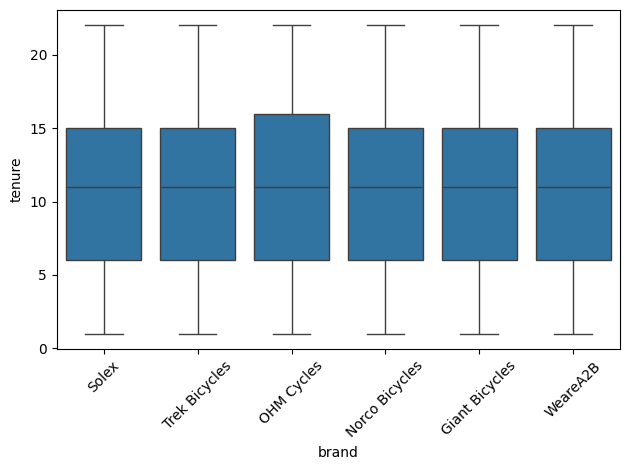

In [60]:
# 1-1.
# x='brand', y='tenure'
sns.boxplot(x='brand', y='tenure', data=join_df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

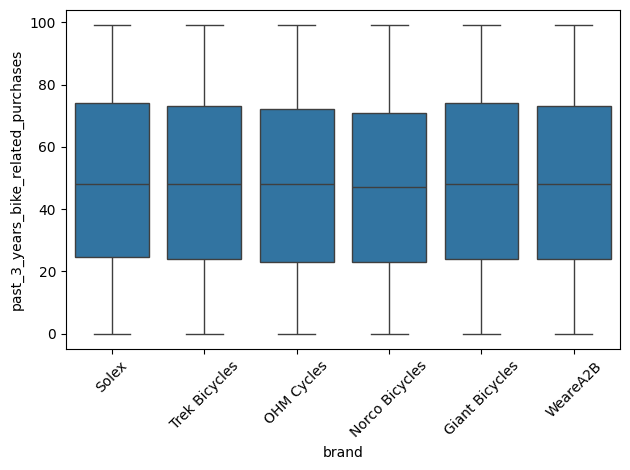

In [61]:
# 1-2. x='brand', y='past_3_years_bike_related_purchases'
sns.boxplot(x='brand', y='past_3_years_bike_related_purchases', data=join_df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='product_line', ylabel='tenure'>

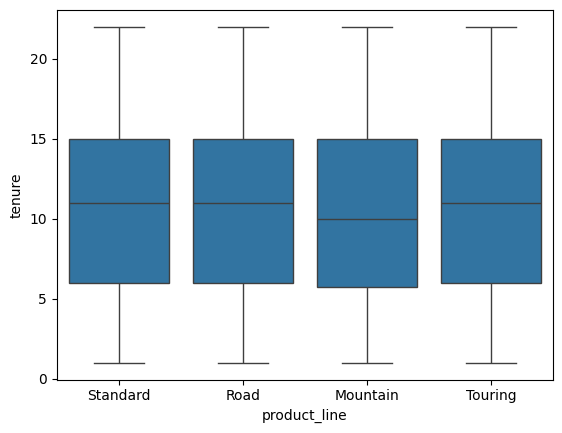

In [62]:
# 2-1. x='product_line', y='tenure'
sns.boxplot(x='product_line', y='tenure', data=join_df)

<Axes: xlabel='product_line', ylabel='past_3_years_bike_related_purchases'>

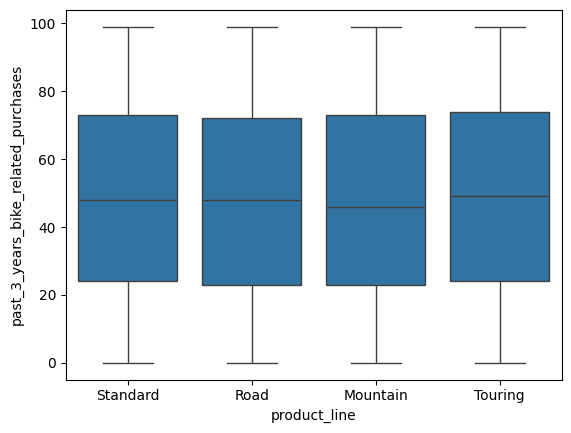

In [63]:
# 2-2. x='product_line', y='past_3_years_bike_related_purchases'
sns.boxplot(x='product_line', y='past_3_years_bike_related_purchases', data=join_df)

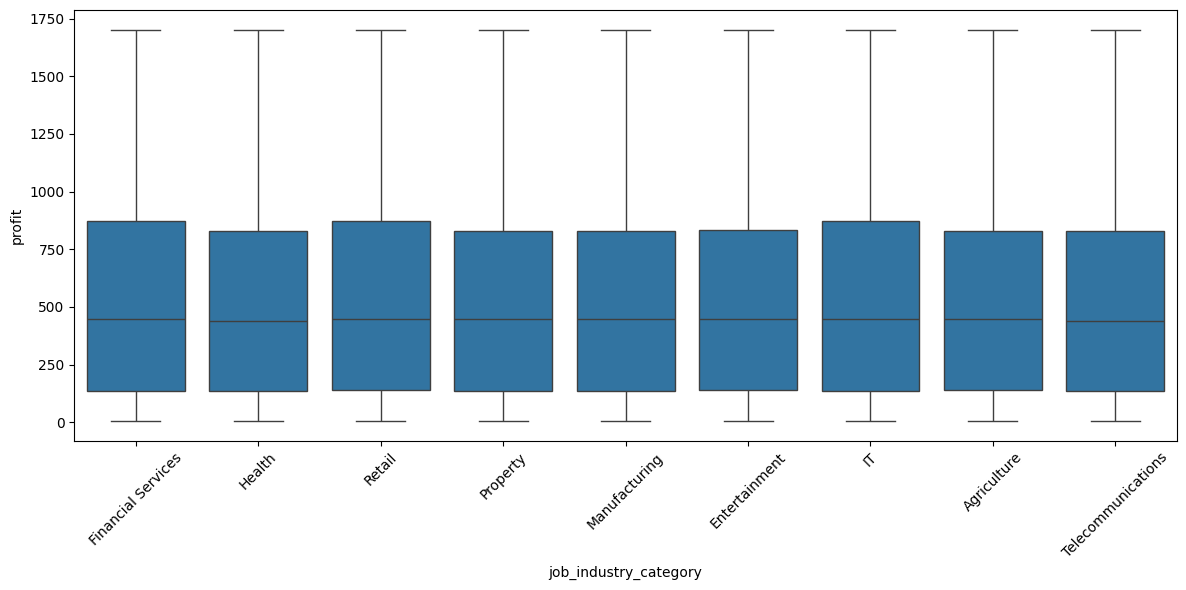

In [64]:
# 3-1. x='job_insudstry_category', y='profit'
plt.figure(figsize=(12,6))
sns.boxplot(x='job_industry_category', y='profit', data=join_df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='age_group', ylabel='profit'>

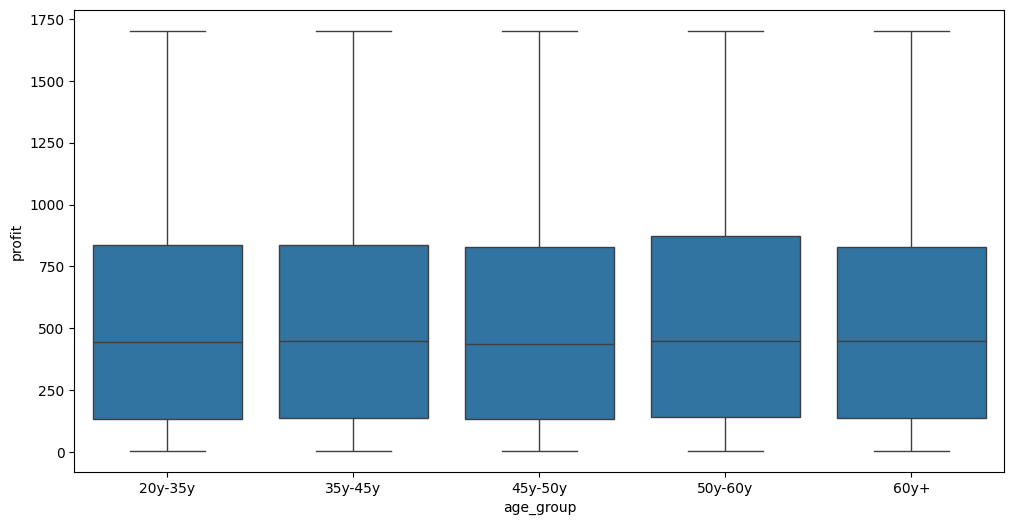

In [65]:
# 3-2. x='age_group', y='profit'
plt.figure(figsize=(12,6))
sns.boxplot(x='age_group', y='profit', data=join_df)


<Axes: xlabel='state', ylabel='profit'>

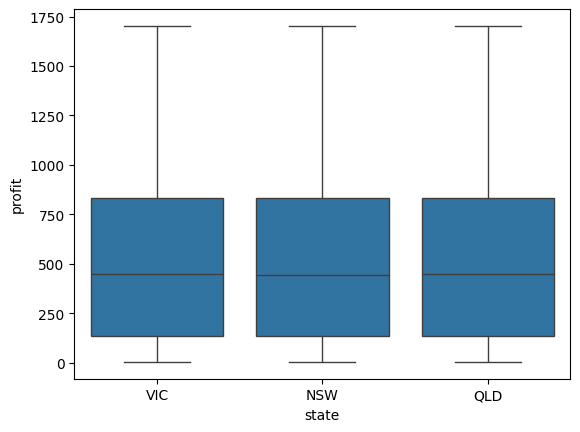

In [66]:
# 4-1. x= 'state', y='profit'
sns.boxplot(x='state', y='profit', data=join_df)

<Axes: xlabel='property_valuation', ylabel='profit'>

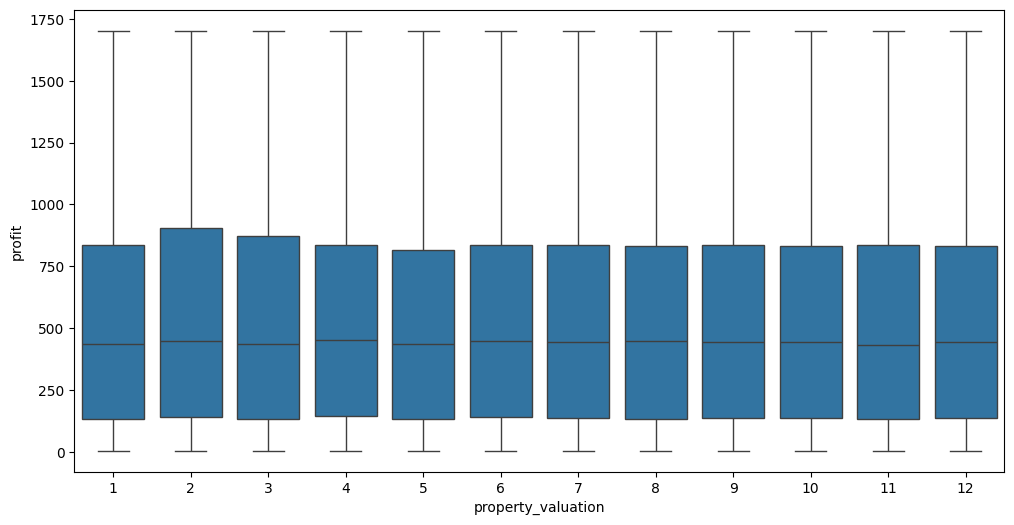

In [67]:
# 4-2. x='property_valuation', y='profit'
plt.figure(figsize=(12,6))
sns.boxplot(x='property_valuation', y='profit', data=join_df)

<Axes: xlabel='state', ylabel='tenure'>

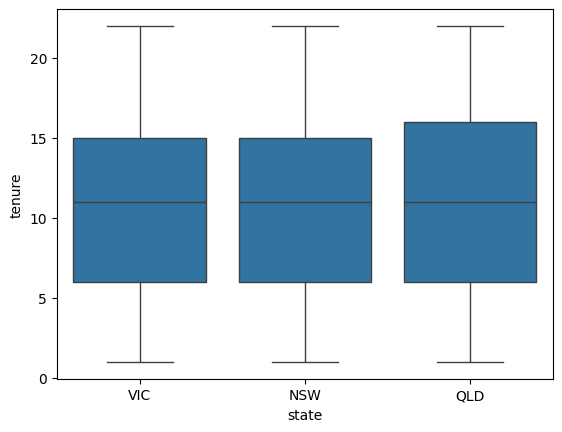

In [68]:
# 5-1. x='state', y='tenure'
sns.boxplot(x='state', y='tenure', data=join_df)

<Axes: xlabel='property_valuation', ylabel='tenure'>

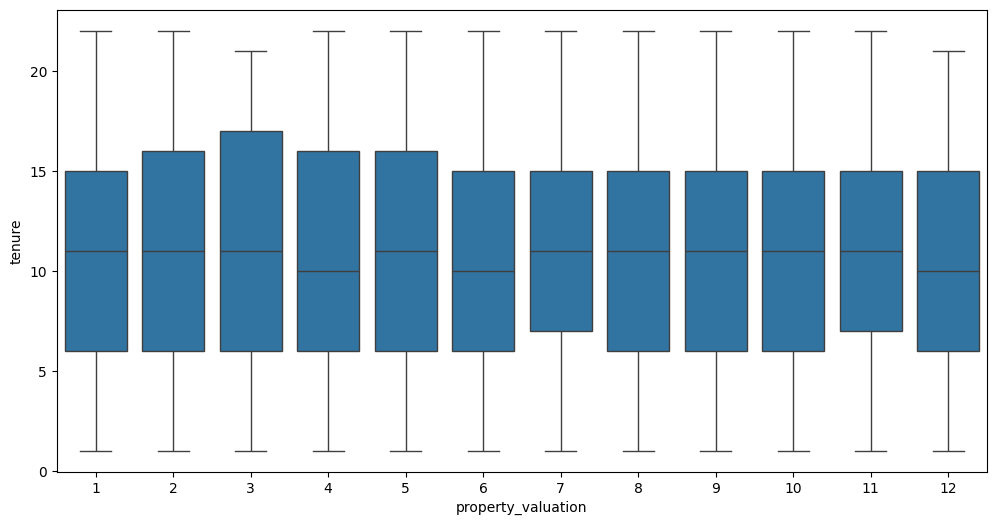

In [69]:
# 5-2. x='property_valuation', y='tenure'
plt.figure(figsize=(12,6))
sns.boxplot(x='property_valuation', y='tenure', data=join_df)

<Axes: xlabel='state', ylabel='past_3_years_bike_related_purchases'>

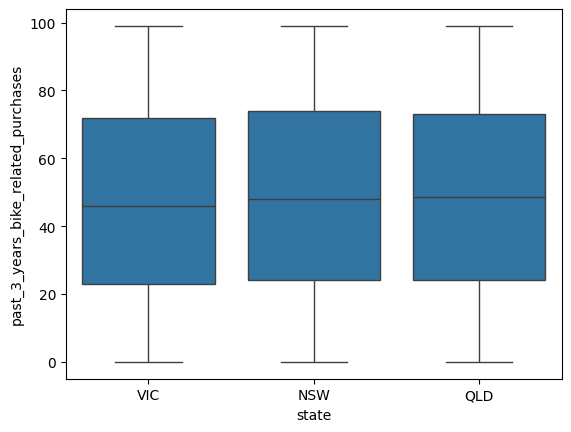

In [70]:
# 6-1. x='state', y='past_3_years_bike_related_purchases'
sns.boxplot(x='state', y='past_3_years_bike_related_purchases', data=join_df)

<Axes: xlabel='property_valuation', ylabel='past_3_years_bike_related_purchases'>

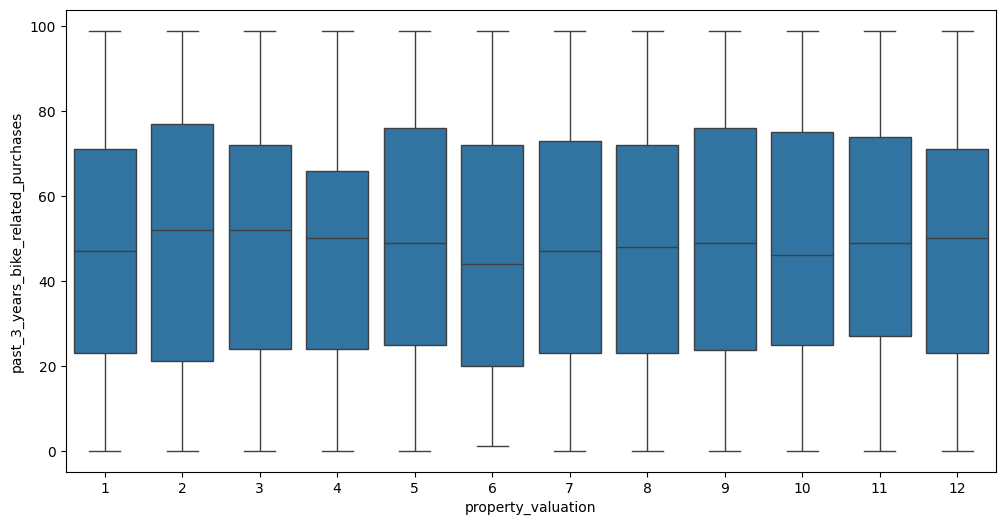

In [71]:
# 6-2. x='property_valuation', y='past_3_years_bike_related_purchases'
plt.figure(figsize=(12,6))
sns.boxplot(x='property_valuation', y='past_3_years_bike_related_purchases', data=join_df)

### (3) Count Plot ( x軸 ＆ hue 都是Categorical )
* 因為y軸是計算總數, 自然屬於numerical

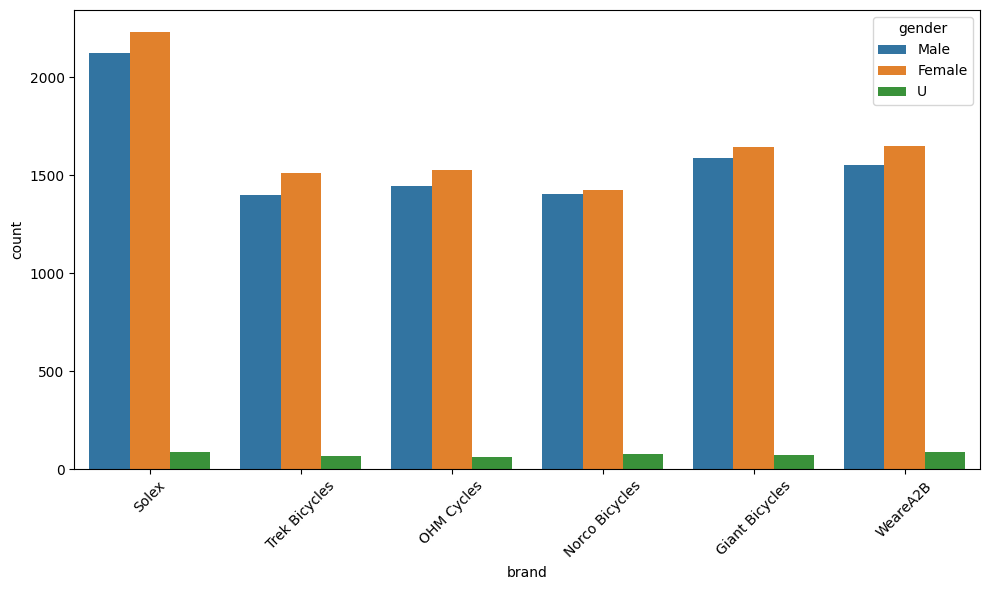

In [72]:
# 1-1. x='brand', hue='gender'
plt.figure(figsize=(10,6))
sns.countplot(x='brand', data=join_df, hue='gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

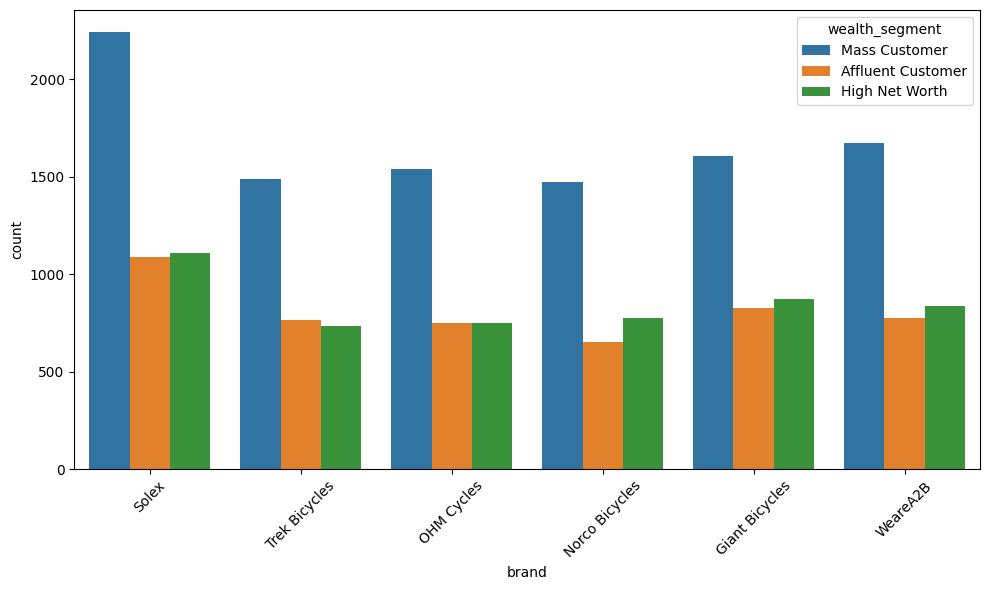

In [73]:
# 1-2. x='brand', hue='wealth_segment'
plt.figure(figsize=(10,6))
sns.countplot(x='brand', data=join_df, hue='wealth_segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

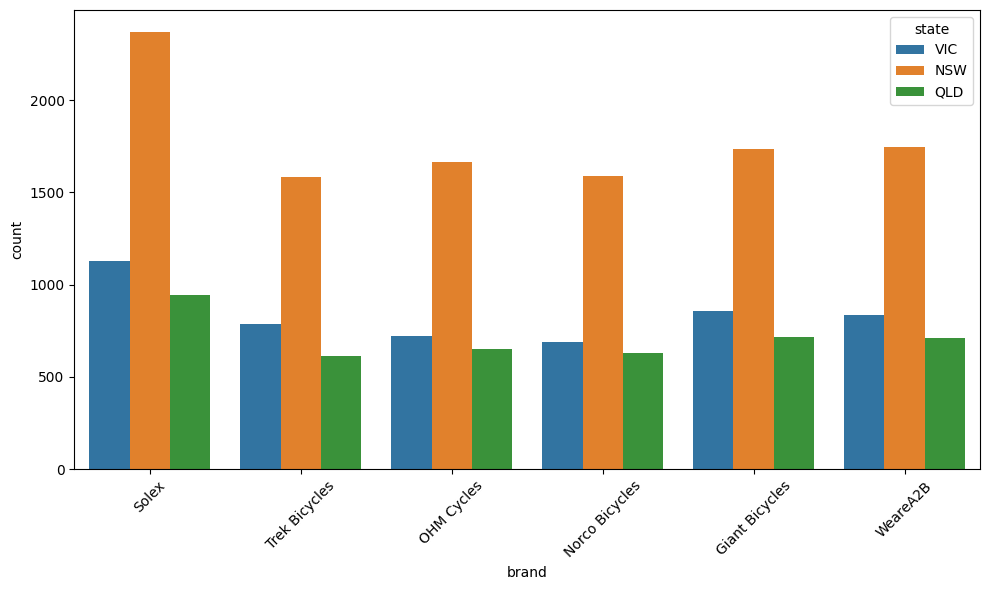

In [74]:
# 1-3. x='brand', hue='state'
plt.figure(figsize=(10,6))
sns.countplot(x='brand', data=join_df, hue='state')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='product_line', ylabel='count'>

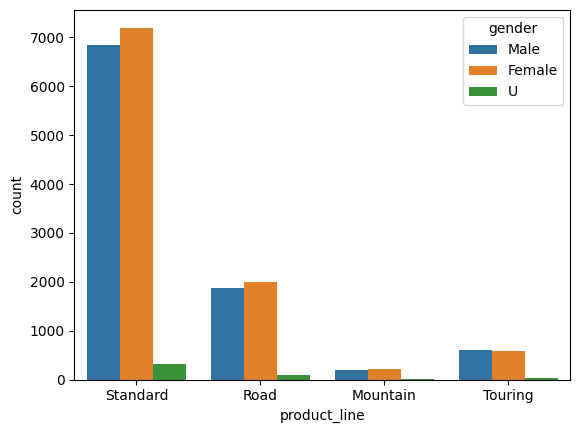

In [75]:
# 2-1. x='product_line', hue='gender'
sns.countplot(x='product_line', data=join_df, hue='gender')


<Axes: xlabel='product_line', ylabel='count'>

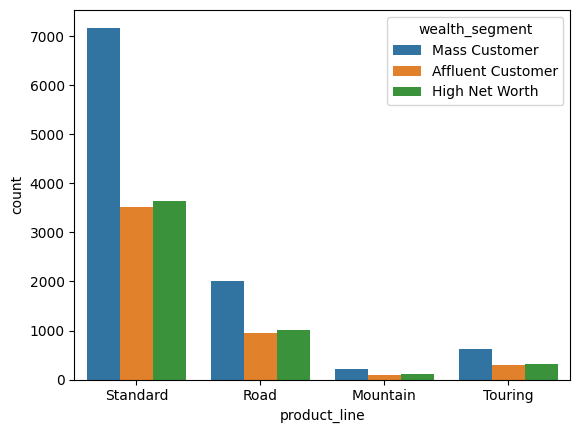

In [76]:
# 2-2. x='product_line', hue='wealth_segment'
sns.countplot(x='product_line', data=join_df, hue='wealth_segment')

<Axes: xlabel='product_line', ylabel='count'>

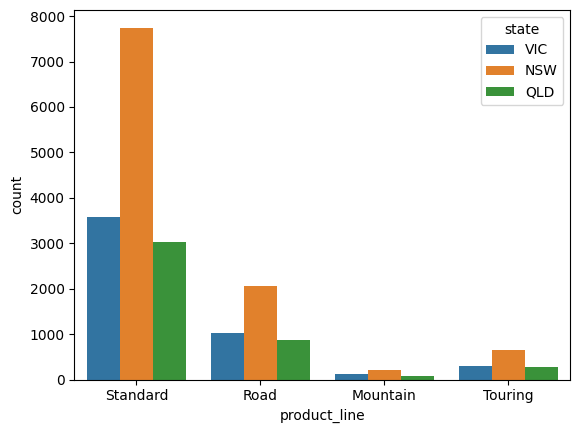

In [77]:
# 2-3. x='product_line', hue='state'
sns.countplot(x='product_line', data=join_df, hue='state')


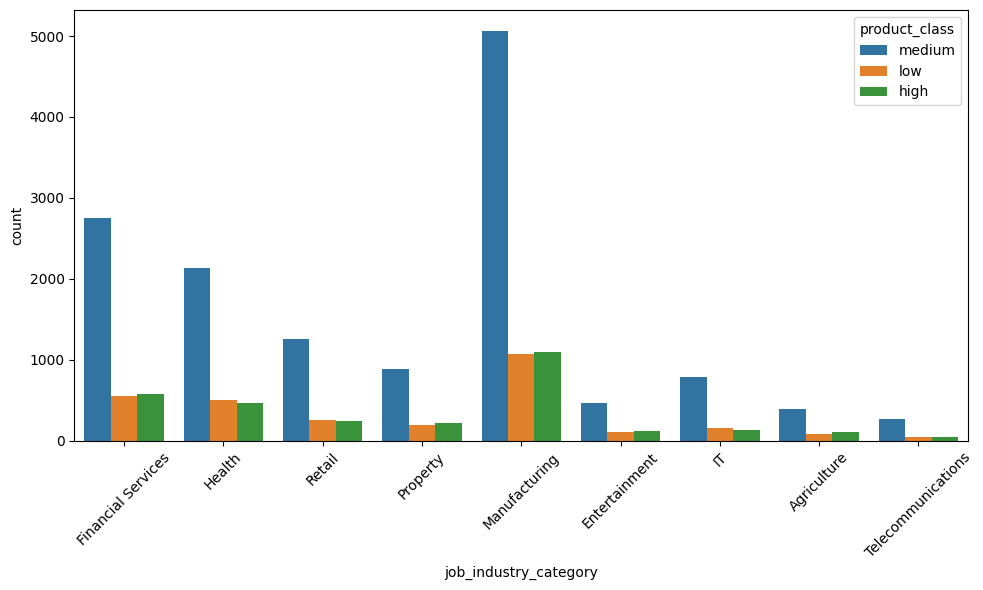

In [78]:
# 3-1. x='job_industry_category', hue='product_class'
plt.figure(figsize=(10,6))
sns.countplot(x='job_industry_category', data=join_df, hue='product_class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
# 3-2. x='job_industry_category', y ='product_size' 和上圖沒有太大的差異

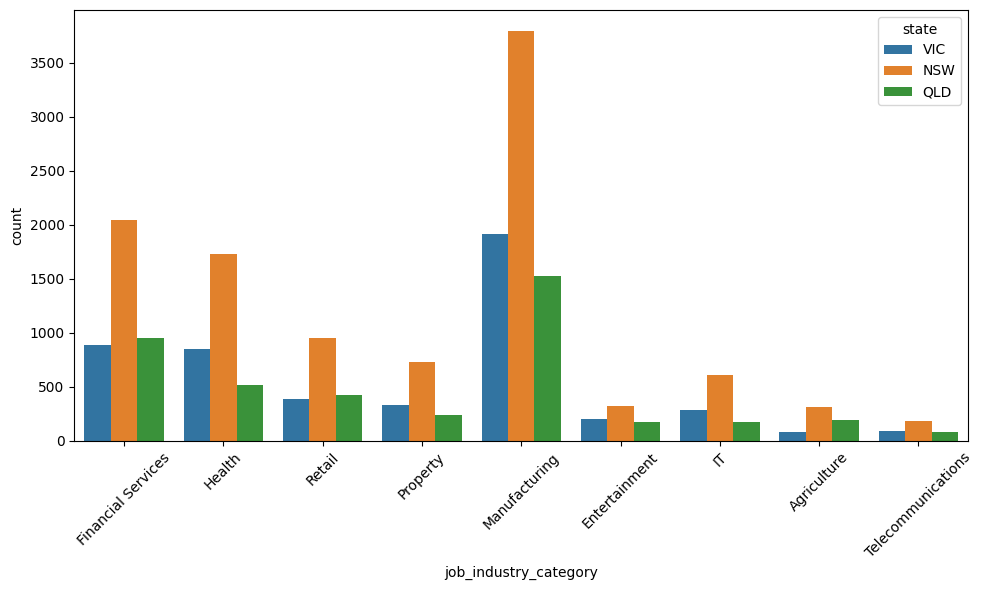

In [80]:
# 3-3. x='job_industry_category', y ='state'
plt.figure(figsize=(10,6))
sns.countplot(x='job_industry_category', data=join_df, hue='state')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='age_group', ylabel='count'>

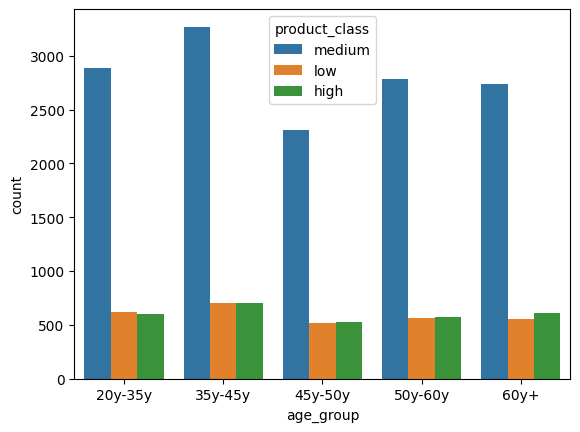

In [81]:
# 4-1. x='age_group', hue='product_class'

sns.countplot(x='age_group', data=join_df, hue='product_class')

<Axes: xlabel='age_group', ylabel='count'>

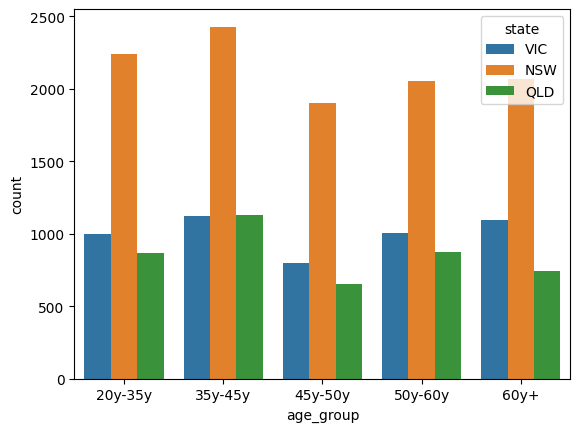

In [82]:
# 4-2. x='age_group', hue='state'
sns.countplot(x='age_group', data=join_df, hue='state')

<Axes: xlabel='property_valuation', ylabel='count'>

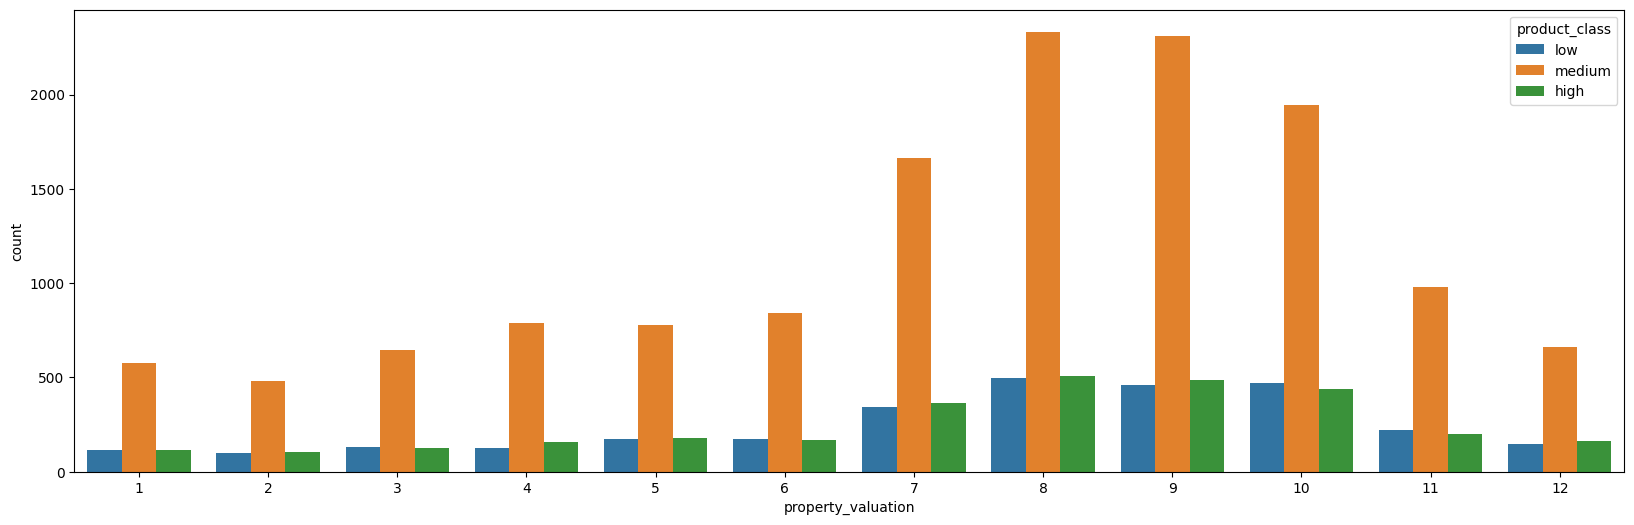

In [83]:
# 5-1. x='property_valuation', hue='product_class'
plt.figure(figsize=(20,6))
sns.countplot(x='property_valuation', data=join_df, hue='product_class')

<Axes: xlabel='property_valuation', ylabel='count'>

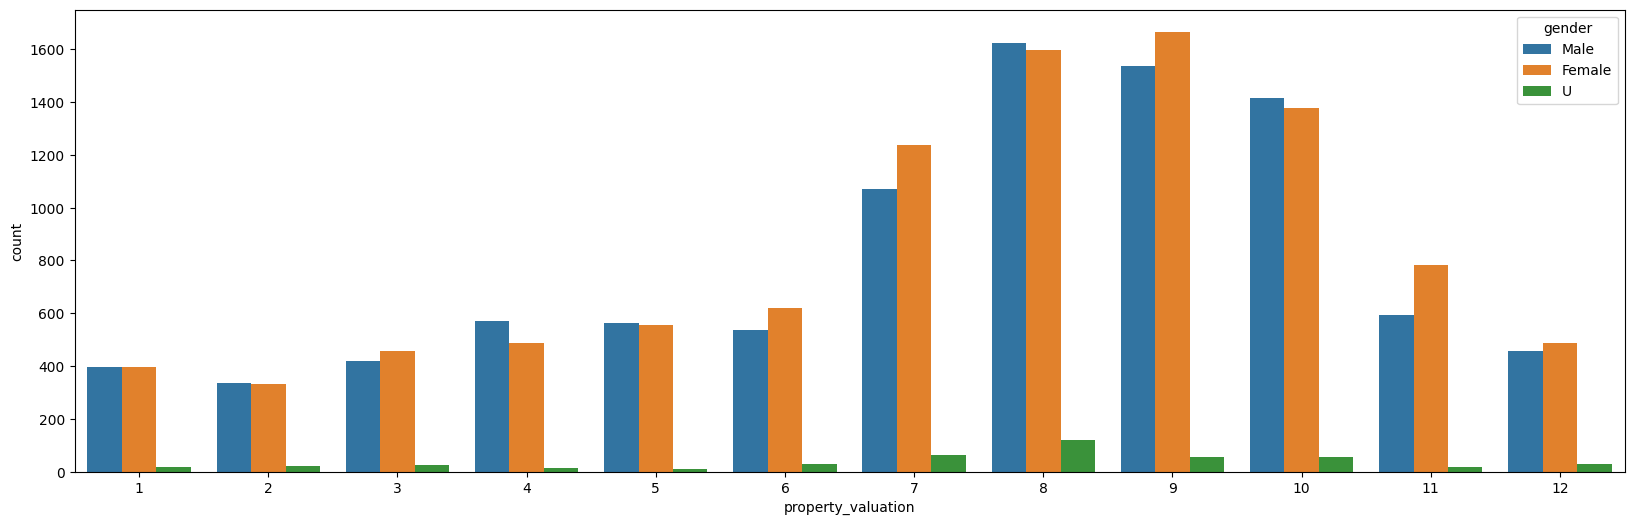

In [84]:
# 5-2. x='property_valuation', hue='gender'
plt.figure(figsize=(20,6))
sns.countplot(x='property_valuation', data=join_df, hue='gender')

<Axes: xlabel='property_valuation', ylabel='count'>

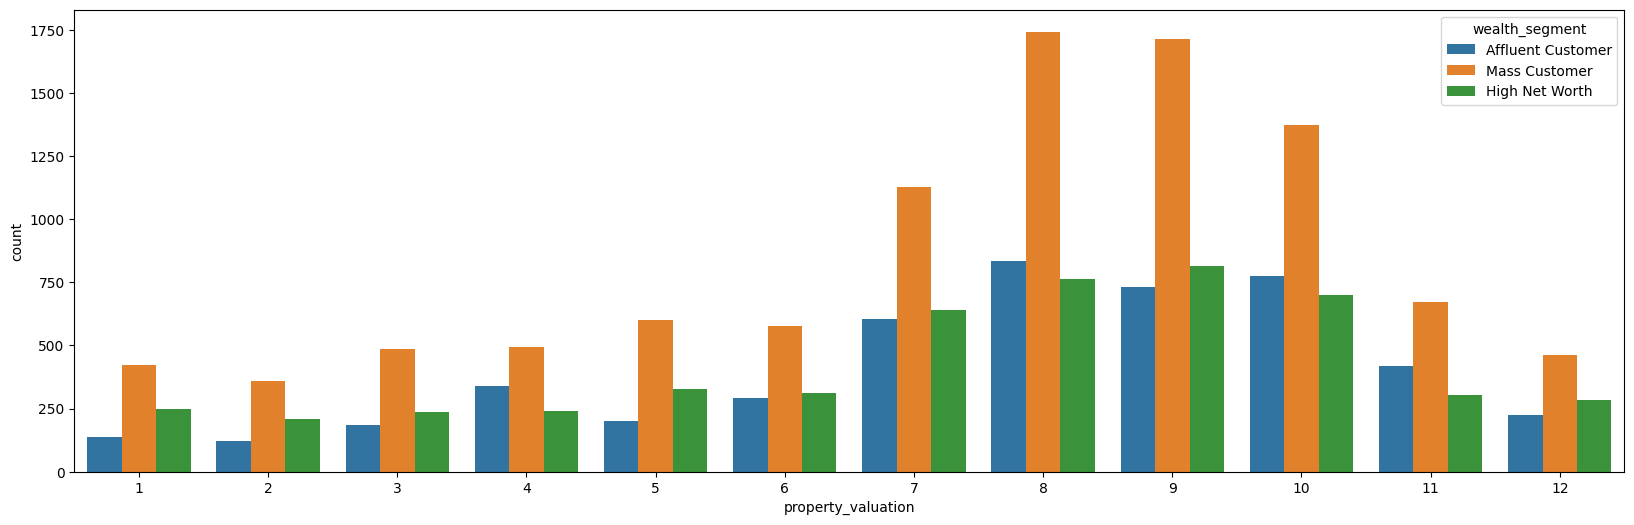

In [85]:
# 5-3. x='property_valuation', hue='wealth_segment'
plt.figure(figsize=(20,6))
sns.countplot(x='property_valuation', data=join_df, hue='wealth_segment')

## 3. 三個維度: x軸categorical variable, y軸numerical variable, hue 顏色區分

*   Strip Plot 散點圖
*   Box Plot 箱型圖(聚合型)
*   Bar Plot 條形圖




### (1) Strip Plot: 太分散了, 意義不大. 大部分都是長橫條圖

In [86]:
# 顏色區分的顆粒度也不明顯

###(2) Box Plot

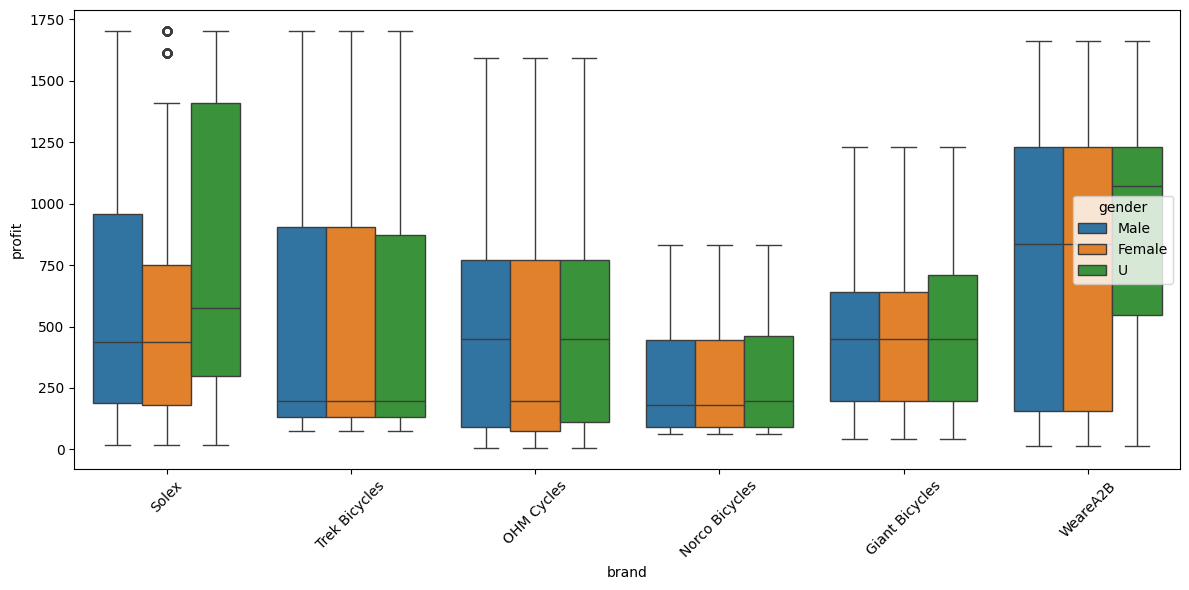

In [87]:
# 1-1. x='brand', y='profit', hue='gender'
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='profit', data=join_df, hue='gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

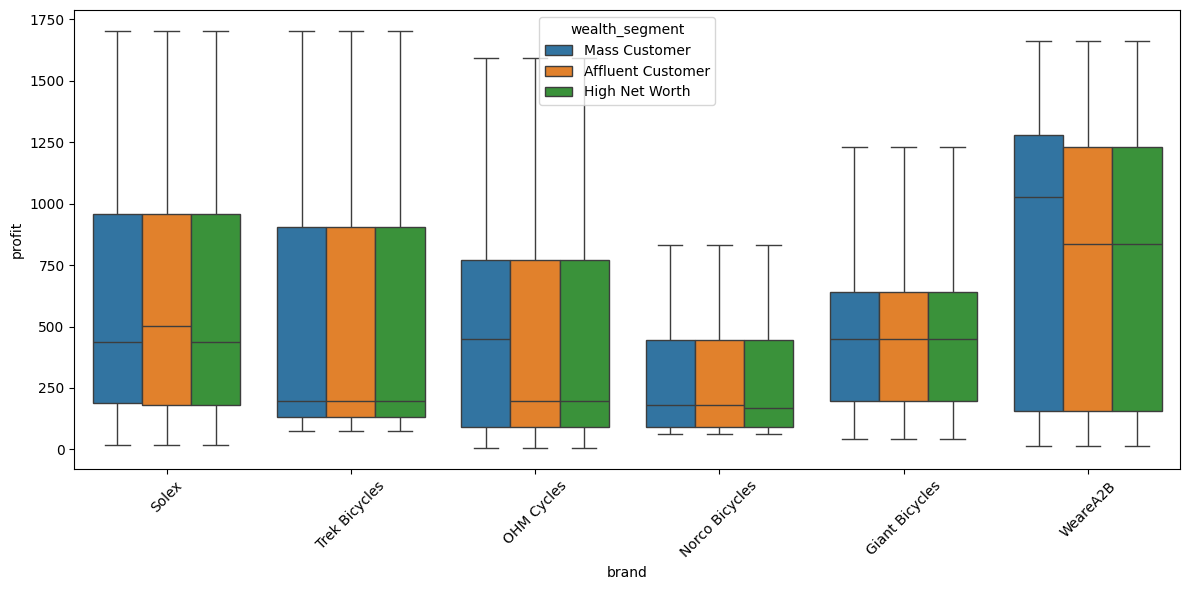

In [88]:
# 1-2. x='brand', y='profit', hue='wealth_segment'
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='profit', data=join_df, hue='wealth_segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

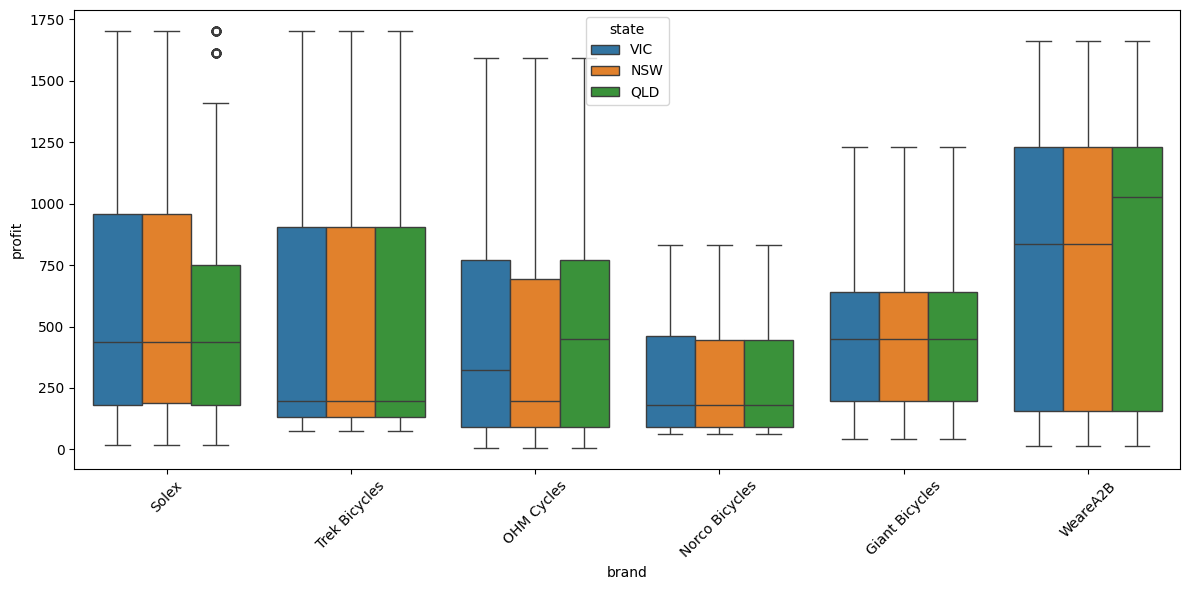

In [89]:
# 1-3. x='brand', y='profit', hue='state'
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='profit', data=join_df, hue='state')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='product_line', ylabel='profit'>

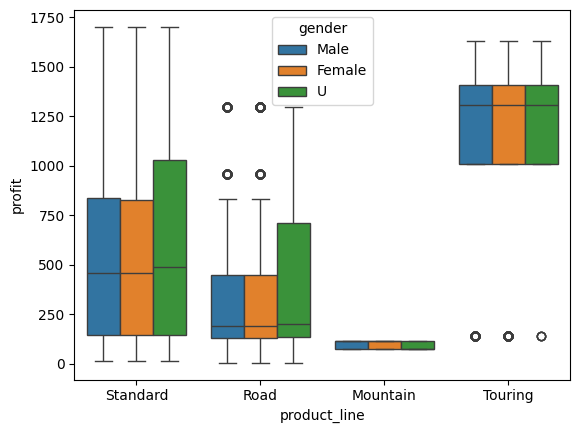

In [90]:
# 2-1. x='product_line', y='profit', hue='gender'
sns.boxplot(x='product_line', y='profit', data=join_df, hue='gender')

<Axes: xlabel='product_line', ylabel='profit'>

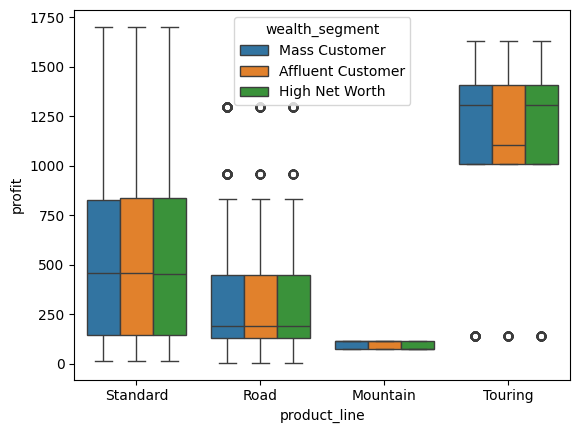

In [91]:
# 2-2. x='product_line', y='profit', hue='wealth_segment'
sns.boxplot(x='product_line', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='product_line', ylabel='profit'>

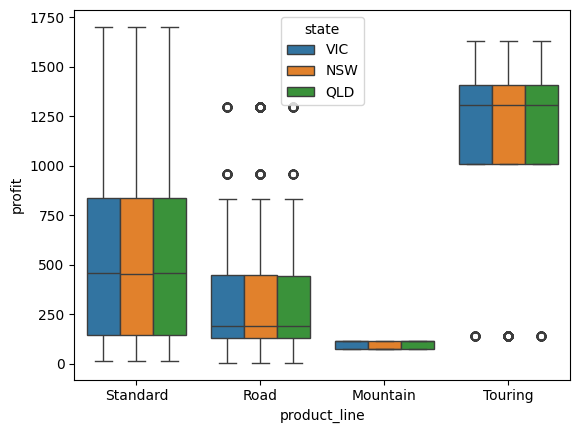

In [92]:
# 2-3. x='product_line', y='profit', hue='state'
sns.boxplot(x='product_line', y='profit', data=join_df, hue='state')

<Axes: xlabel='product_class', ylabel='profit'>

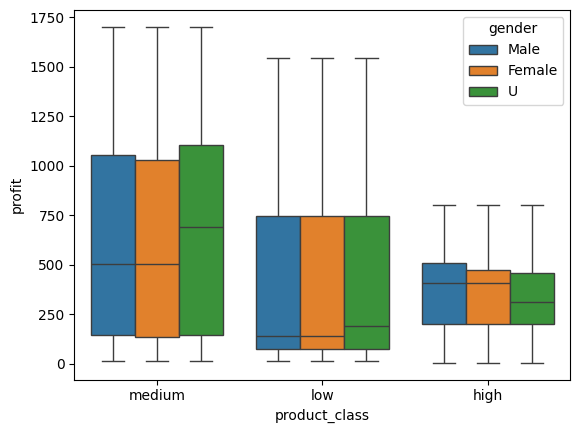

In [93]:
# 3-1. x='product_class', y='profit', hue='gender'
sns.boxplot(x='product_class', y='profit', data=join_df, hue='gender')

<Axes: xlabel='product_class', ylabel='profit'>

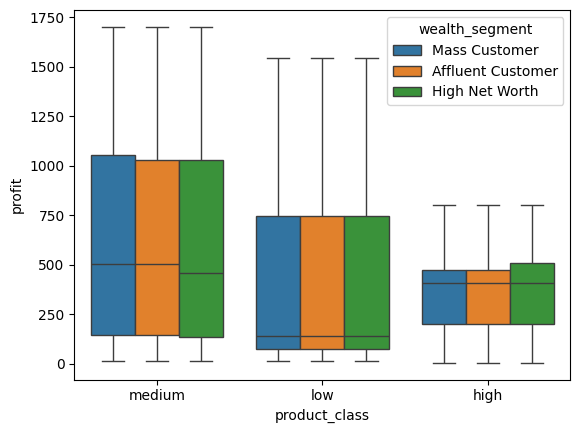

In [94]:
# 3-2. x='product_class', y='profit', hue='wealth_segment'
sns.boxplot(x='product_class', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='product_class', ylabel='profit'>

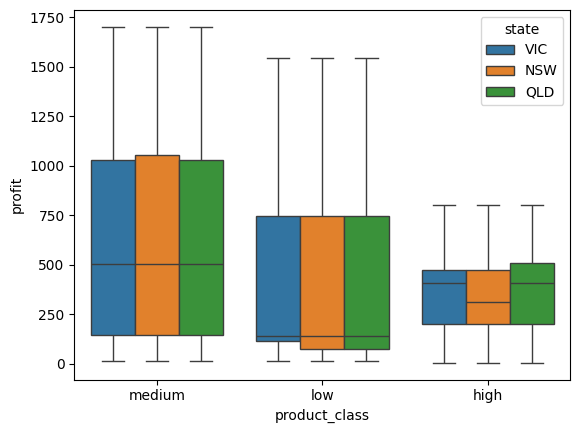

In [95]:
# 3-3. x='product_class', y='profit', hue='state'
sns.boxplot(x='product_class', y='profit', data=join_df, hue='state')

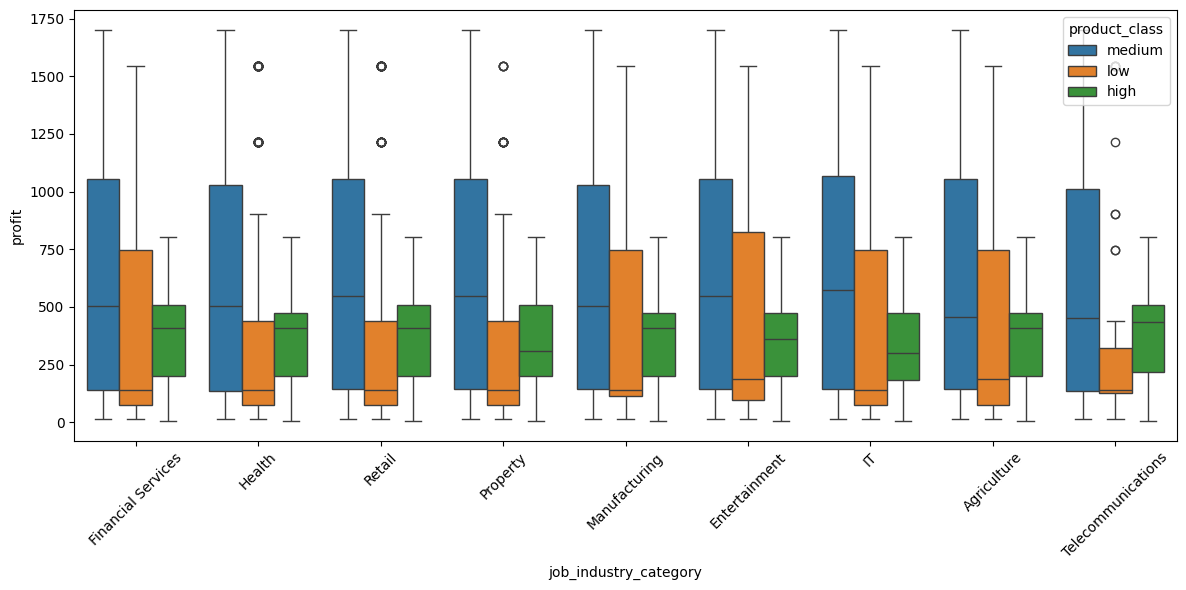

In [96]:
# 4-1. x='job_industry_category', y='profit', hue='product_class'
plt.figure(figsize=(12,6))
sns.boxplot(x='job_industry_category', y='profit', data=join_df, hue='product_class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

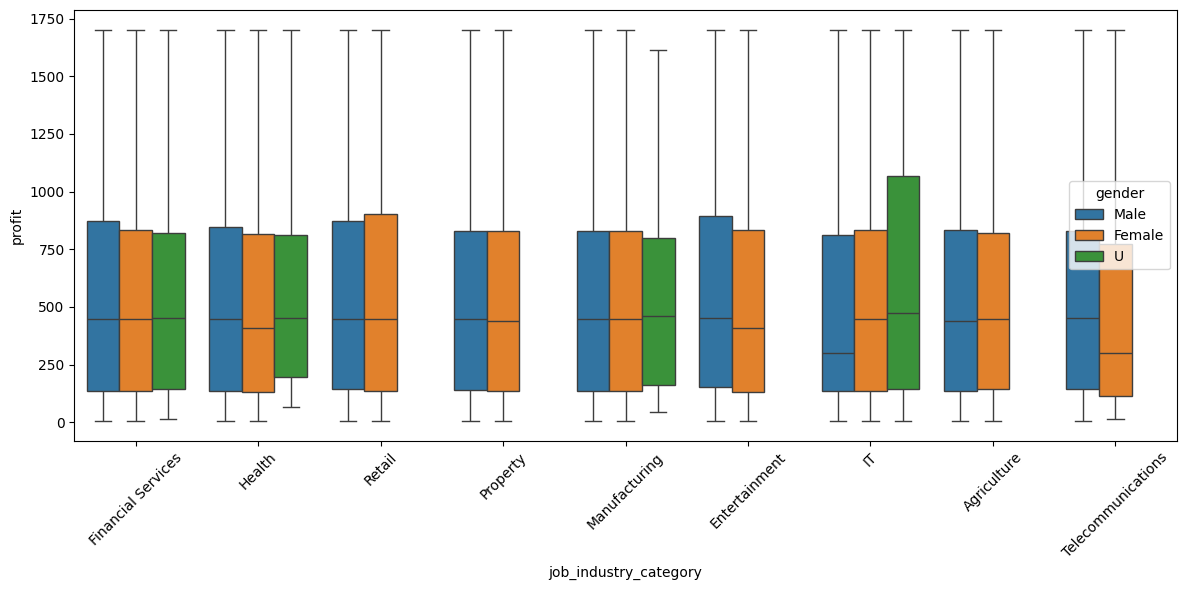

In [97]:
# 4-2. x='job_industry_category', y='profit', hue='gender'
plt.figure(figsize=(12,6))
sns.boxplot(x='job_industry_category', y='profit', data=join_df, hue='gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

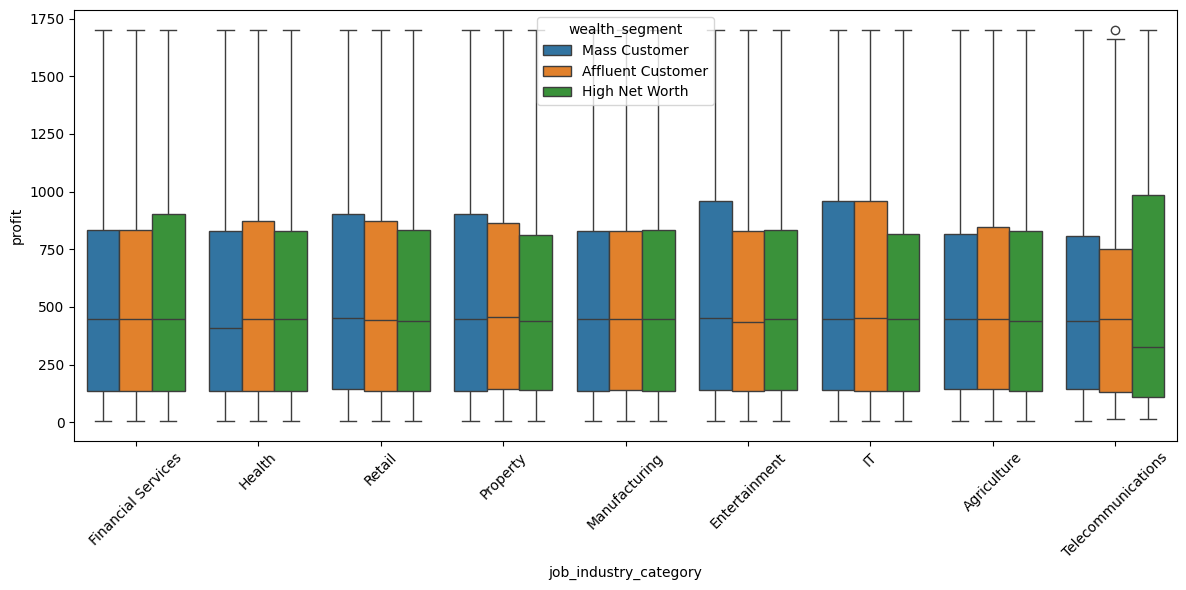

In [98]:
# 4-3. x='job_industry_category', y='profit', hue='wealth_segment'
plt.figure(figsize=(12,6))
sns.boxplot(x='job_industry_category', y='profit', data=join_df, hue='wealth_segment')
plt.xticks(rotation=45)
plt.tight_layout()

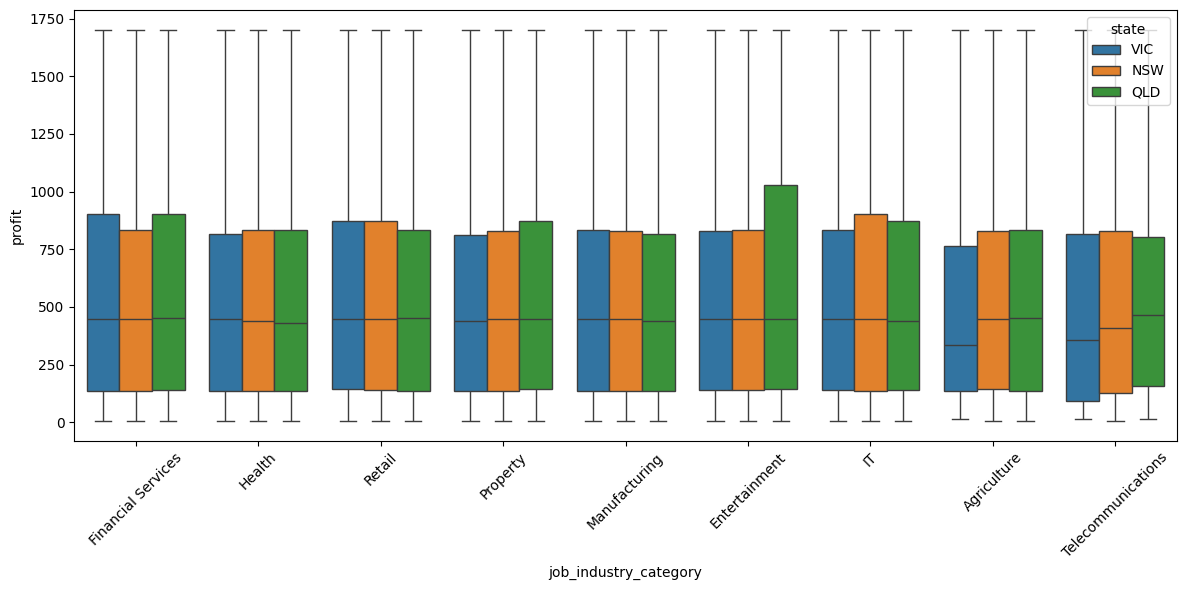

In [99]:
# 4-4. x='job_industry_category', y='profit', hue='state'
plt.figure(figsize=(12,6))
sns.boxplot(x='job_industry_category', y='profit', data=join_df, hue='state')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='age_group', ylabel='profit'>

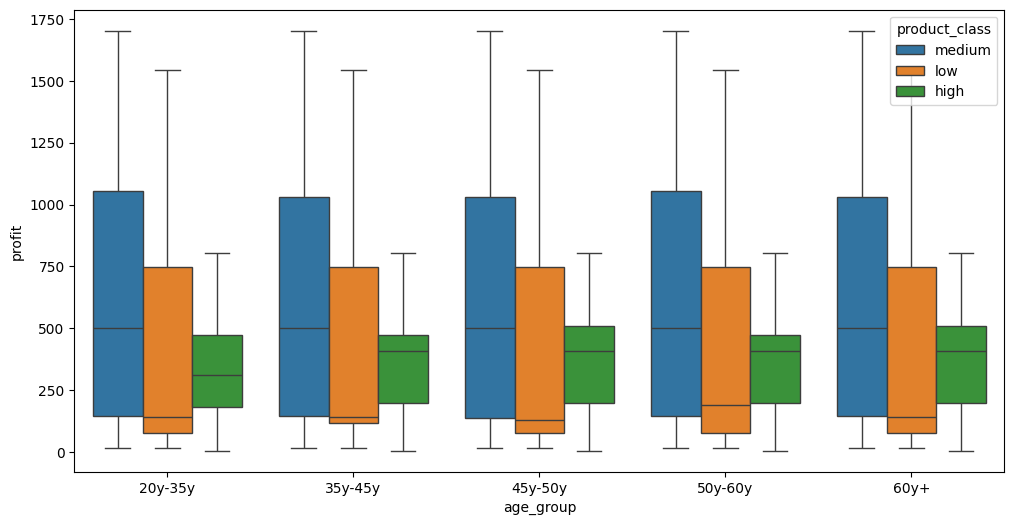

In [100]:
# 5-1. x='age_group', y='profit', hue='product_class'
plt.figure(figsize=(12,6))
sns.boxplot(x='age_group', y='profit', data=join_df, hue='product_class')

<Axes: xlabel='age_group', ylabel='profit'>

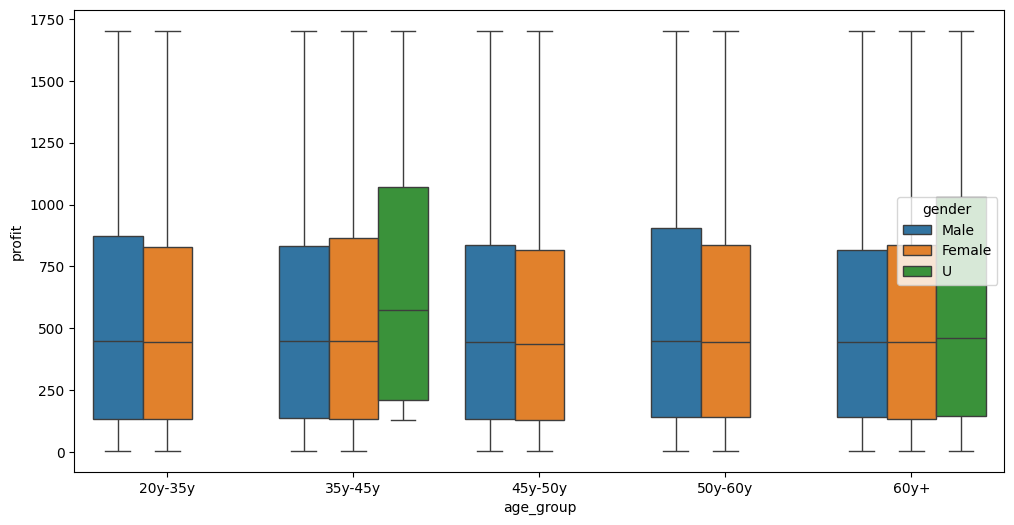

In [101]:
# 5-2. x='age_group', y='profit', hue='gender'
plt.figure(figsize=(12,6))
sns.boxplot(x='age_group', y='profit', data=join_df, hue='gender')

<Axes: xlabel='age_group', ylabel='profit'>

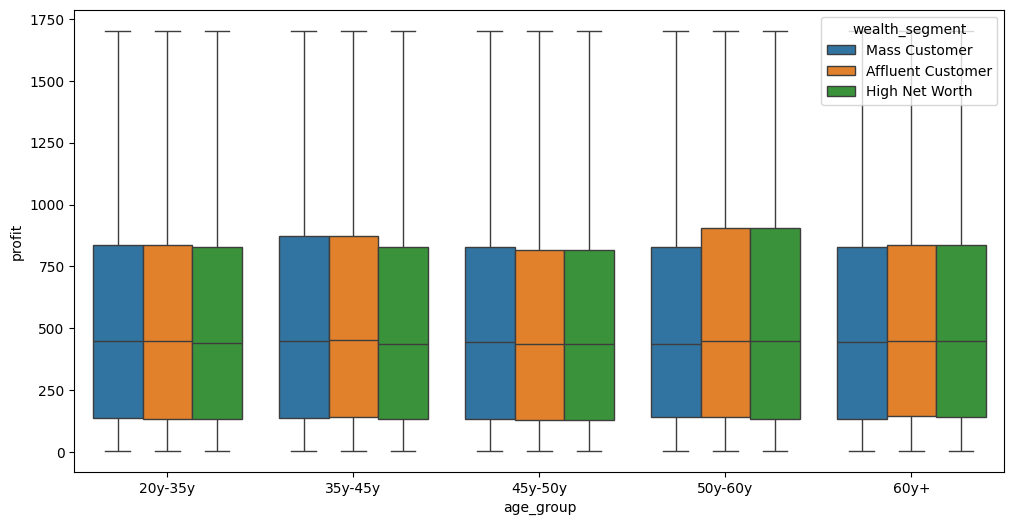

In [102]:
# 5-3. x='age_group', y='profit', hue='wealth_segment'
plt.figure(figsize=(12,6))
sns.boxplot(x='age_group', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='age_group', ylabel='profit'>

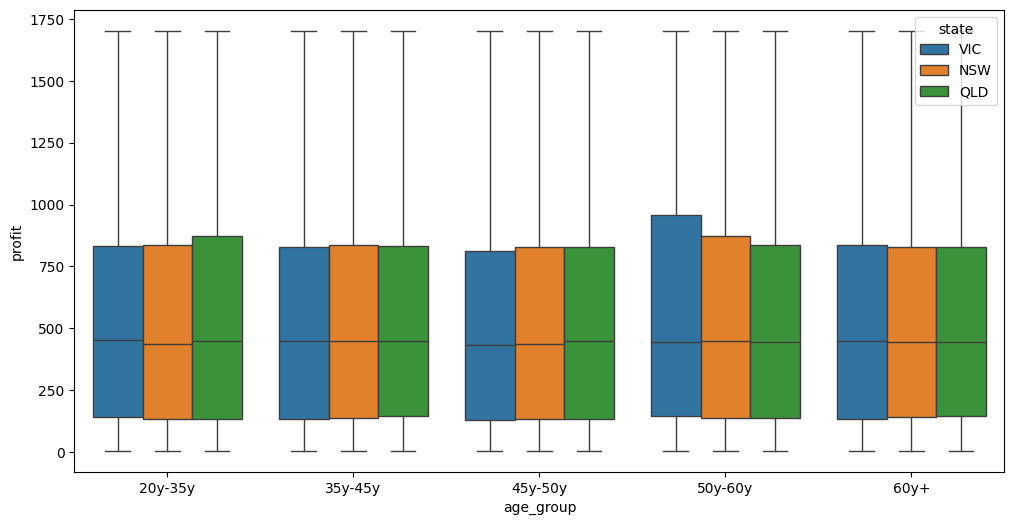

In [103]:
# 5-4. x='age_group', y='profit', hue='state'
plt.figure(figsize=(12,6))
sns.boxplot(x='age_group', y='profit', data=join_df, hue='state')

<Axes: xlabel='property_valuation', ylabel='profit'>

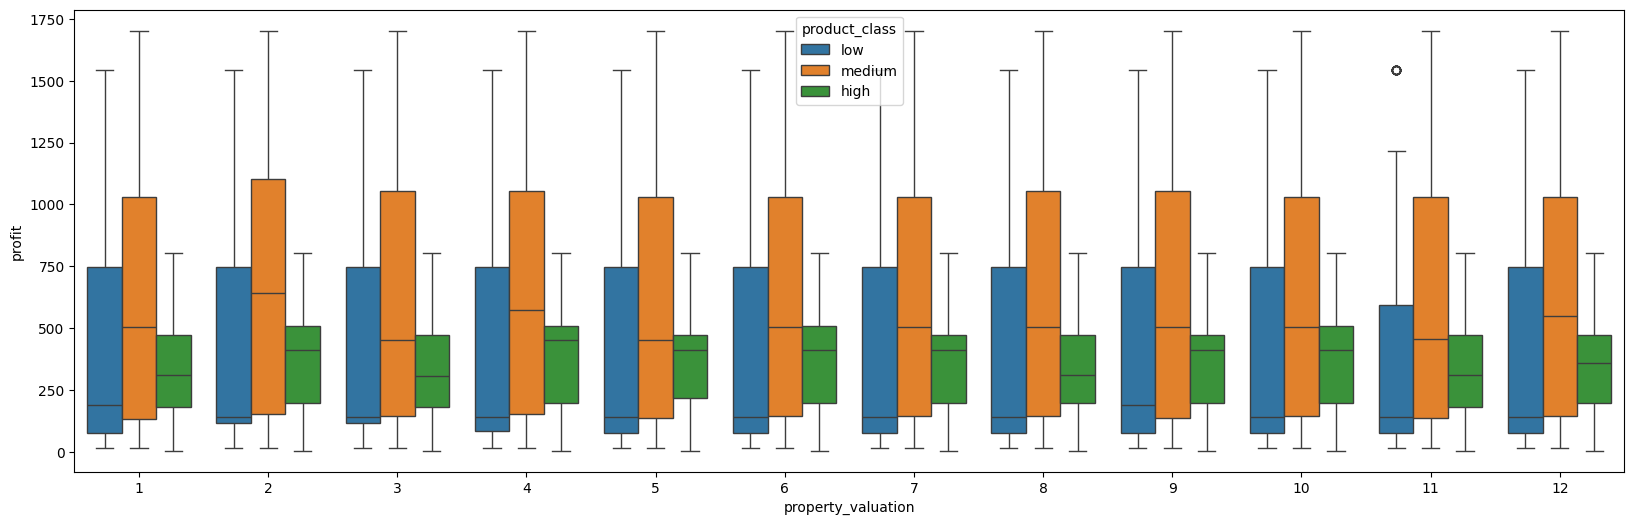

In [104]:
# 6-1. x='property_valuation', y='profit', hue='product_class'
plt.figure(figsize=(20,6))
sns.boxplot(x='property_valuation', y='profit', data=join_df, hue='product_class')

<Axes: xlabel='property_valuation', ylabel='profit'>

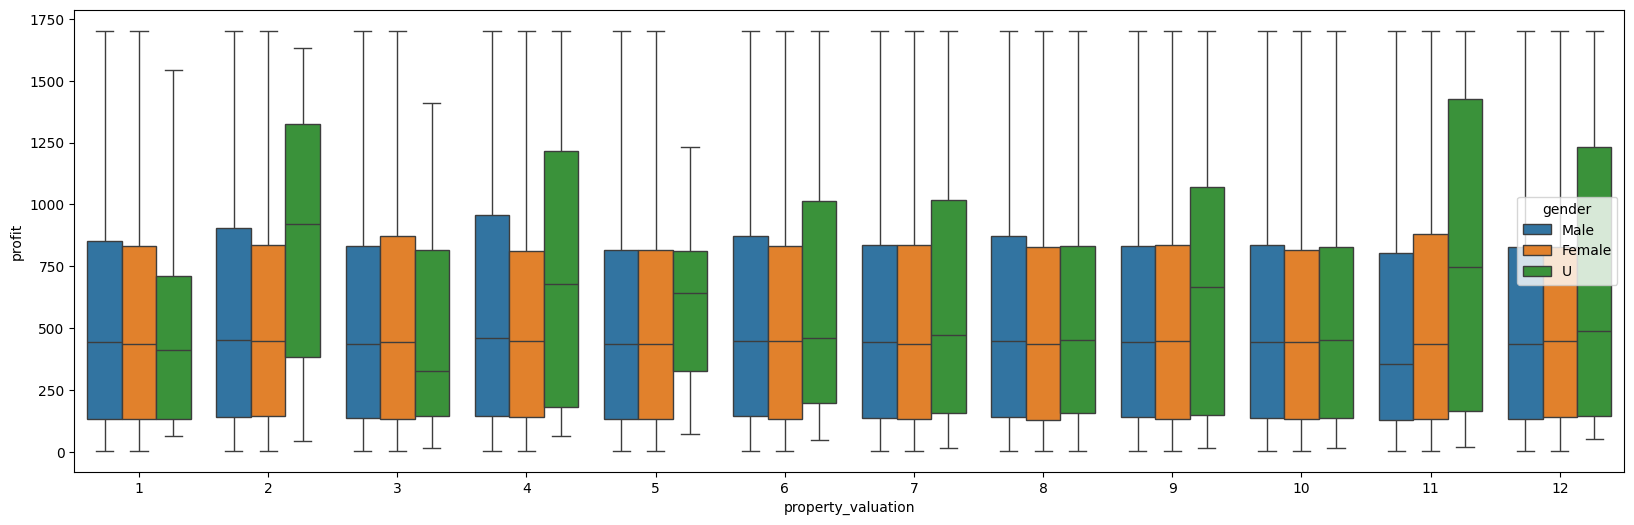

In [105]:
# 6-2. x='property_valuation', y='profit', hue='gender'
plt.figure(figsize=(20,6))
sns.boxplot(x='property_valuation', y='profit', data=join_df, hue='gender')

<Axes: xlabel='property_valuation', ylabel='profit'>

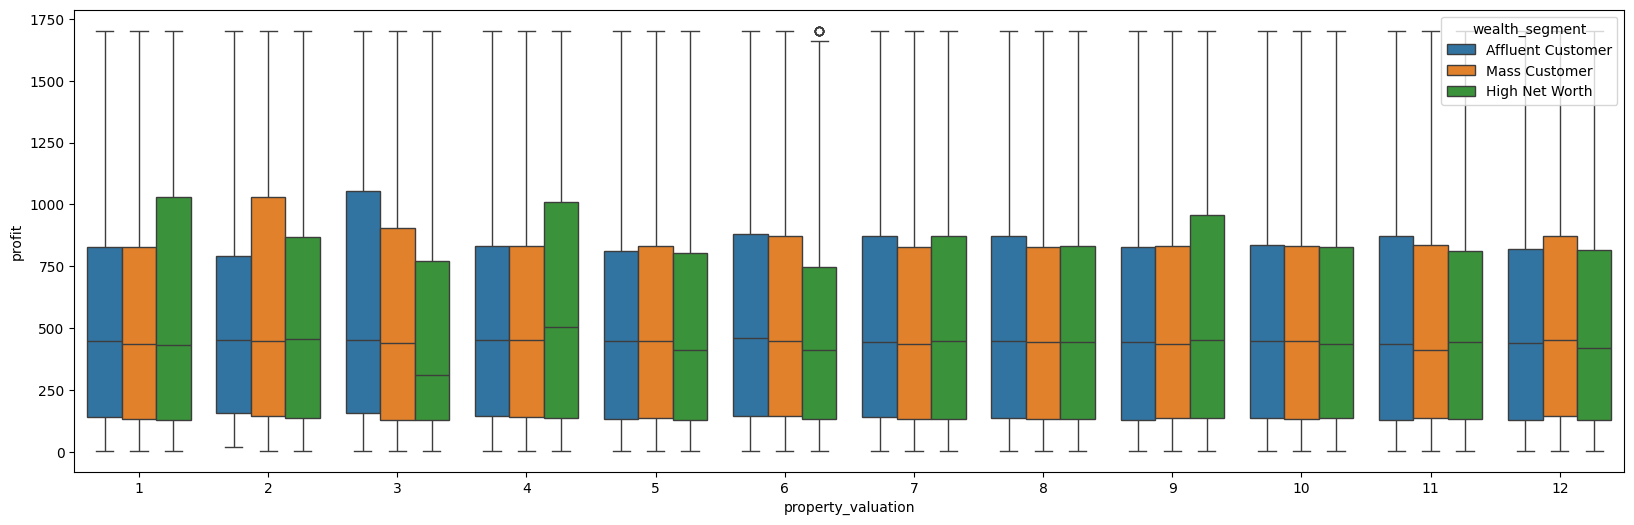

In [106]:
# 6-3. x='property_valuation', y='profit', hue='wealth_segment'
plt.figure(figsize=(20,6))
sns.boxplot(x='property_valuation', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='property_valuation', ylabel='profit'>

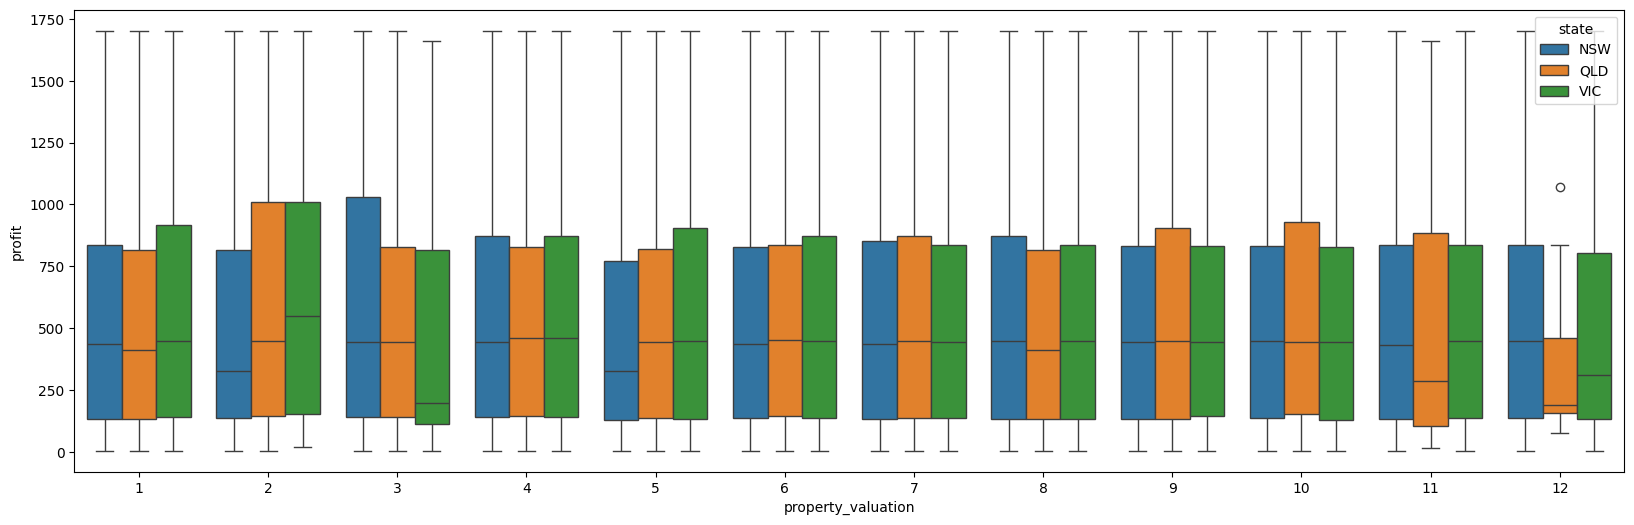

In [107]:
# 6-4. x='property_valuation', y='profit', hue='state'
plt.figure(figsize=(20,6))
sns.boxplot(x='property_valuation', y='profit', data=join_df, hue='state')

### (3) Bar Plot：沒有太多黑線的話, 看高度

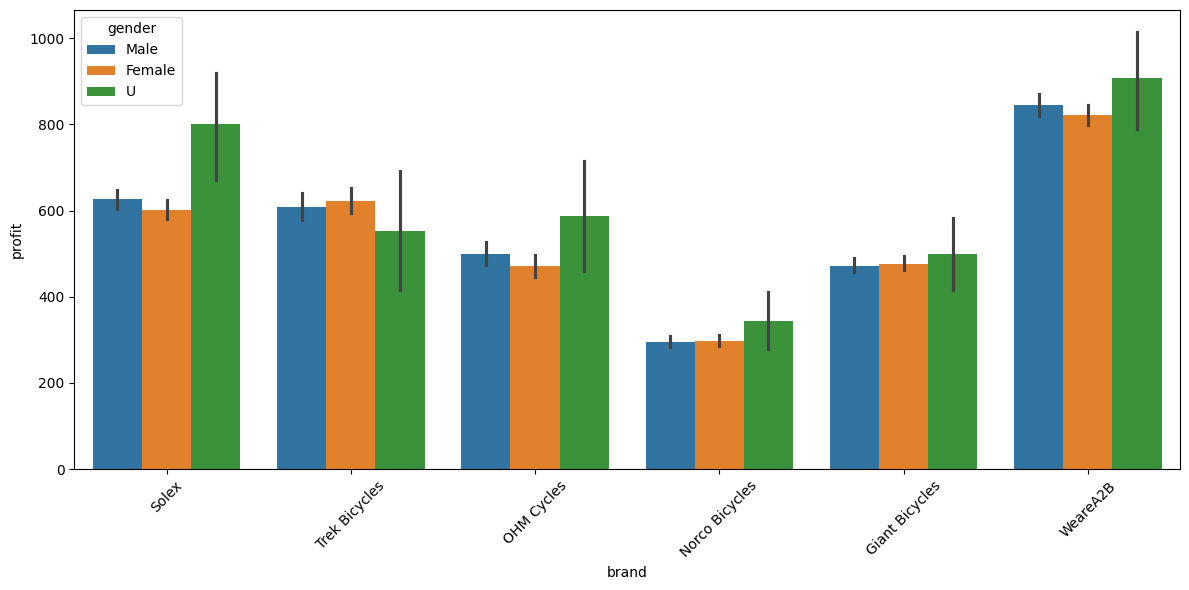

In [108]:
# 1-1. x='brand', y='profit', hue='gender'
plt.figure(figsize=(12,6))
sns.barplot(x='brand', y='profit', data=join_df, hue='gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

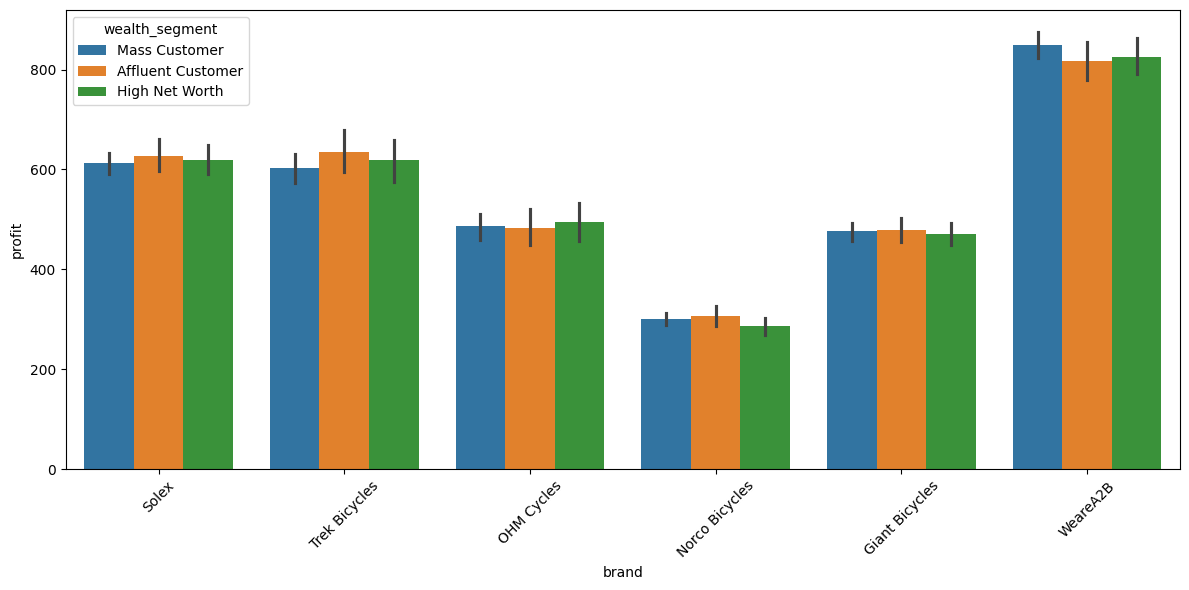

In [109]:
# 1-2. x='brand', y='profit', hue='wealth_segment'
plt.figure(figsize=(12,6))
sns.barplot(x='brand', y='profit', data=join_df, hue='wealth_segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

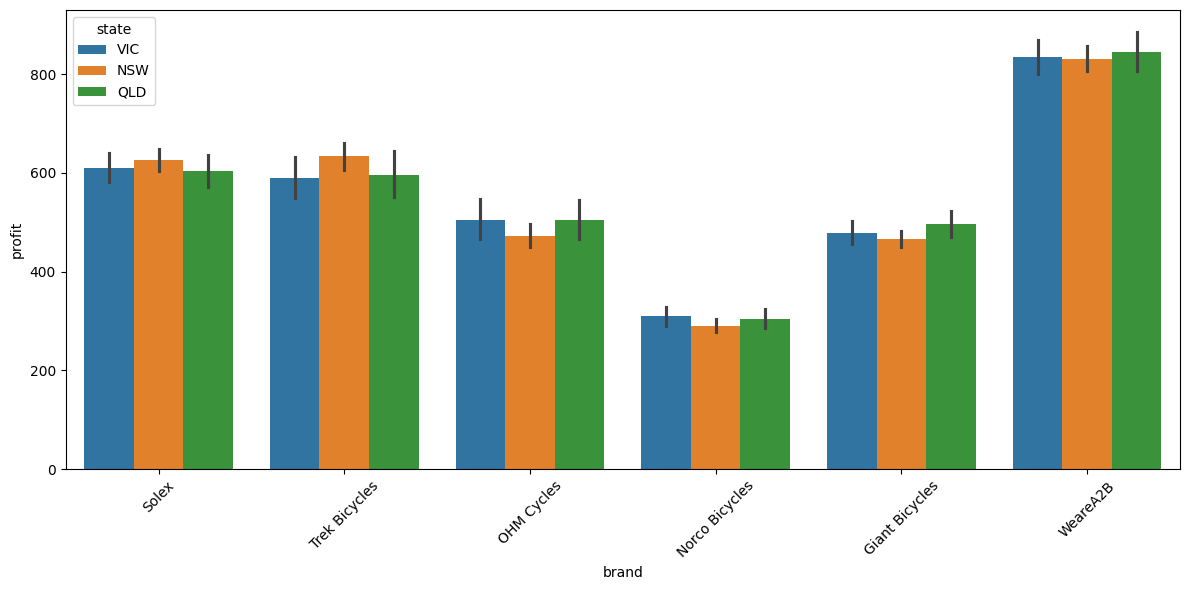

In [110]:
# 1-3. x='brand', y='profit', hue='state'
plt.figure(figsize=(12,6))
sns.barplot(x='brand', y='profit', data=join_df, hue='state')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='product_line', ylabel='profit'>

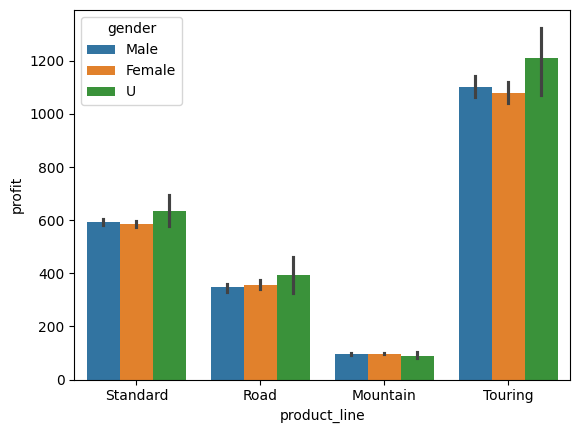

In [111]:
# 2-1. x='product_line', y='profit', hue='gender’
sns.barplot(x='product_line', y='profit', data=join_df, hue='gender')

<Axes: xlabel='product_line', ylabel='profit'>

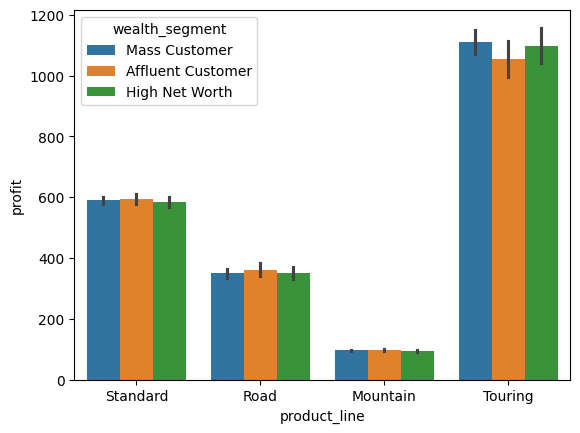

In [112]:
# 2-2. x='product_line', y='profit', hue='wealth_segment’
sns.barplot(x='product_line', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='product_line', ylabel='profit'>

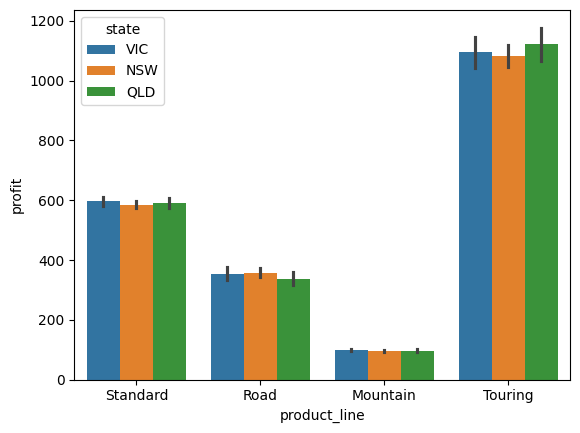

In [113]:
# 2-3. x='product_line', y='profit', hue='state’
sns.barplot(x='product_line', y='profit', data=join_df, hue='state')

<Axes: xlabel='product_class', ylabel='profit'>

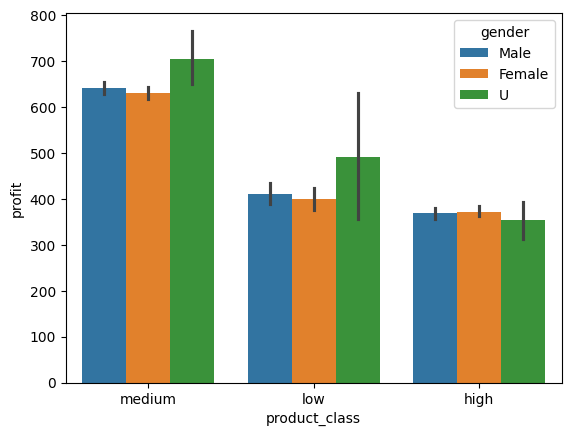

In [114]:
# 3-1. x='product_class', y='profit', hue='gender’
sns.barplot(x='product_class', y='profit', data=join_df, hue='gender')

<Axes: xlabel='product_class', ylabel='profit'>

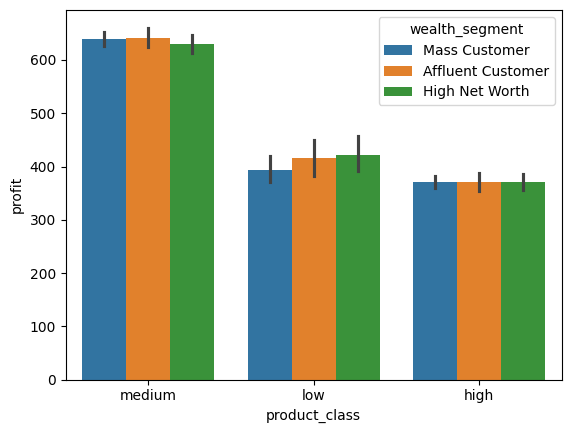

In [115]:
# 3-2. x='product_class', y='profit', hue='wealth_segment’
sns.barplot(x='product_class', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='product_class', ylabel='profit'>

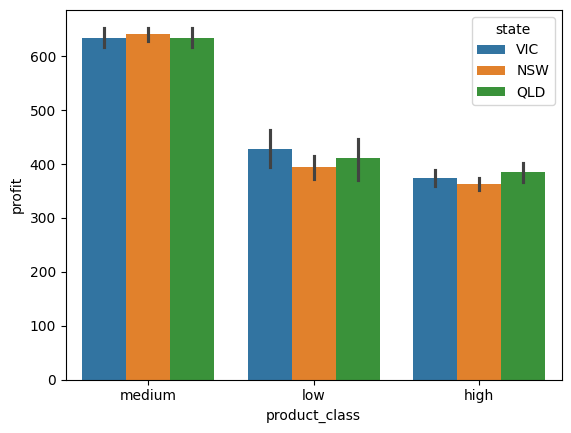

In [116]:
# 3-3. x='product_class', y='profit', hue='state’
sns.barplot(x='product_class', y='profit', data=join_df, hue='state')

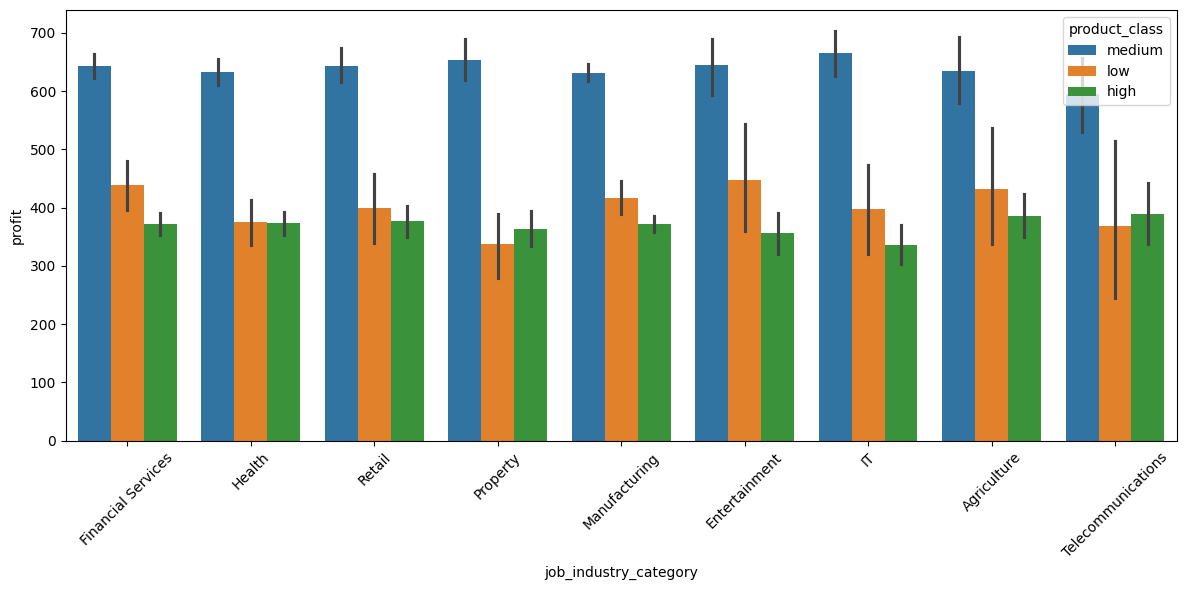

In [117]:
# 4-1. x='job_industry_category', y='profit', hue='product_class’
plt.figure(figsize=(12,6))
sns.barplot(x='job_industry_category', y='profit', data=join_df, hue='product_class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

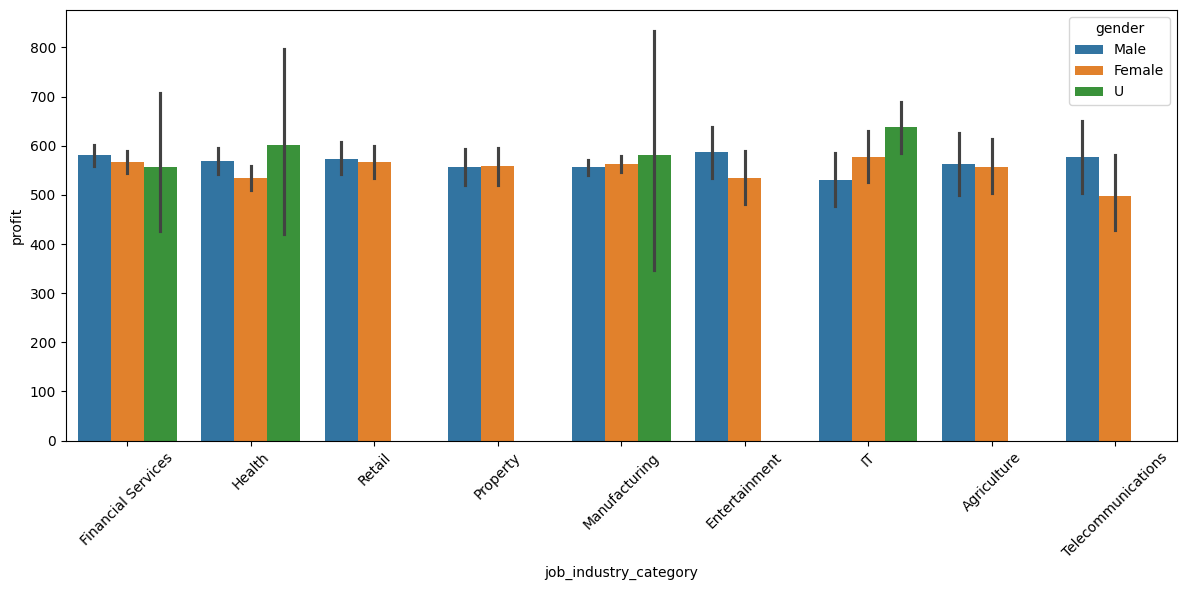

In [118]:
# 4-2. x='job_industry_category', y='profit', hue='gender’
plt.figure(figsize=(12,6))
sns.barplot(x='job_industry_category', y='profit', data=join_df, hue='gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

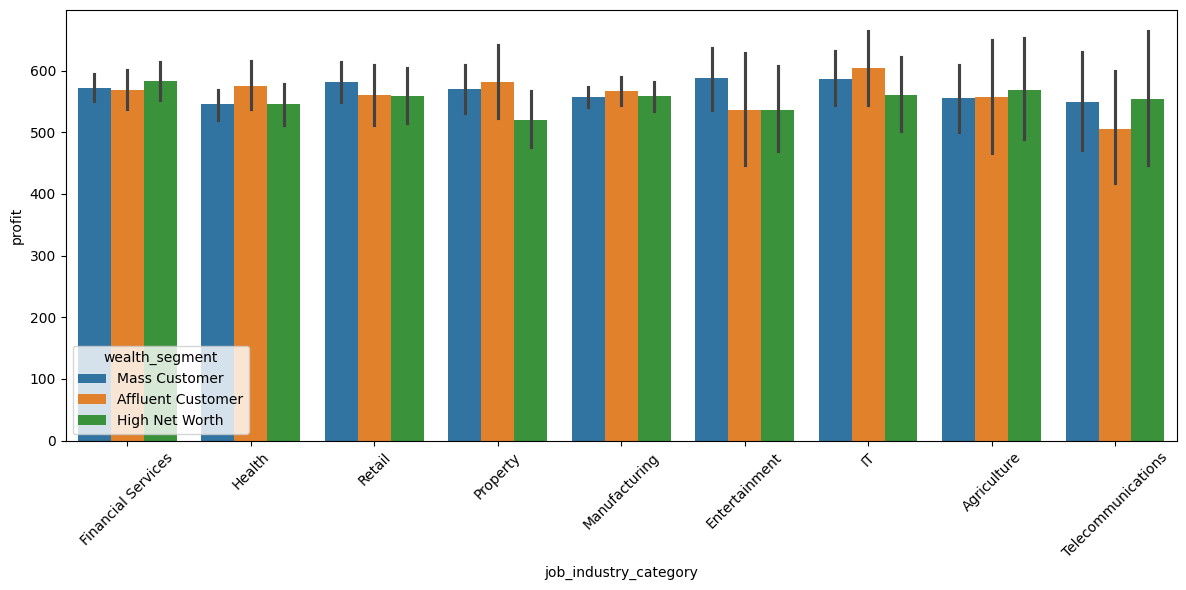

In [119]:
# 4-3. x='job_industry_category', y='profit', hue='wealth_segment’
plt.figure(figsize=(12,6))
sns.barplot(x='job_industry_category', y='profit', data=join_df, hue='wealth_segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

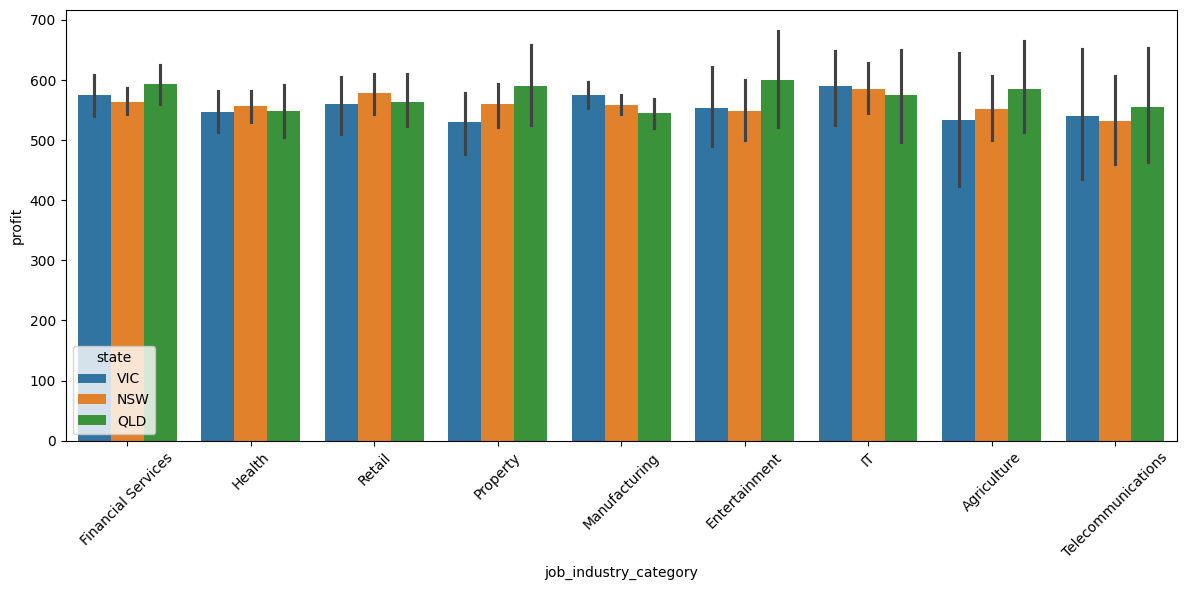

In [120]:
# 4-4. x='job_industry_category', y='profit', hue='state’
plt.figure(figsize=(12,6))
sns.barplot(x='job_industry_category', y='profit', data=join_df, hue='state')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='age_group', ylabel='profit'>

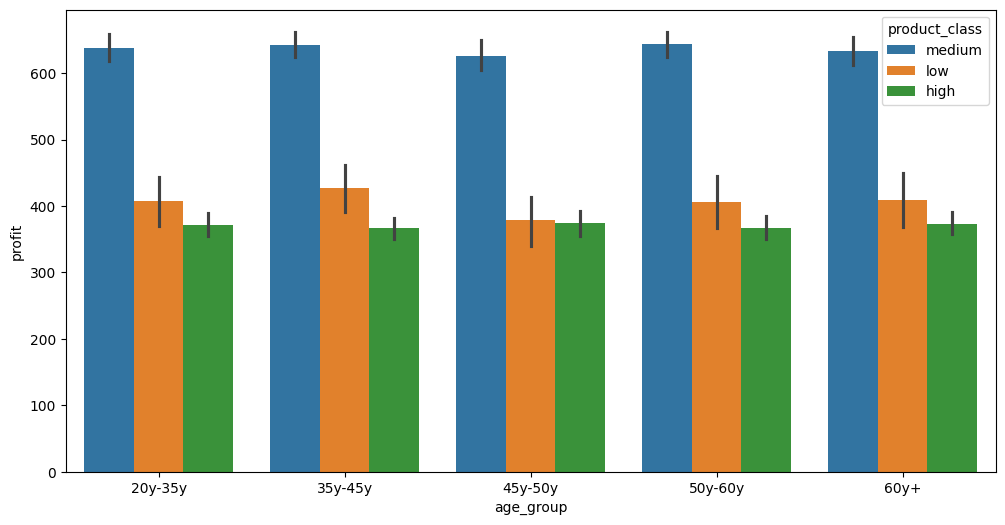

In [121]:
# 5-1. x='age_group', y='profit', hue='product_class’
plt.figure(figsize=(12,6))
sns.barplot(x='age_group', y='profit', data=join_df, hue='product_class')

<Axes: xlabel='age_group', ylabel='profit'>

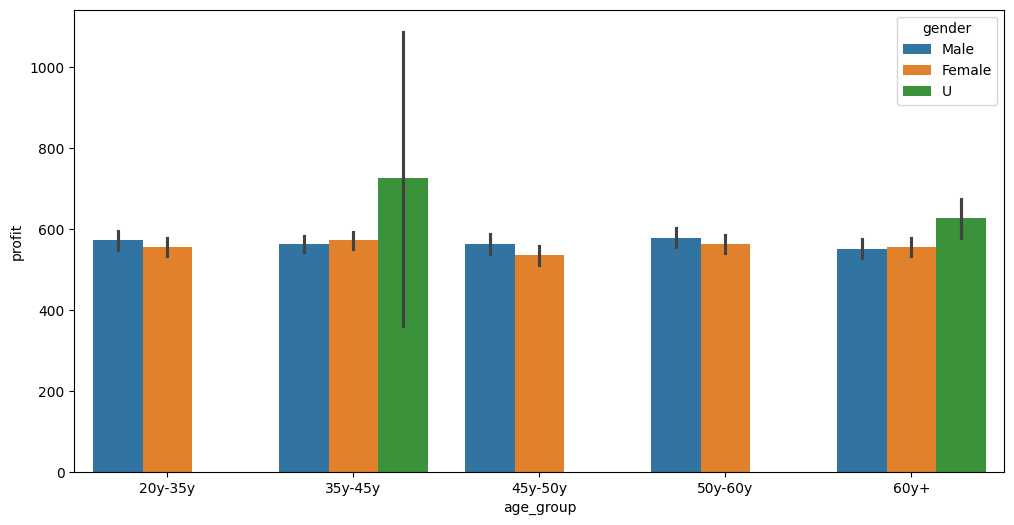

In [122]:
# 5-2. x='age_group', y='profit', hue='gender’
plt.figure(figsize=(12,6))
sns.barplot(x='age_group', y='profit', data=join_df, hue='gender')

<Axes: xlabel='age_group', ylabel='profit'>

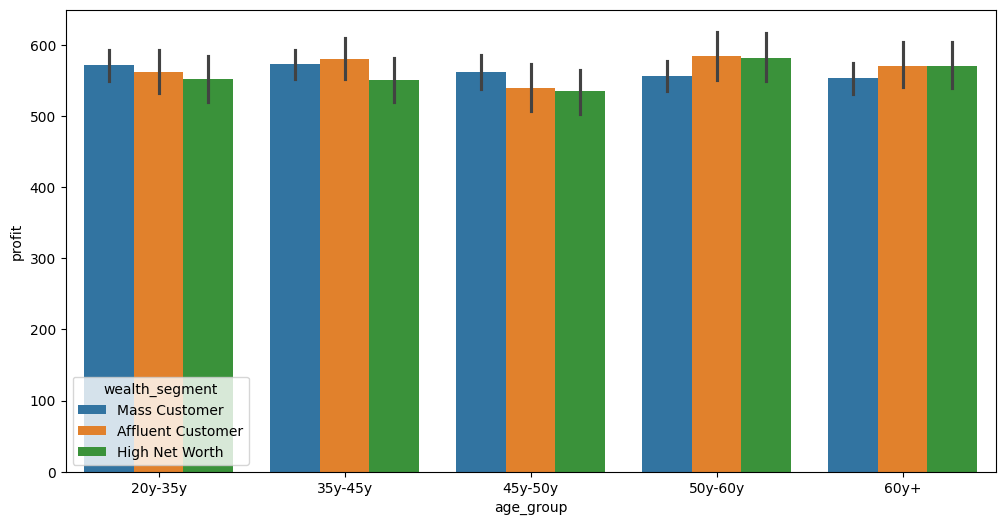

In [123]:
# 5-3. x='age_group', y='profit', hue='wealth_segment’
plt.figure(figsize=(12,6))
sns.barplot(x='age_group', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='age_group', ylabel='profit'>

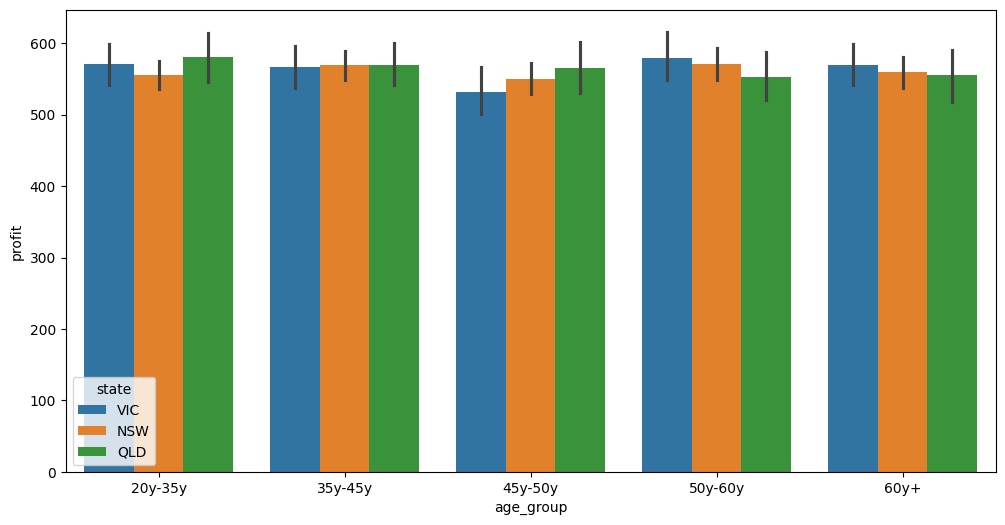

In [124]:
# 5-4. x='age_group', y='profit', hue='state’
plt.figure(figsize=(12,6))
sns.barplot(x='age_group', y='profit', data=join_df, hue='state')

<Axes: xlabel='property_valuation', ylabel='profit'>

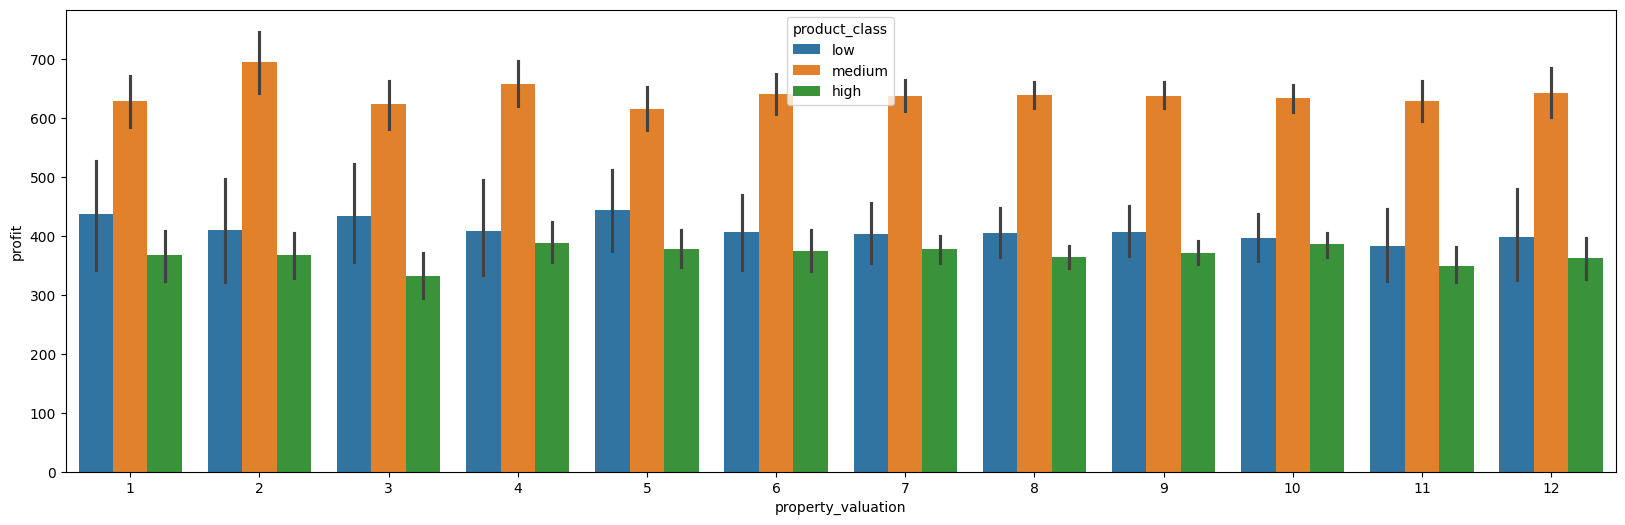

In [125]:
# 6-1. x='property_valuation', y='profit', hue='product_class’
plt.figure(figsize=(20,6))
sns.barplot(x='property_valuation', y='profit', data=join_df, hue='product_class')

<Axes: xlabel='property_valuation', ylabel='profit'>

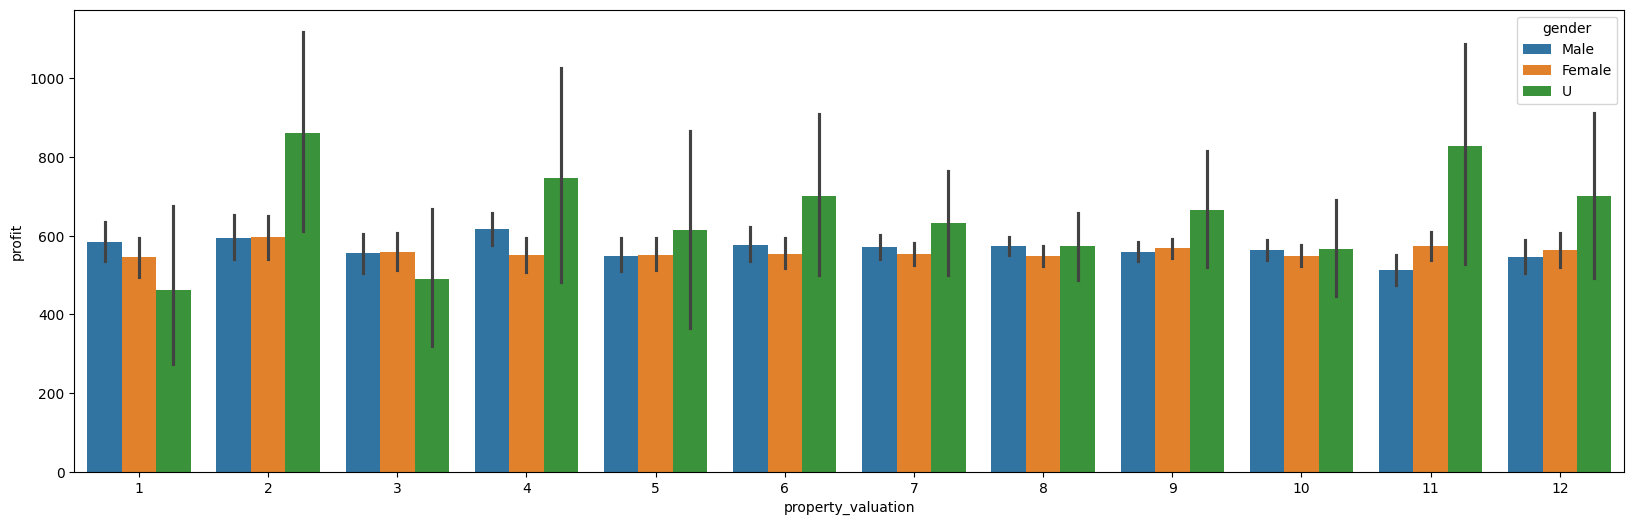

In [126]:
# 6-2. x='property_valuation', y='profit', hue='gender’
plt.figure(figsize=(20,6))
sns.barplot(x='property_valuation', y='profit', data=join_df, hue='gender')

<Axes: xlabel='property_valuation', ylabel='profit'>

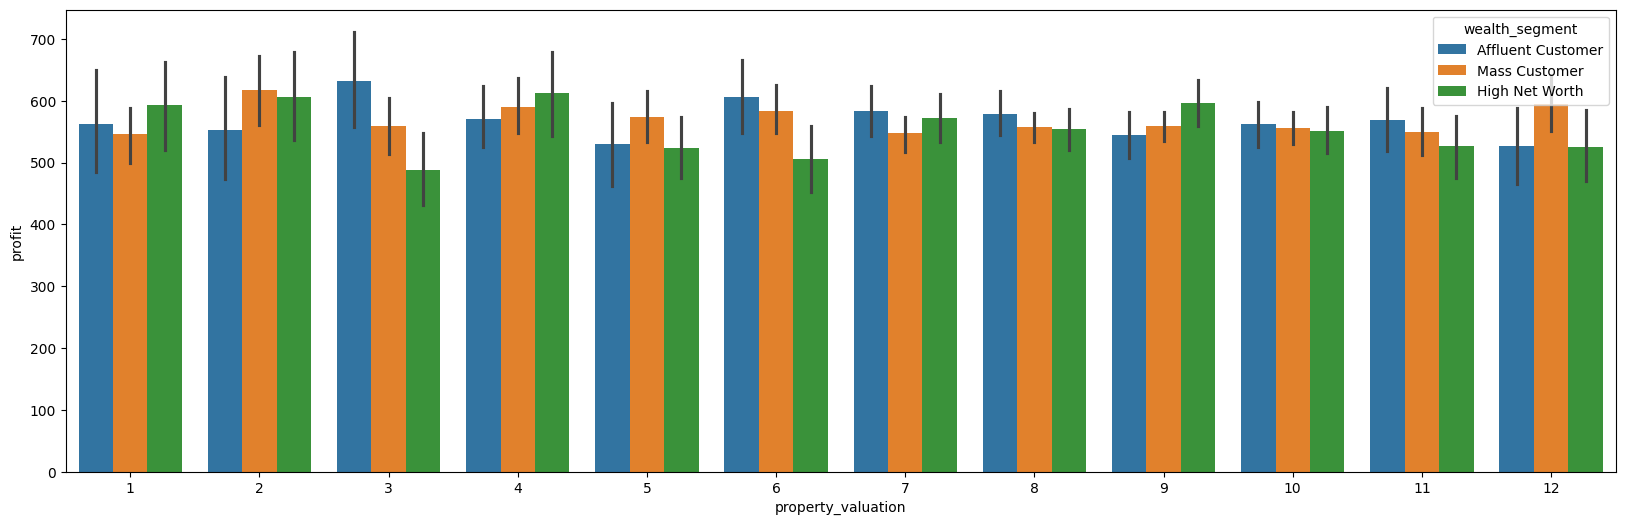

In [127]:
# 6-3. x='property_valuation', y='profit', hue='wealth_segment’
plt.figure(figsize=(20,6))
sns.barplot(x='property_valuation', y='profit', data=join_df, hue='wealth_segment')

<Axes: xlabel='property_valuation', ylabel='profit'>

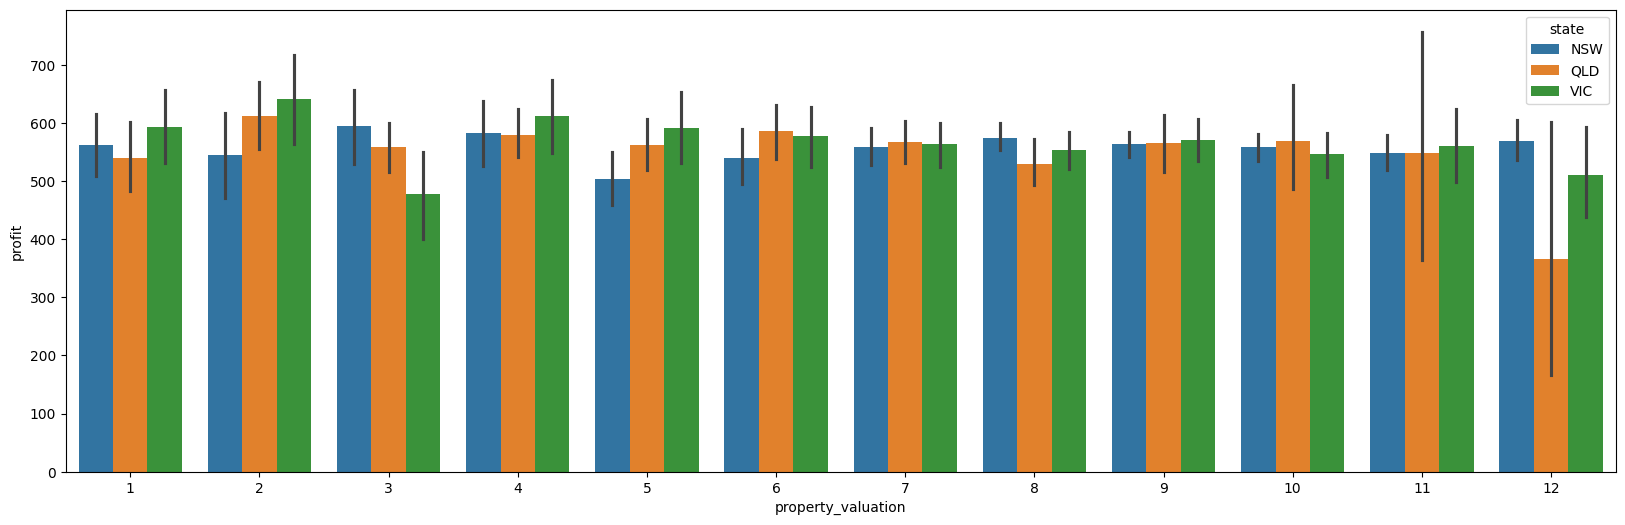

In [128]:
# 6-4. x='property_valuation', y='profit', hue='state’
plt.figure(figsize=(20,6))
sns.barplot(x='property_valuation', y='profit', data=join_df, hue='state')

## 4. 聚合分佈 (三個維度)：x軸 Categorical variable, y軸 Numerical variable


*   Box Plot
*   Violin Plot
* 如果做了Box Plot就不用做Violin Plot



### Violin Plot

In [129]:
# 前面畫過Box Plot了

## 5. Numerical 和 Numerical variable的關係

### (1) Joint Plot

In [130]:
# 1-1. x='profit', y='tenure'
# 1-2. x-'profit', y='past_3_years_bike_related_purchases'
# 2-1. x='list_price', y='tenure'
# 3-1. x='standard_cost', y='tenure'
# 這兩個做出來的圖都太分散, 沒有意義

### (2) Point Plot (x軸以兩個為一組比對最適用這種畫法)

*   x軸和hue都放Categorical Variable
*   因為point plot是看兩組人對於同一個變量sensitivity的程度, 如果是Num會有比較多高低的曲線去代表分佈.
*   但是point plot是靠著傾斜程度去觀察他的sensitivity, 所以x軸和hue才放categorical.只有y軸放numerical




In [131]:
print(join_df.columns)

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age_group', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')


<Axes: xlabel='online_order', ylabel='tenure'>

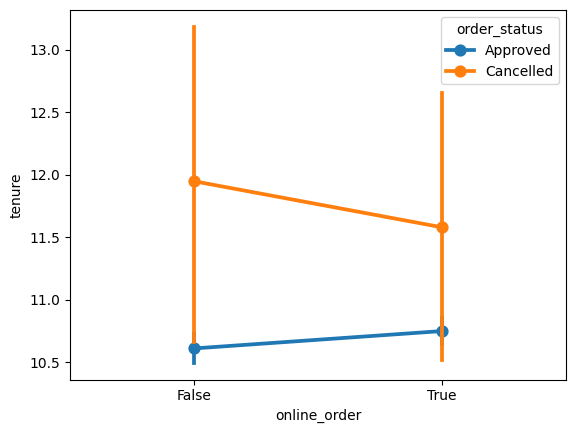

In [132]:
# 1-1. x='online_order', y='tenure', hue='order_status'
sns.pointplot(x='online_order', y='tenure', data=join_df, hue='order_status')

<Axes: xlabel='online_order', ylabel='past_3_years_bike_related_purchases'>

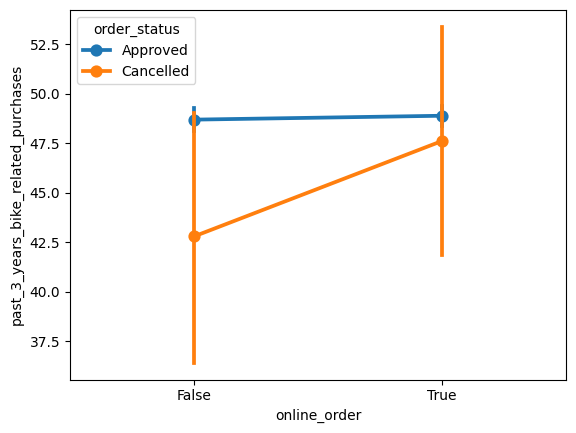

In [133]:
# 1-2. x='online_order', y='past_3_years_bike_related_purchases', hue='order_status'
sns.pointplot(x='online_order', y='past_3_years_bike_related_purchases', data=join_df, hue='order_status')

<Axes: xlabel='online_order', ylabel='tenure'>

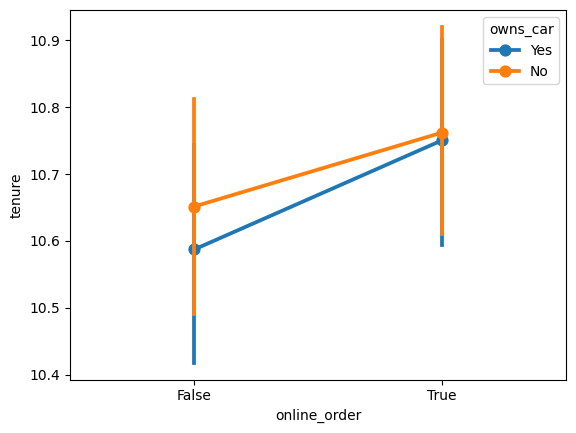

In [134]:
#1-3. x='online_order', y='tenure', hue='owns_car'
sns.pointplot(x='online_order', y='tenure', data=join_df, hue='owns_car')

<Axes: xlabel='online_order', ylabel='past_3_years_bike_related_purchases'>

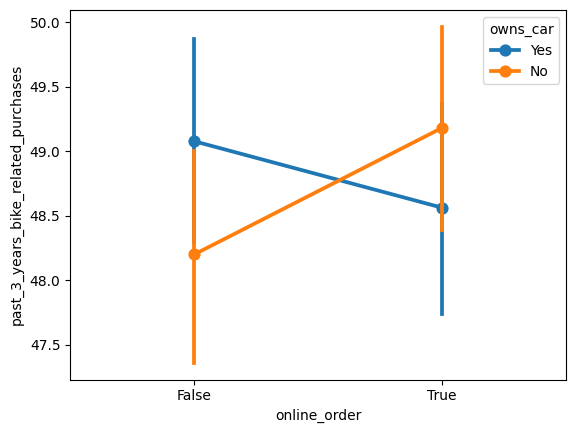

In [135]:
# 1-4. x='online_order', y='past_3_years_bike_related_purchases', hue='owns_car'
sns.pointplot(x='online_order', y='past_3_years_bike_related_purchases', data=join_df, hue='owns_car')

In [136]:
# 2-1. x='order_status',  y='tenure', hue='owns_car'
# 2-2. x='order_status',  y='past_3_years_bike_related_purchases', hue='online_order'
# 沒有明顯差異

In [137]:
# Q: 像3-1這種結果是不是比較能看得出差異？

<Axes: xlabel='owns_car', ylabel='profit'>

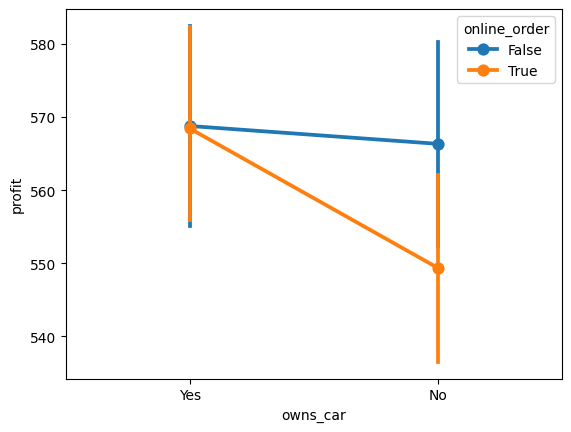

In [138]:
# 3-1. x='owns_car', y ='profit', hue='online_order'
sns.pointplot(x='owns_car', y='profit', data=join_df, hue='online_order')

<Axes: xlabel='owns_car', ylabel='profit'>

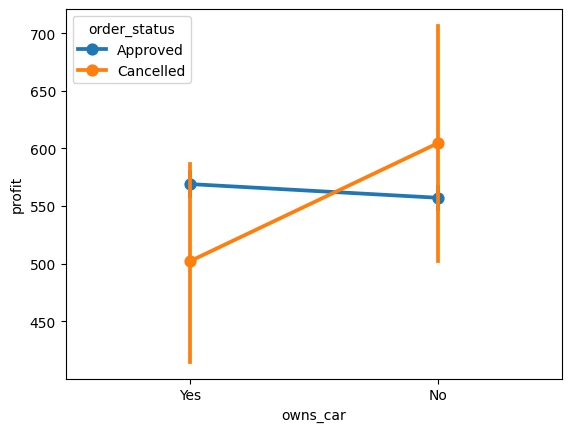

In [139]:
# 3-2. x='owns_car', y ='profit', hue='order_status'
sns.pointplot(x='owns_car', y='profit', data=join_df, hue='order_status')

<Axes: xlabel='owns_car', ylabel='standard_cost'>

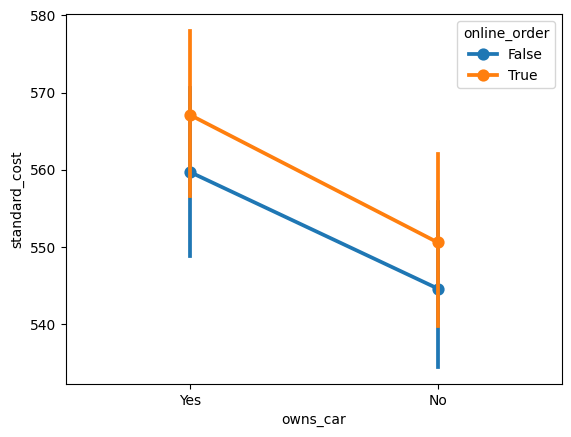

In [140]:
# 3-3. x='owns_car', y ='standard_cost', hue='online_order'
sns.pointplot(x='owns_car', y='standard_cost', data=join_df, hue='online_order')

<Axes: xlabel='owns_car', ylabel='list_price'>

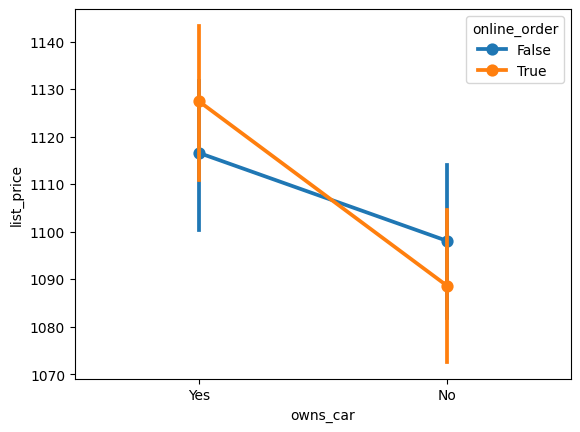

In [141]:
# 3-3. x='owns_car', y ='list_price', hue='online_order'
sns.pointplot(x='owns_car', y='list_price', data=join_df, hue='online_order')

<Axes: xlabel='owns_car', ylabel='tenure'>

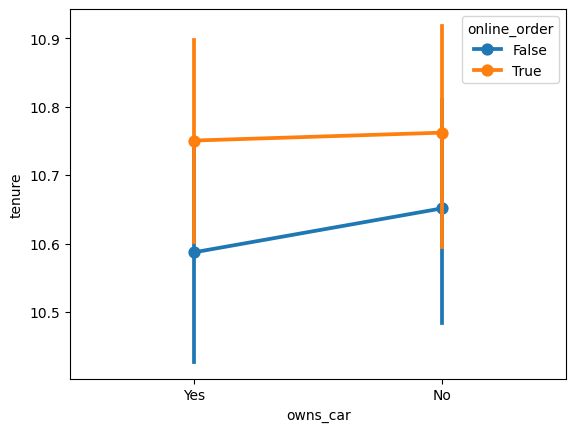

In [142]:
# 3-4. x='owns_car', y ='tenure', hue='online_order'
sns.pointplot(x='owns_car', y='tenure', data=join_df, hue='online_order')

<Axes: xlabel='owns_car', ylabel='past_3_years_bike_related_purchases'>

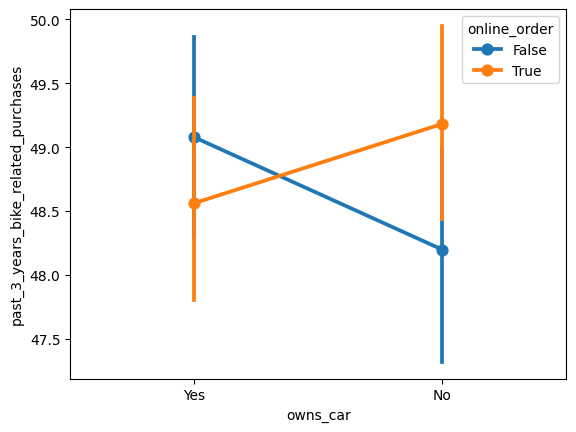

In [143]:
# 3-5. x='owns_car', y ='past_3_years_bike_related_purchases', hue='online_order'
sns.pointplot(x='owns_car', y='past_3_years_bike_related_purchases', data=join_df, hue='online_order')

## 6. 多個維度: 多個 Num v 和 Cate v之間的關係 (先畫Cat Plot就好)

### 如果 Relational Plot太分散了,就用Cat Plot 聚合圖形表示

*   kind = "boxen"
*   kind = "bar"



### Cat Plot：kind能改成聚合型Box Plot的圖

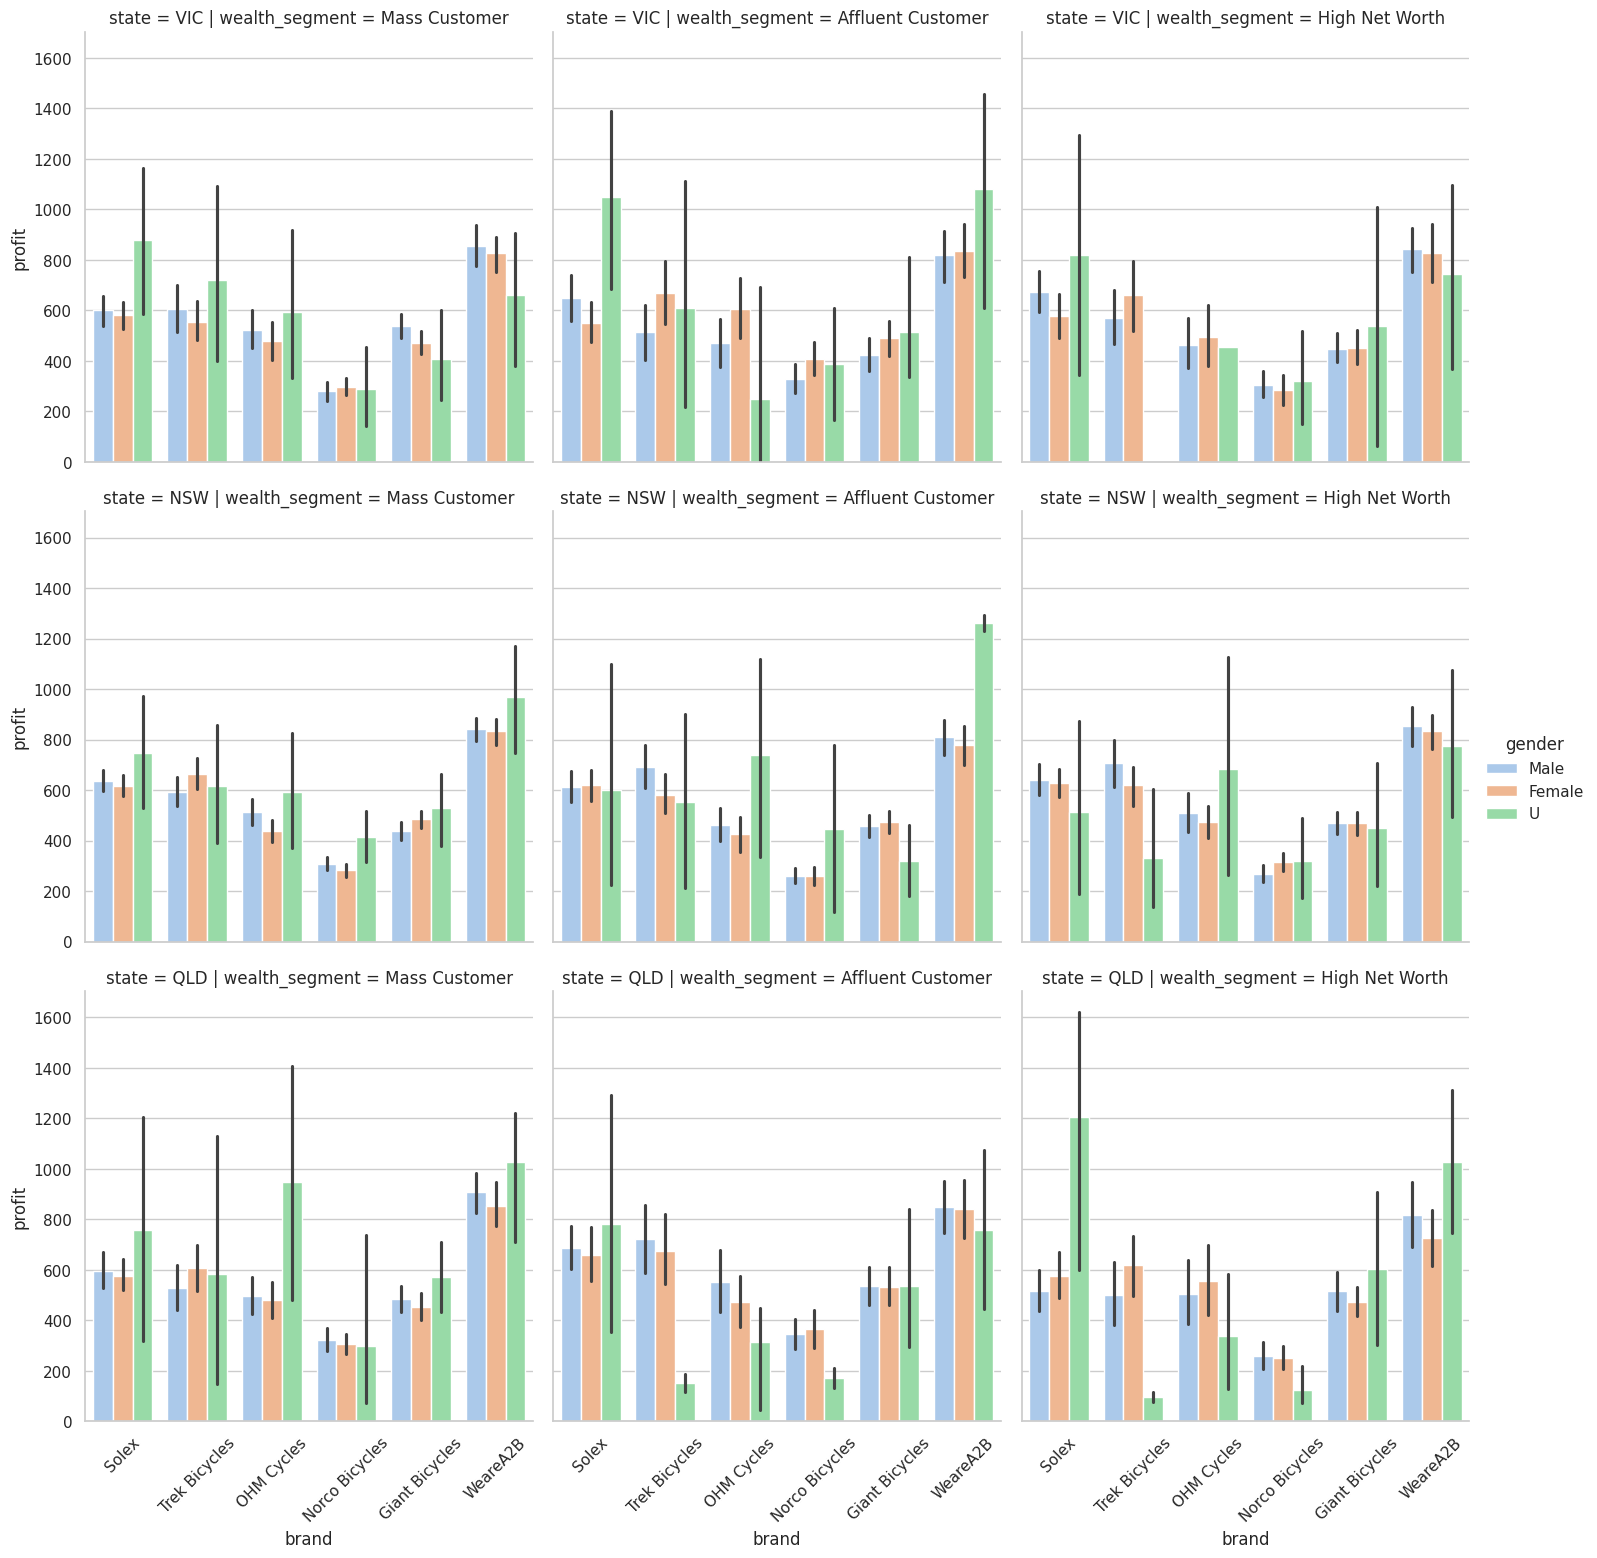

In [144]:
# 1-1. x='brand', y='profit'
# hue = 'gender', col='wealth_segment', row='state'
sns.set(style='whitegrid', palette='pastel')


plot_1 = sns.catplot(x='brand', y='profit', data=join_df, hue='gender', col='wealth_segment', row='state',kind='bar')
plot_1.set(xlabel="brand",ylabel="profit")

for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()



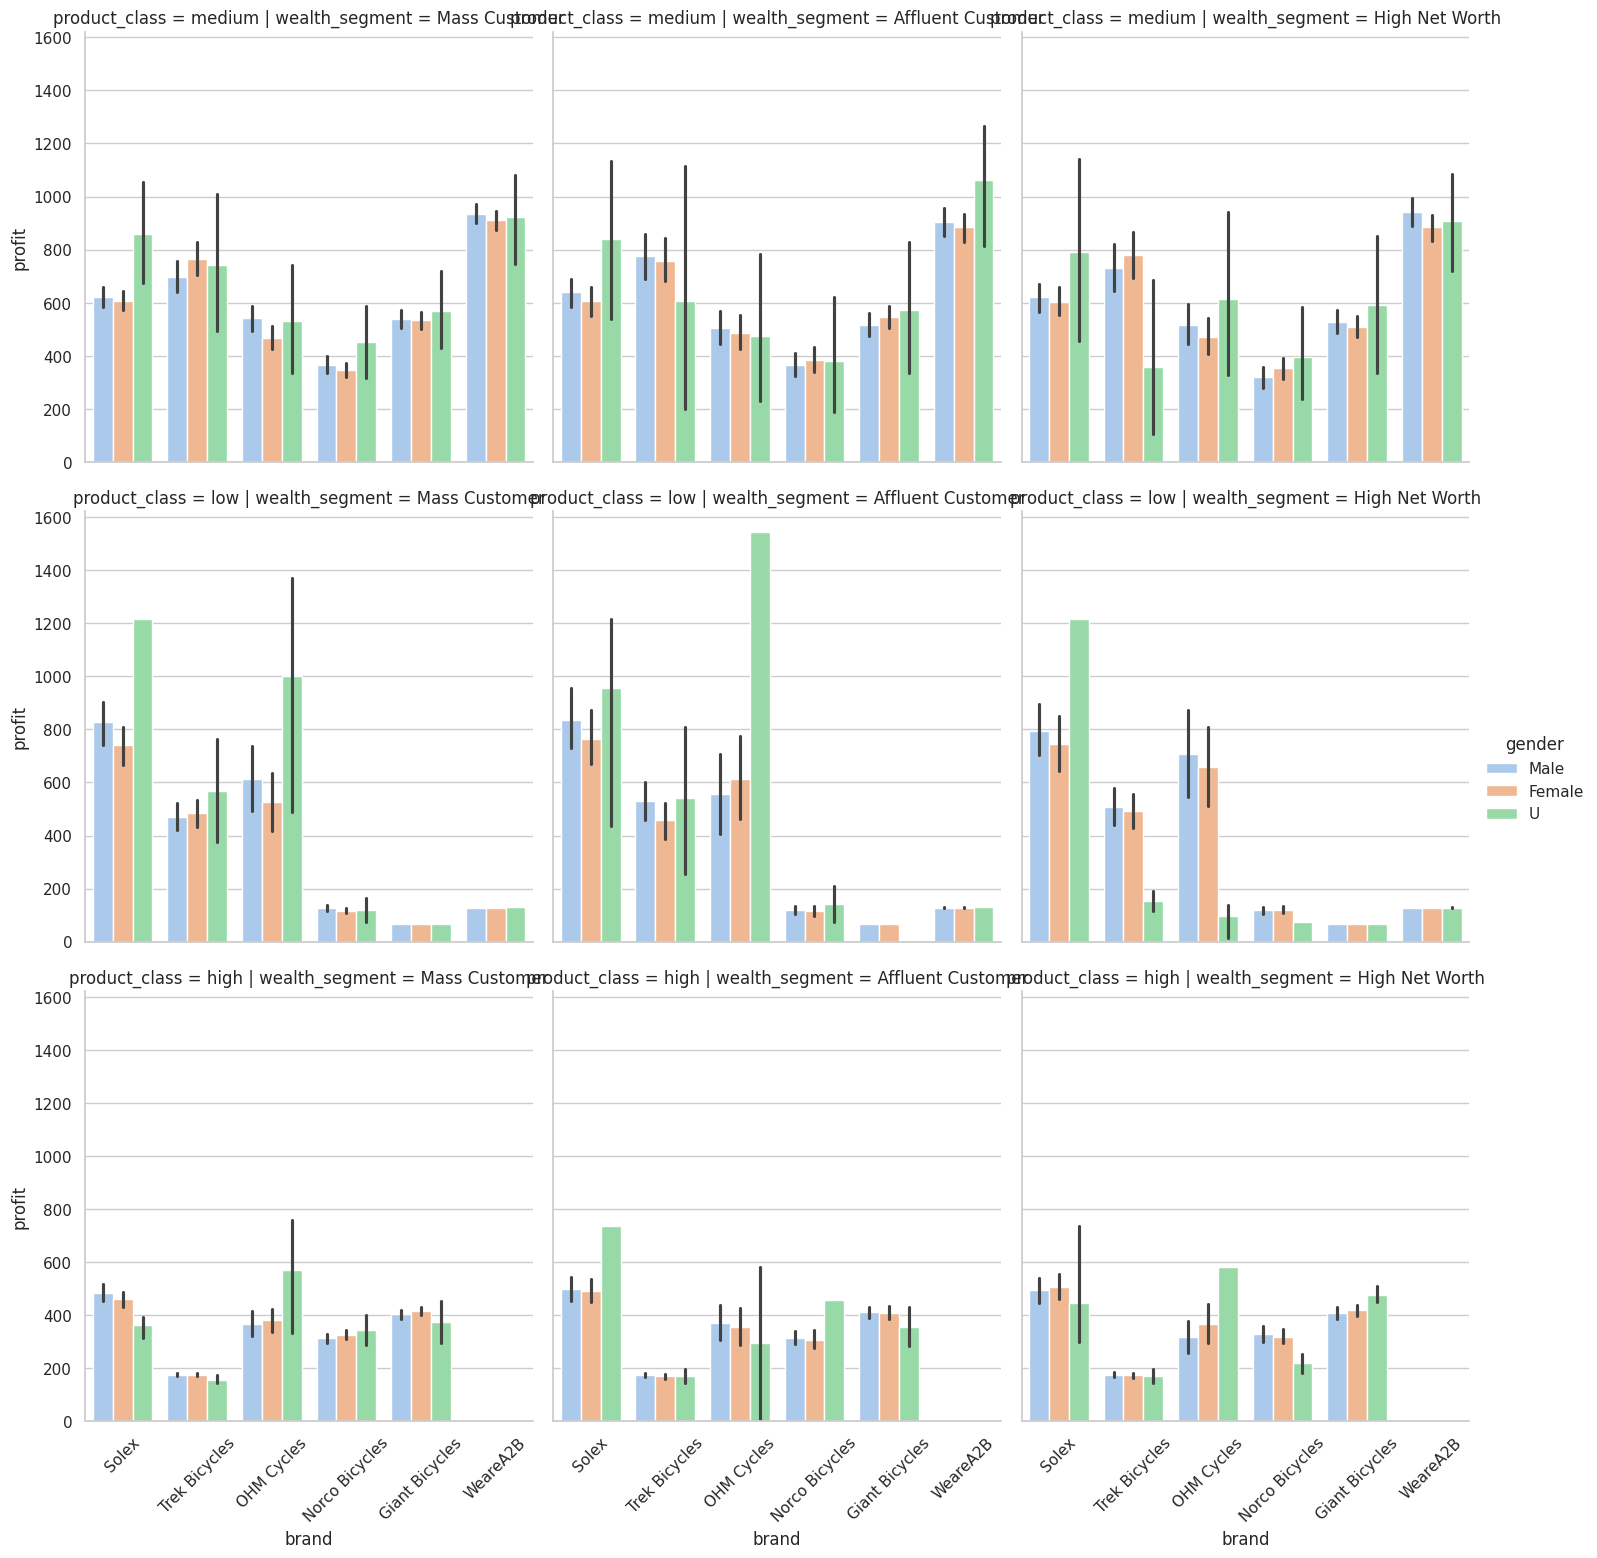

In [145]:
# 1-2. x='brand', y='profit'
# hue = 'gender', col='wealth_segment', row='product_class'
sns.set(style='whitegrid', palette='pastel')

plot_1 = sns.catplot(x='brand', y='profit', data=join_df, hue='gender', col='wealth_segment', row='product_class',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

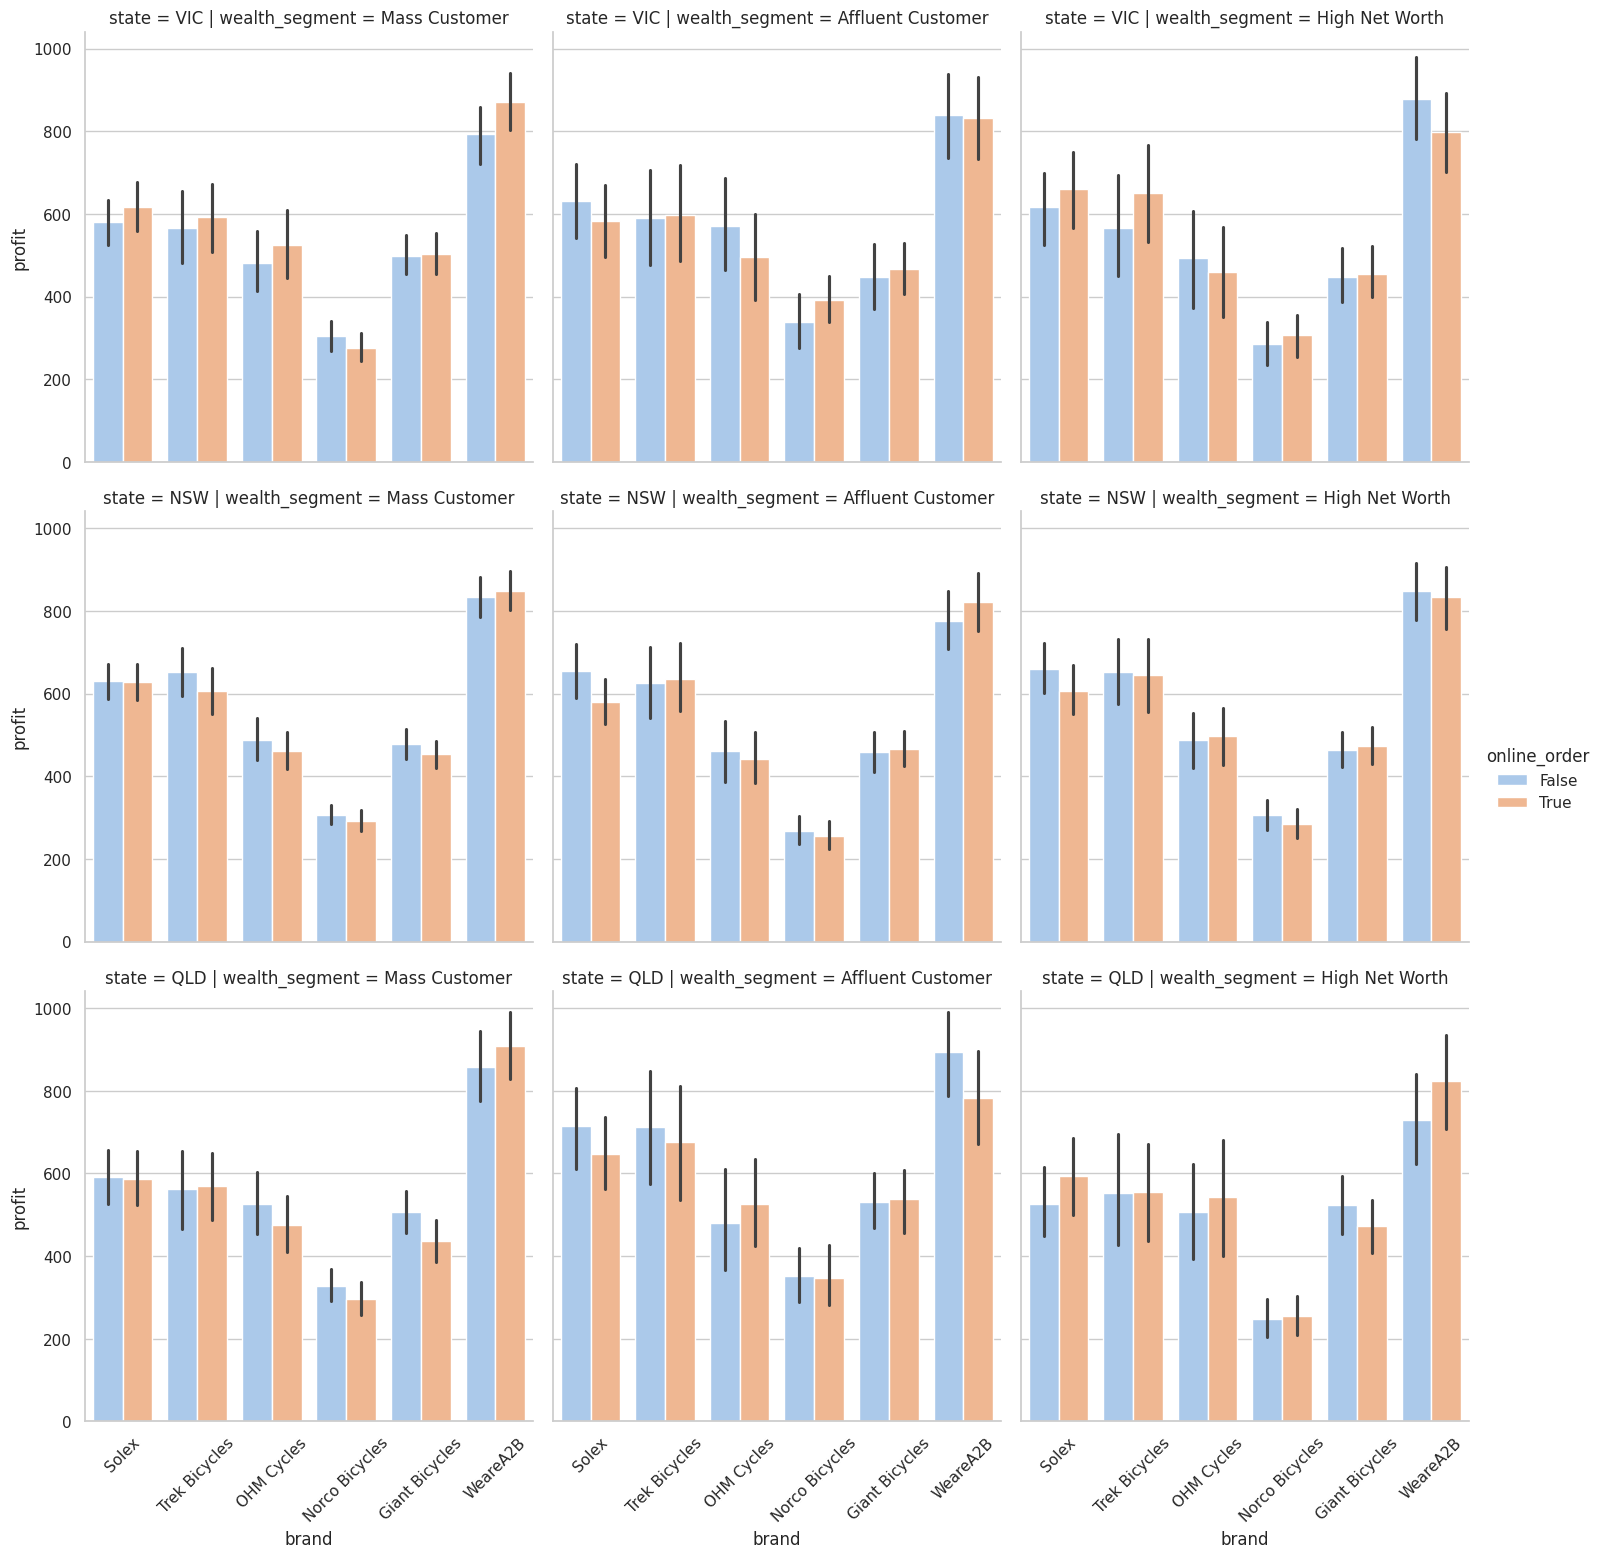

In [146]:
# 1-3. x='brand', y='profit'
# hue = 'online_order', col='wealth_segment', row='state'
sns.set(style='whitegrid', palette='pastel')

plot_1 = sns.catplot(x='brand', y='profit', data=join_df, hue='online_order', col='wealth_segment', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

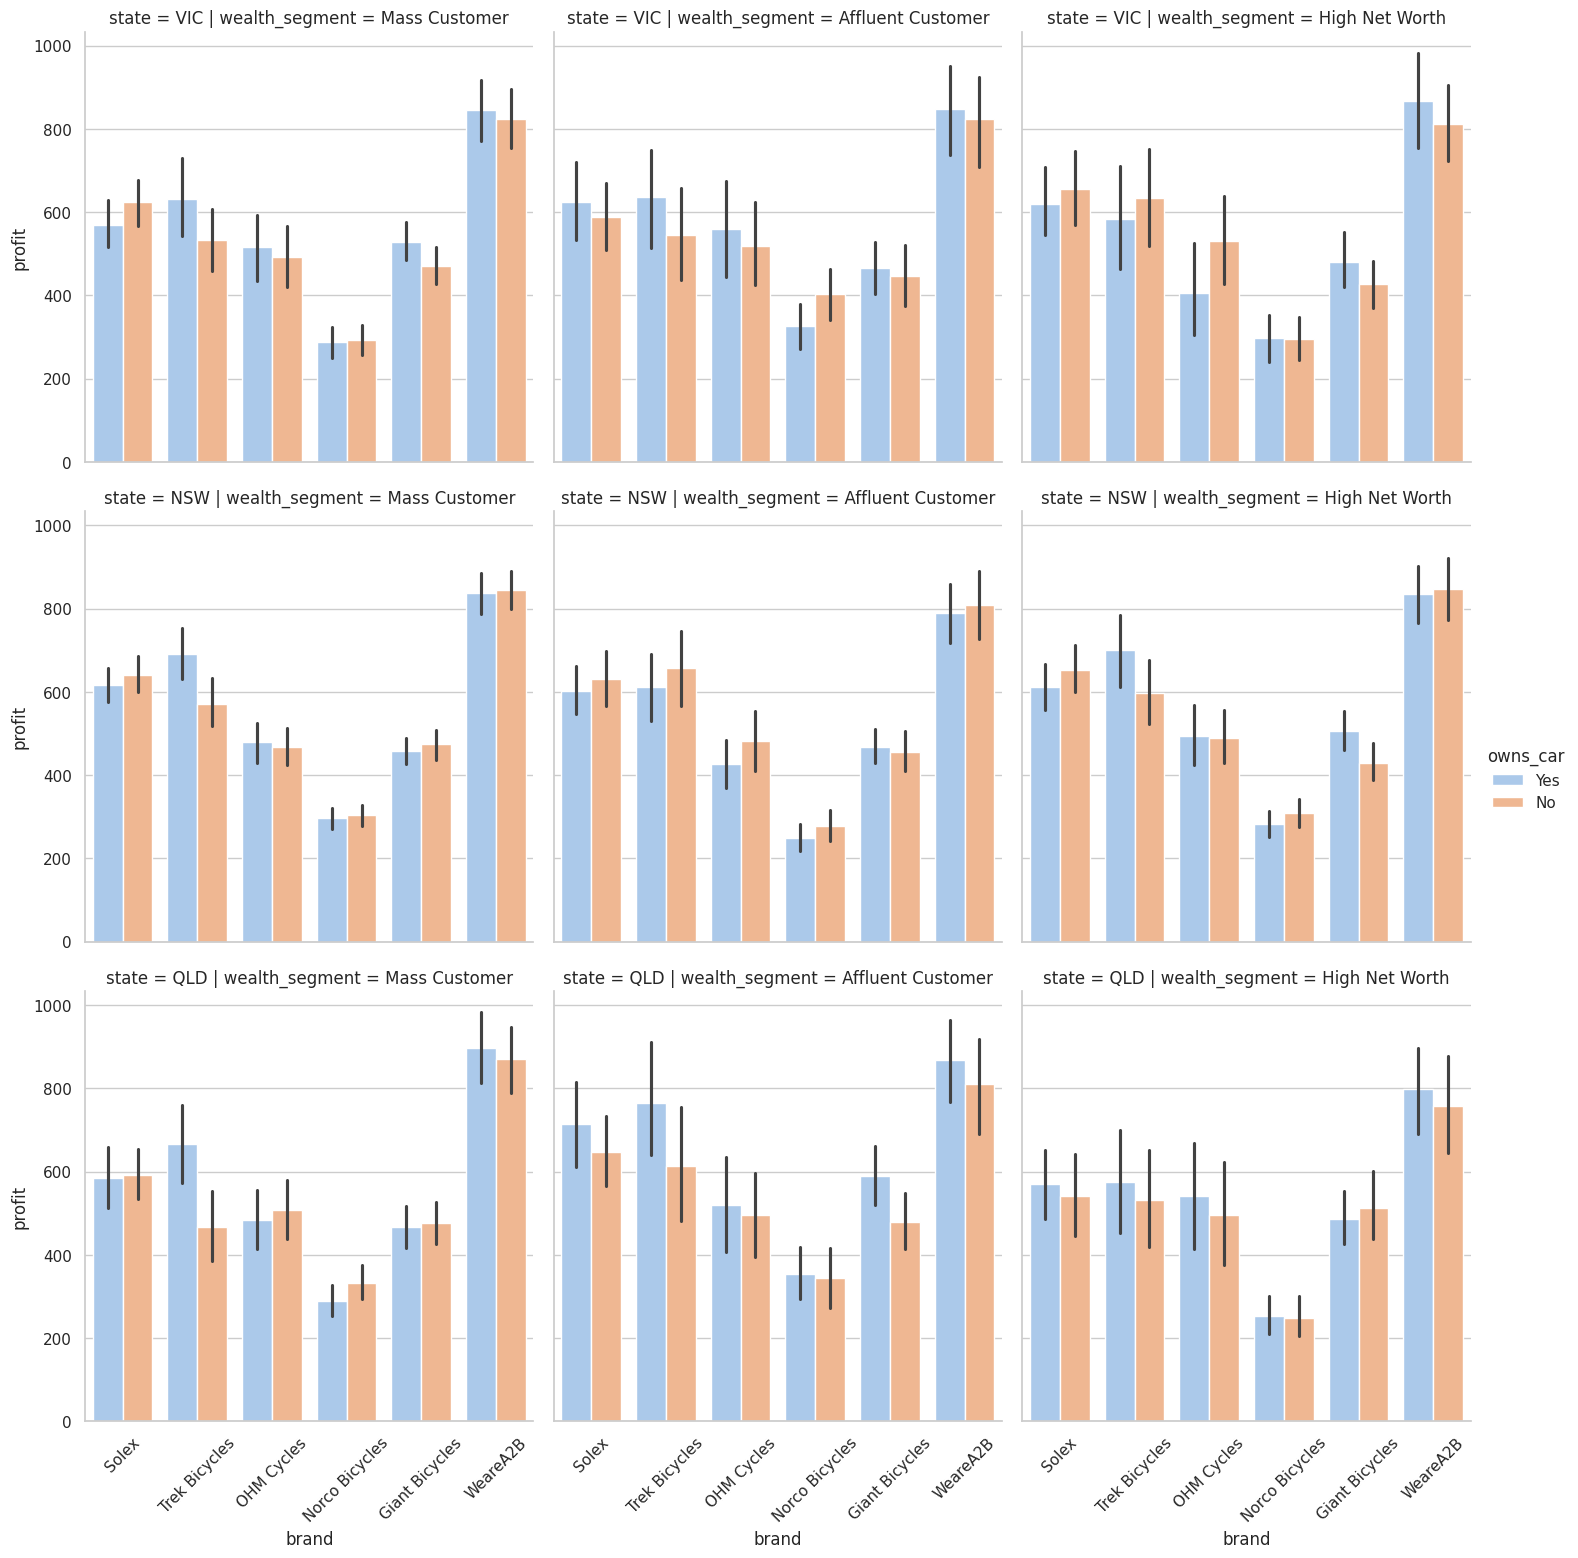

In [147]:
# 1-4. x='brand', y='profit'
# hue = 'owns_car', col='wealth_segment', row='state'
sns.set(style='whitegrid', palette='pastel')

plot_1 = sns.catplot(x='brand', y='profit', data=join_df, hue='owns_car', col='wealth_segment', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

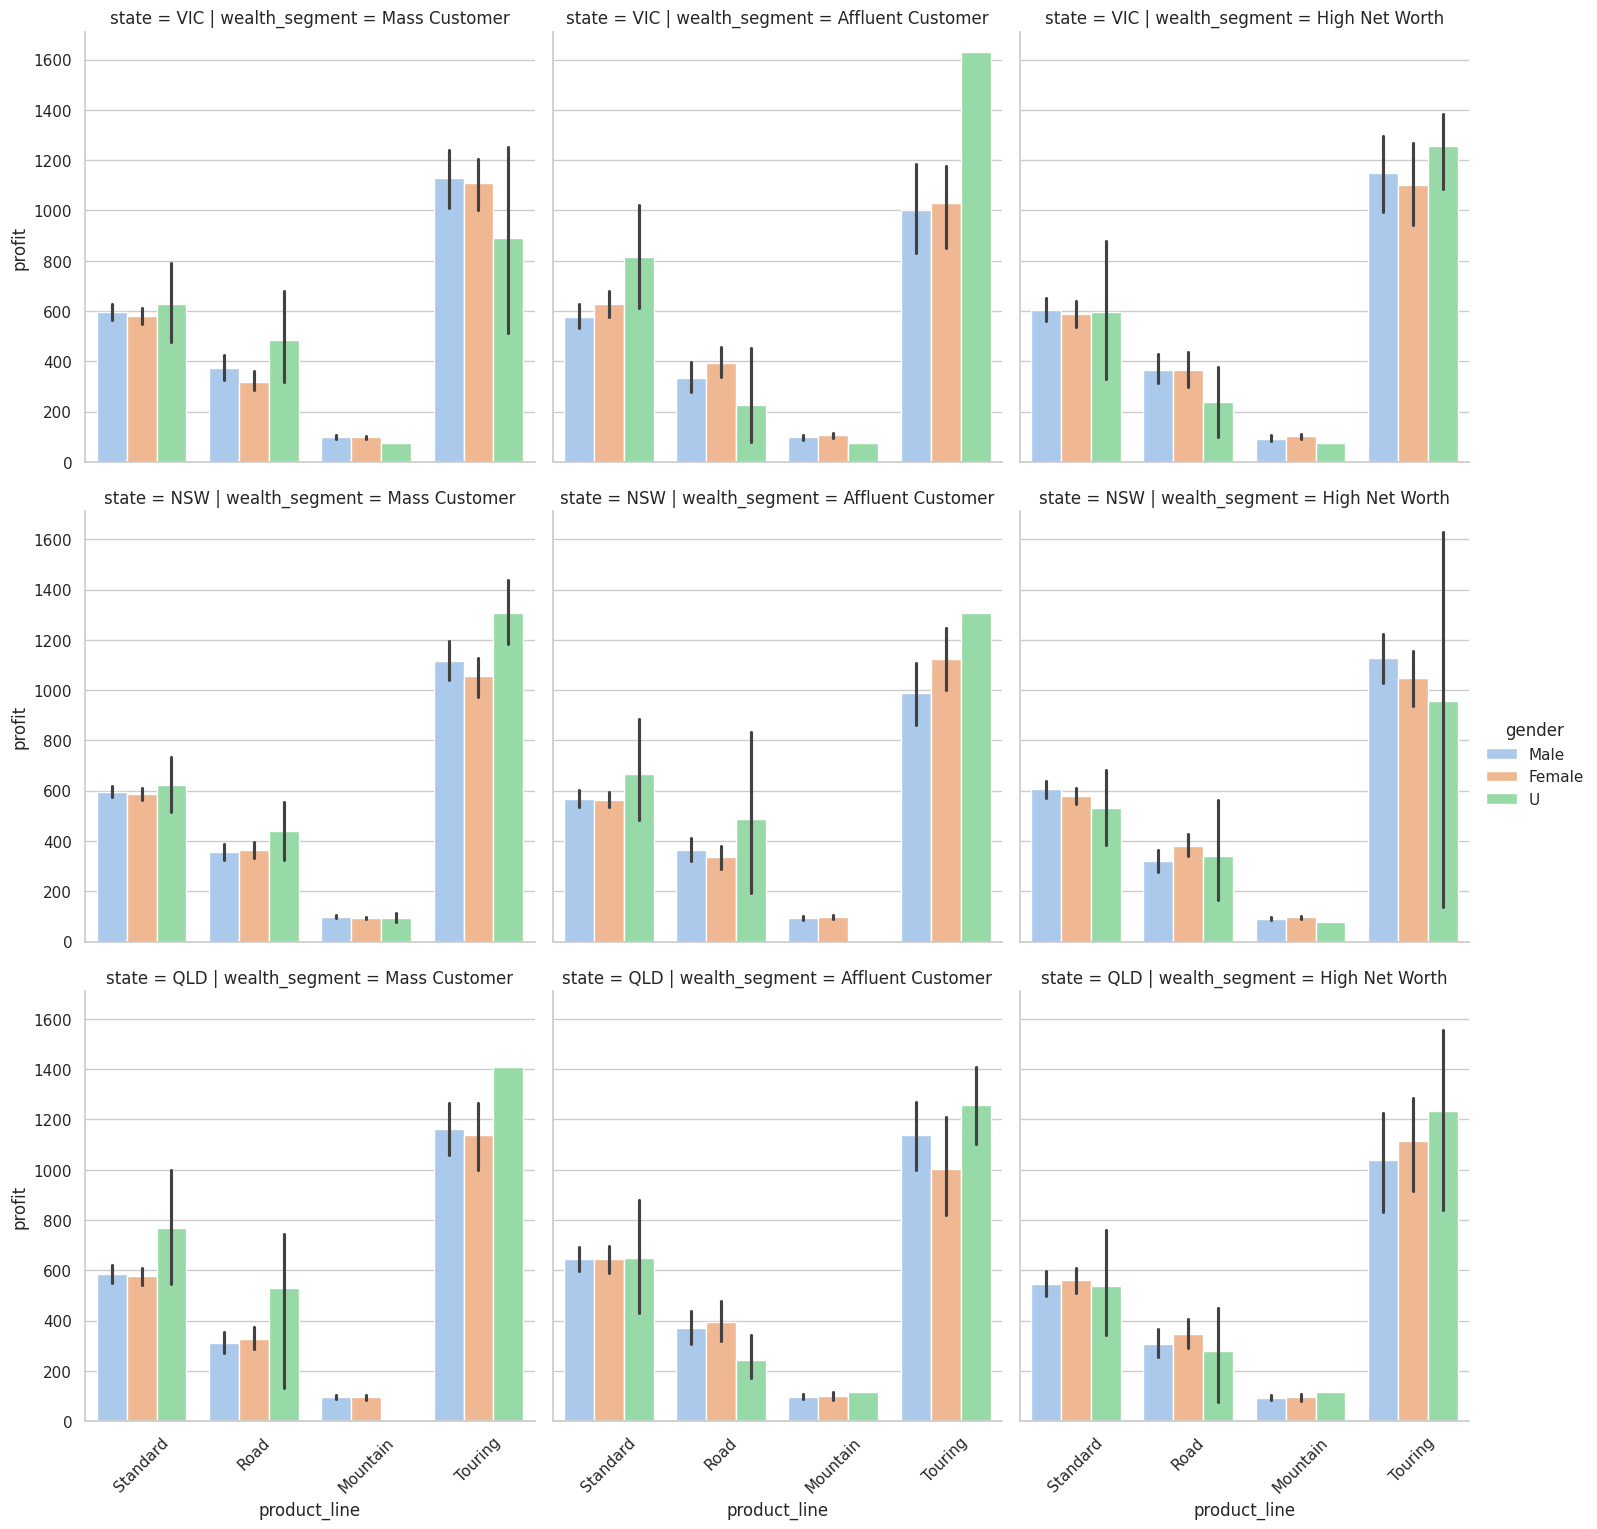

In [148]:
# 2-1. x='product_line', y='profit'
# hue = 'gender', col='wealth_segment', row='state'
sns.set(style='whitegrid', palette='pastel')

plot_1 = sns.catplot(x='product_line', y='profit', data=join_df, hue='gender', col='wealth_segment', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

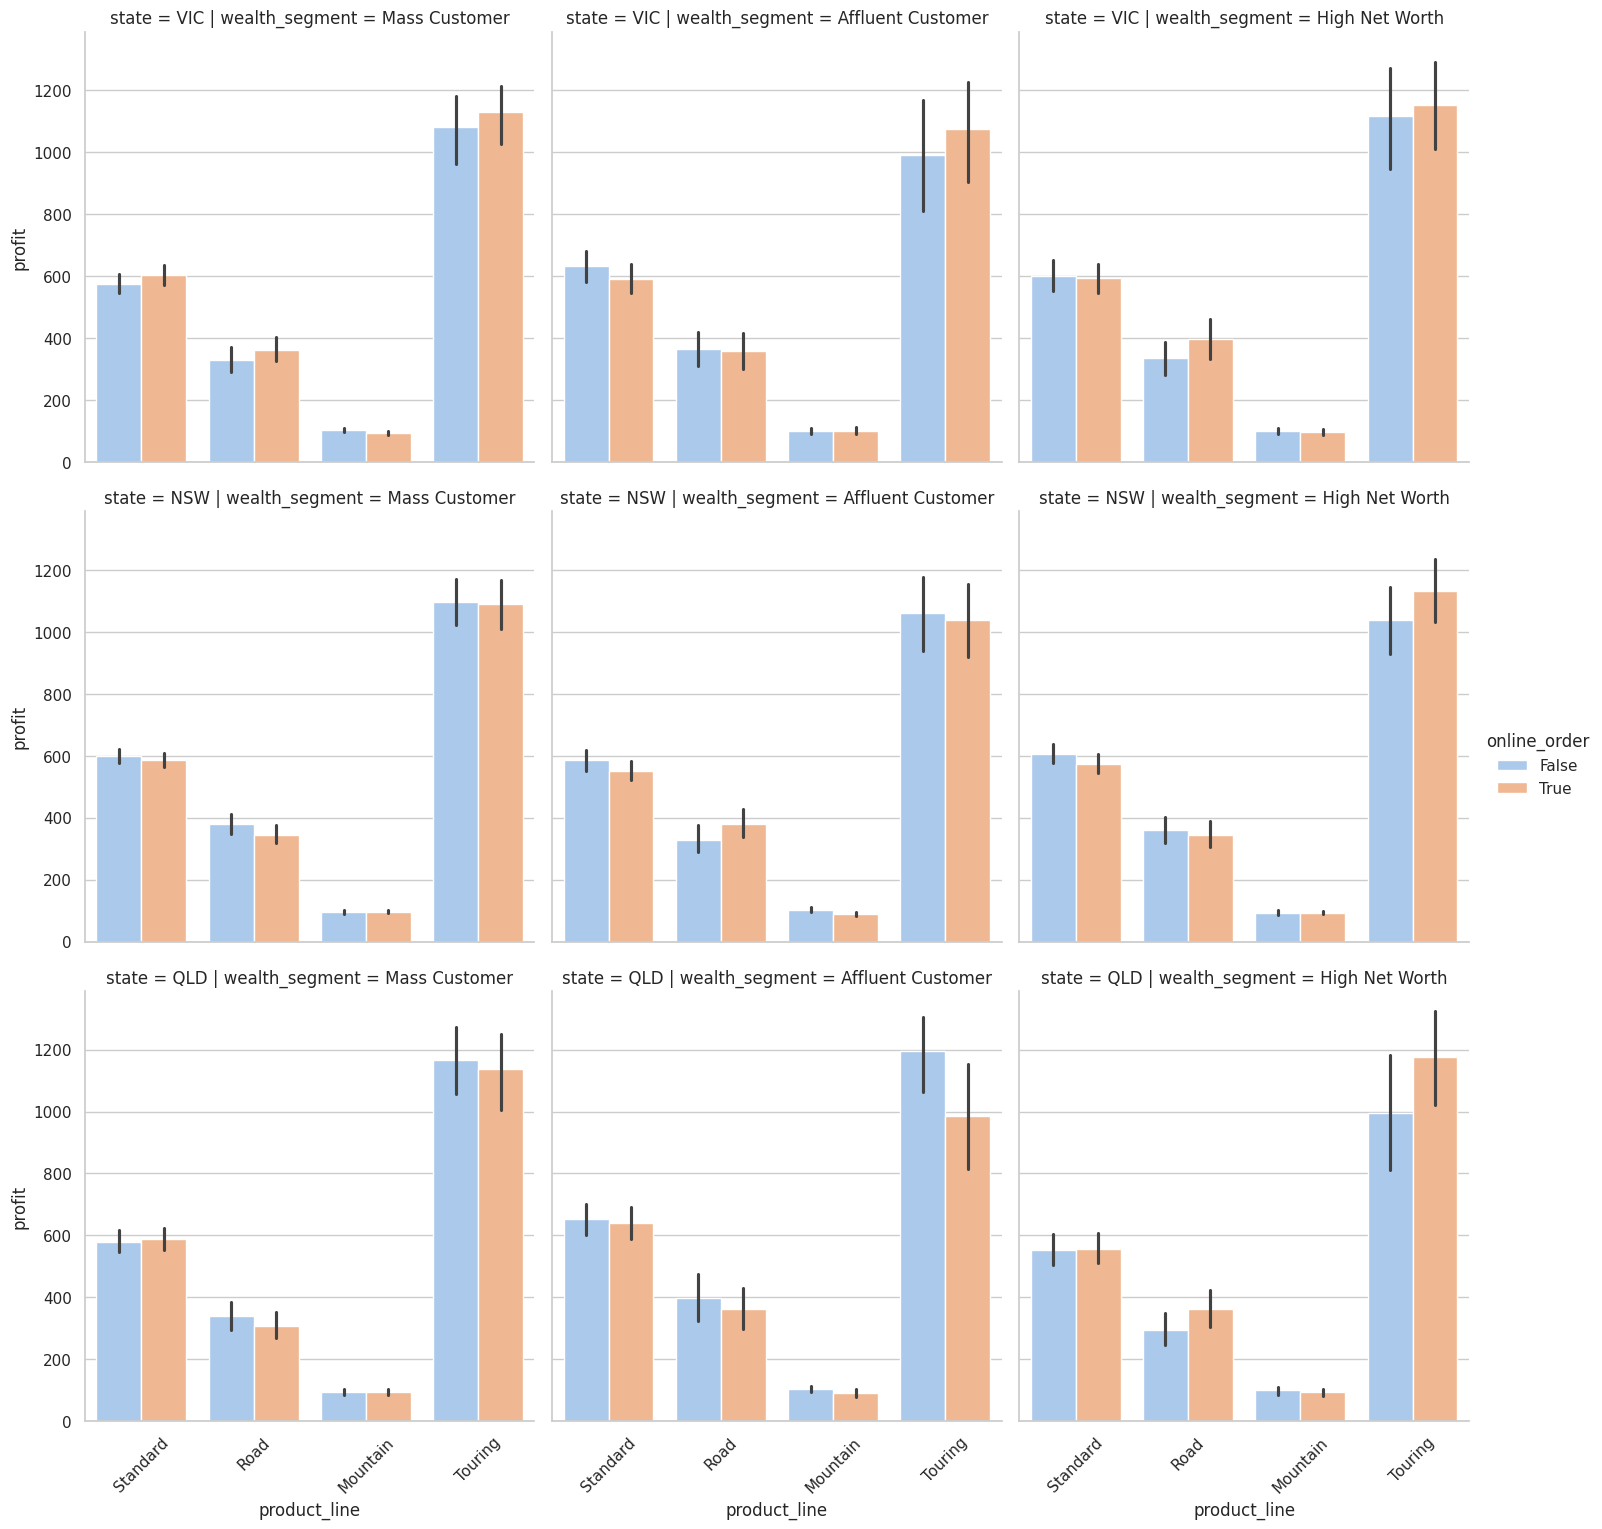

In [149]:
# 2-2. x='product_line', y='profit'
# hue = 'online_order', col='wealth_segment', row='state'
sns.set(style='whitegrid', palette='pastel')
plot_1 = sns.catplot(x='product_line', y='profit', data=join_df, hue='online_order', col='wealth_segment', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

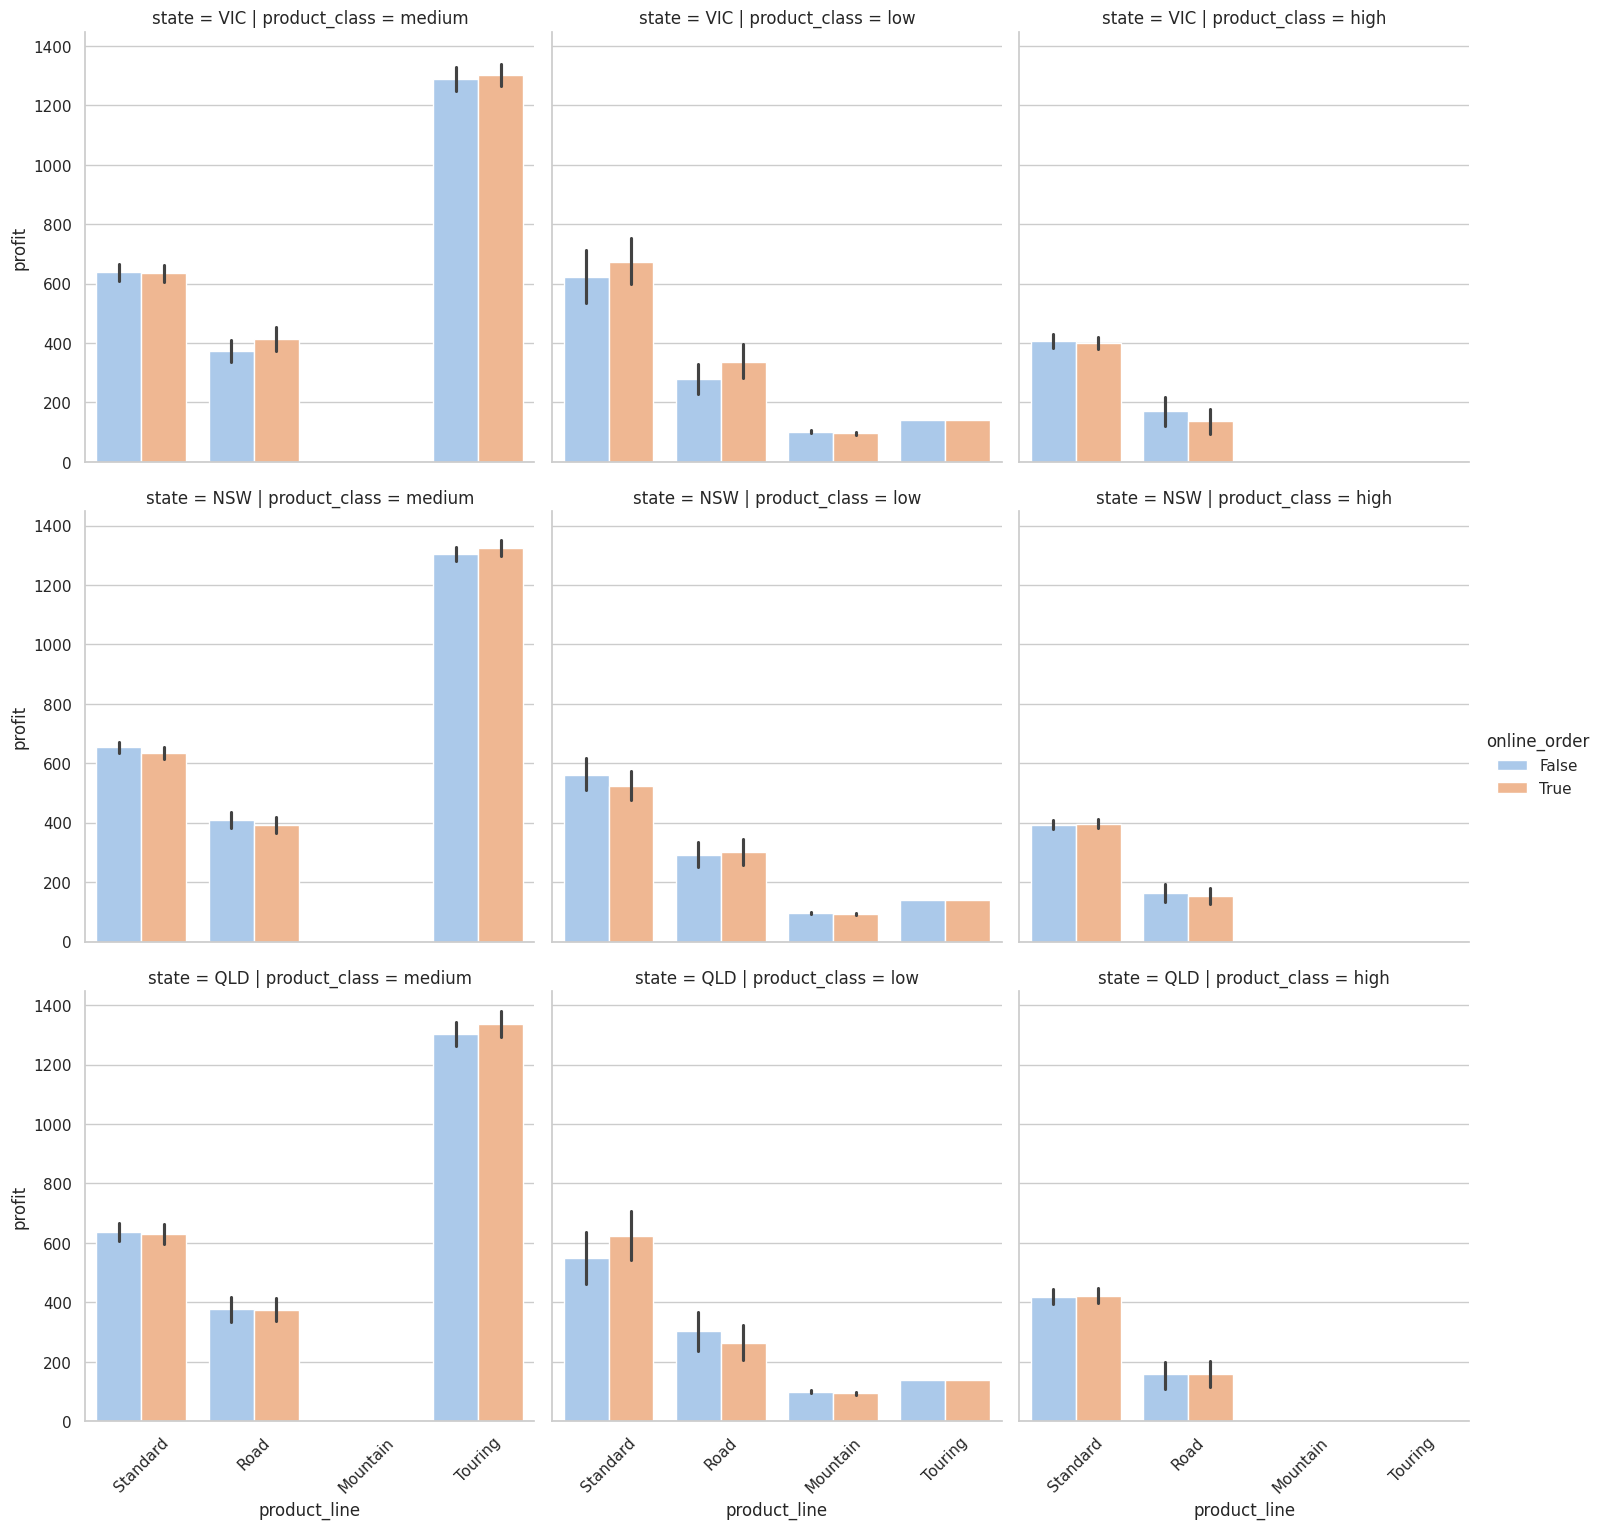

In [150]:
# 2-3. x='product_line', y='profit'
# hue = 'online_order', col='product_class', row='state'
sns.set(style='whitegrid', palette='pastel')
plot_1 = sns.catplot(x='product_line', y='profit', data=join_df, hue='online_order', col='product_class', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

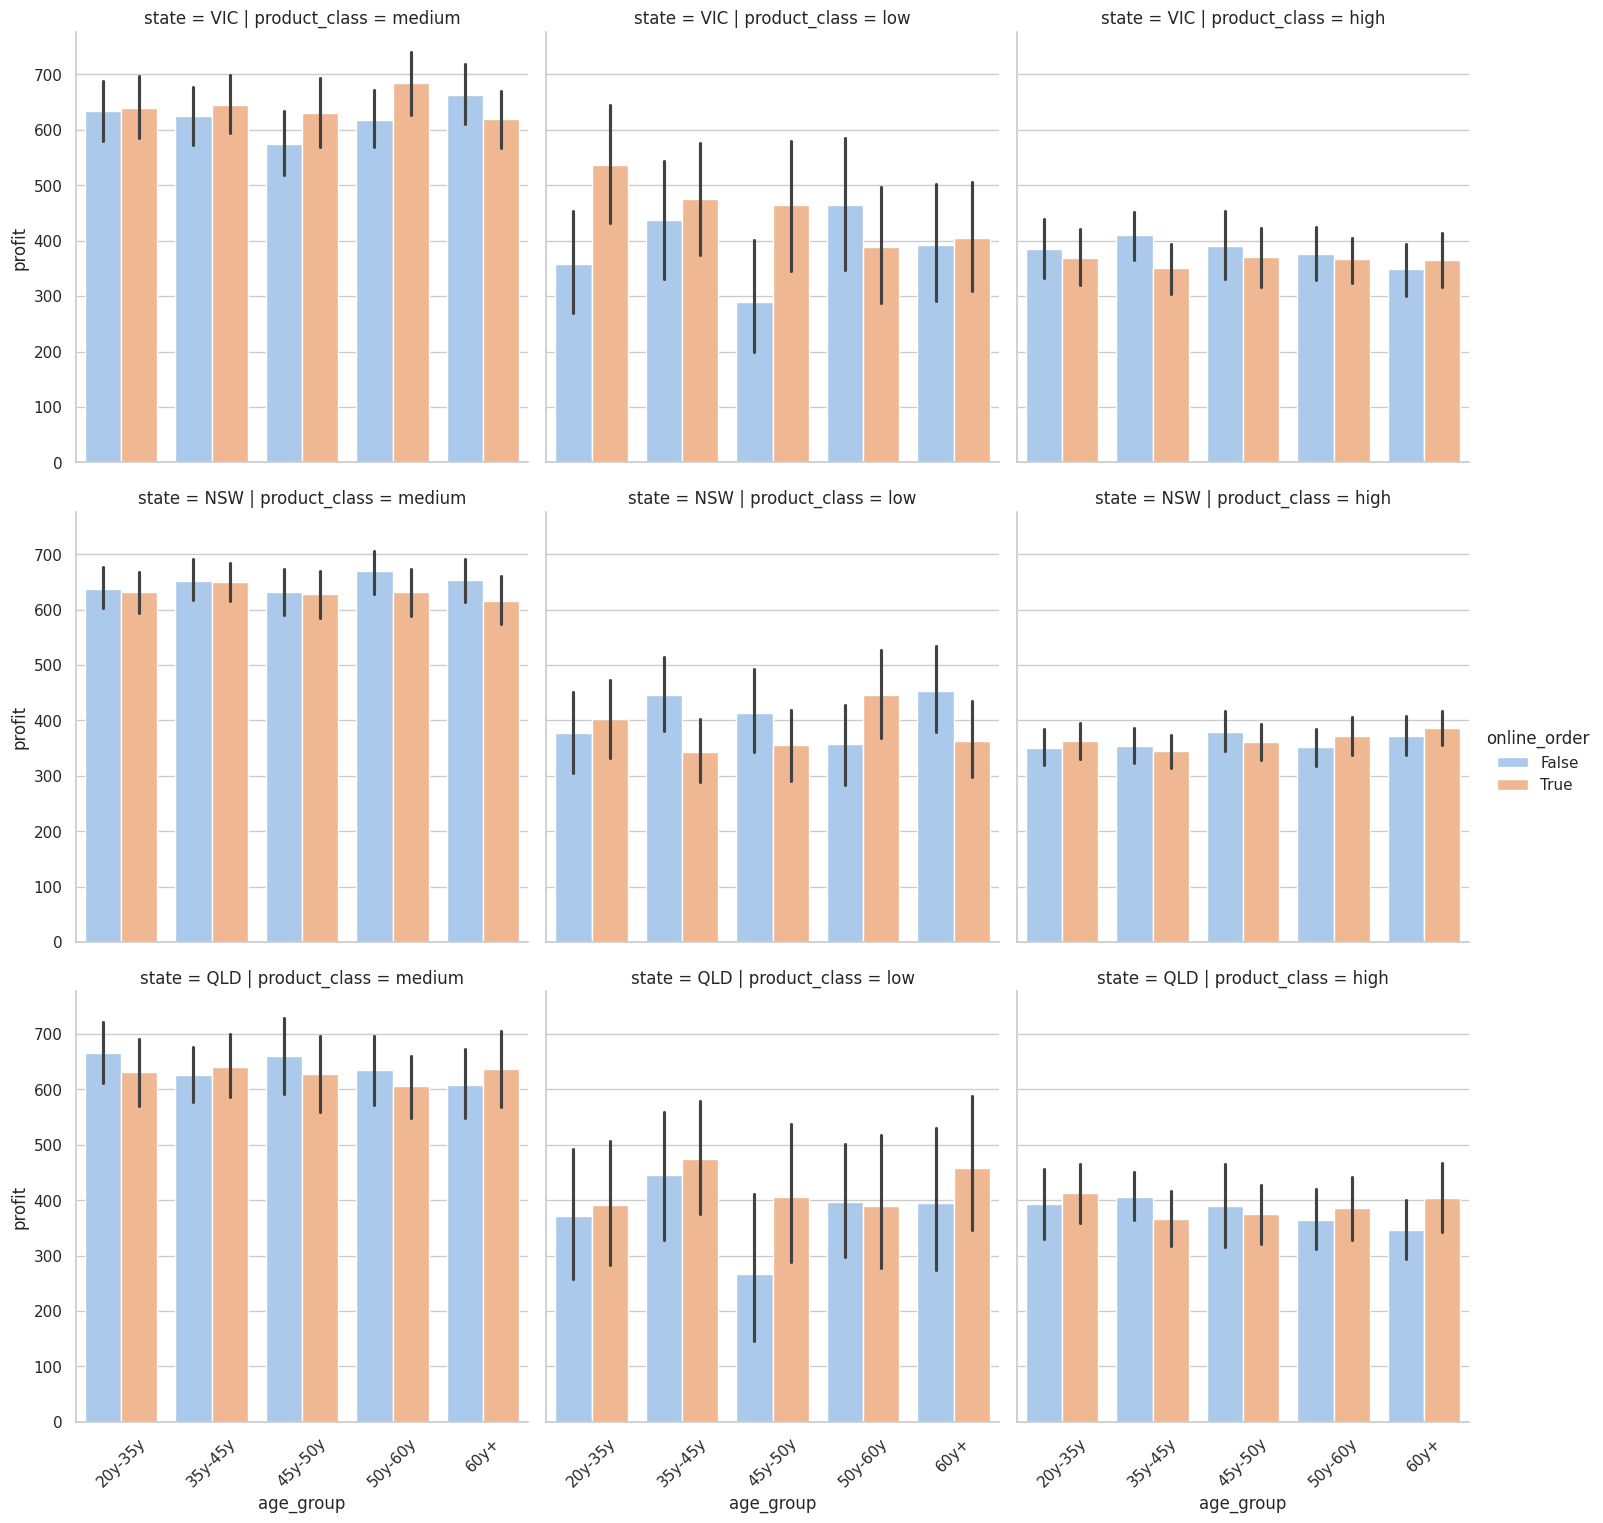

In [151]:
# 3-1. x='age_group', y='profit'
# hue = 'online_order', col='product_class', row='state'
sns.set(style='whitegrid', palette='pastel')
plot_1 = sns.catplot(x='age_group', y='profit', data=join_df, hue='online_order', col='product_class', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

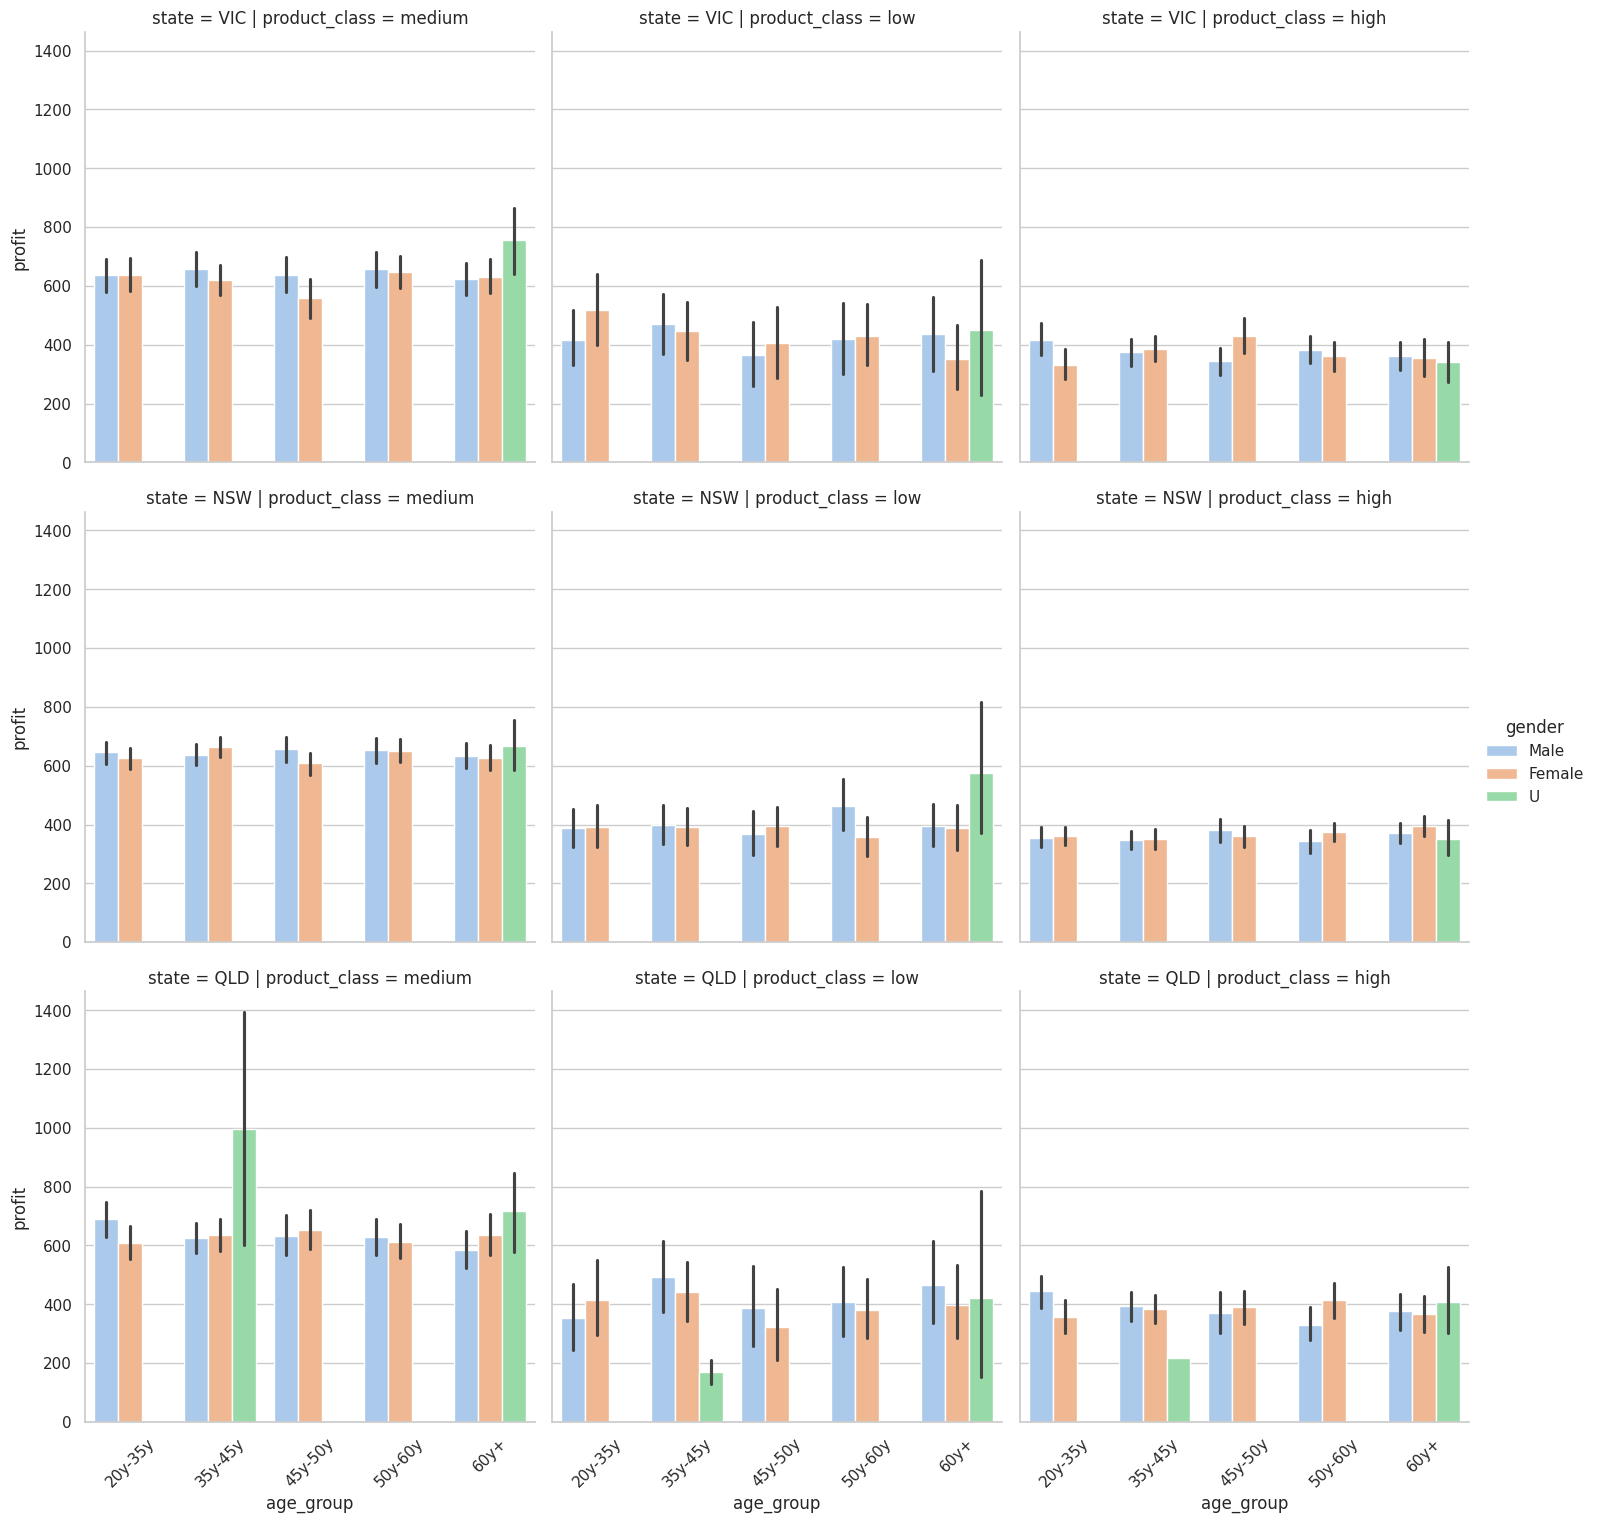

In [152]:
# 3-2. x='age_group', y='profit'
# hue = 'gender', col='product_class', row='state'
sns.set(style='whitegrid', palette='pastel')
plot_1 = sns.catplot(x='age_group', y='profit', data=join_df, hue='gender', col='product_class', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()


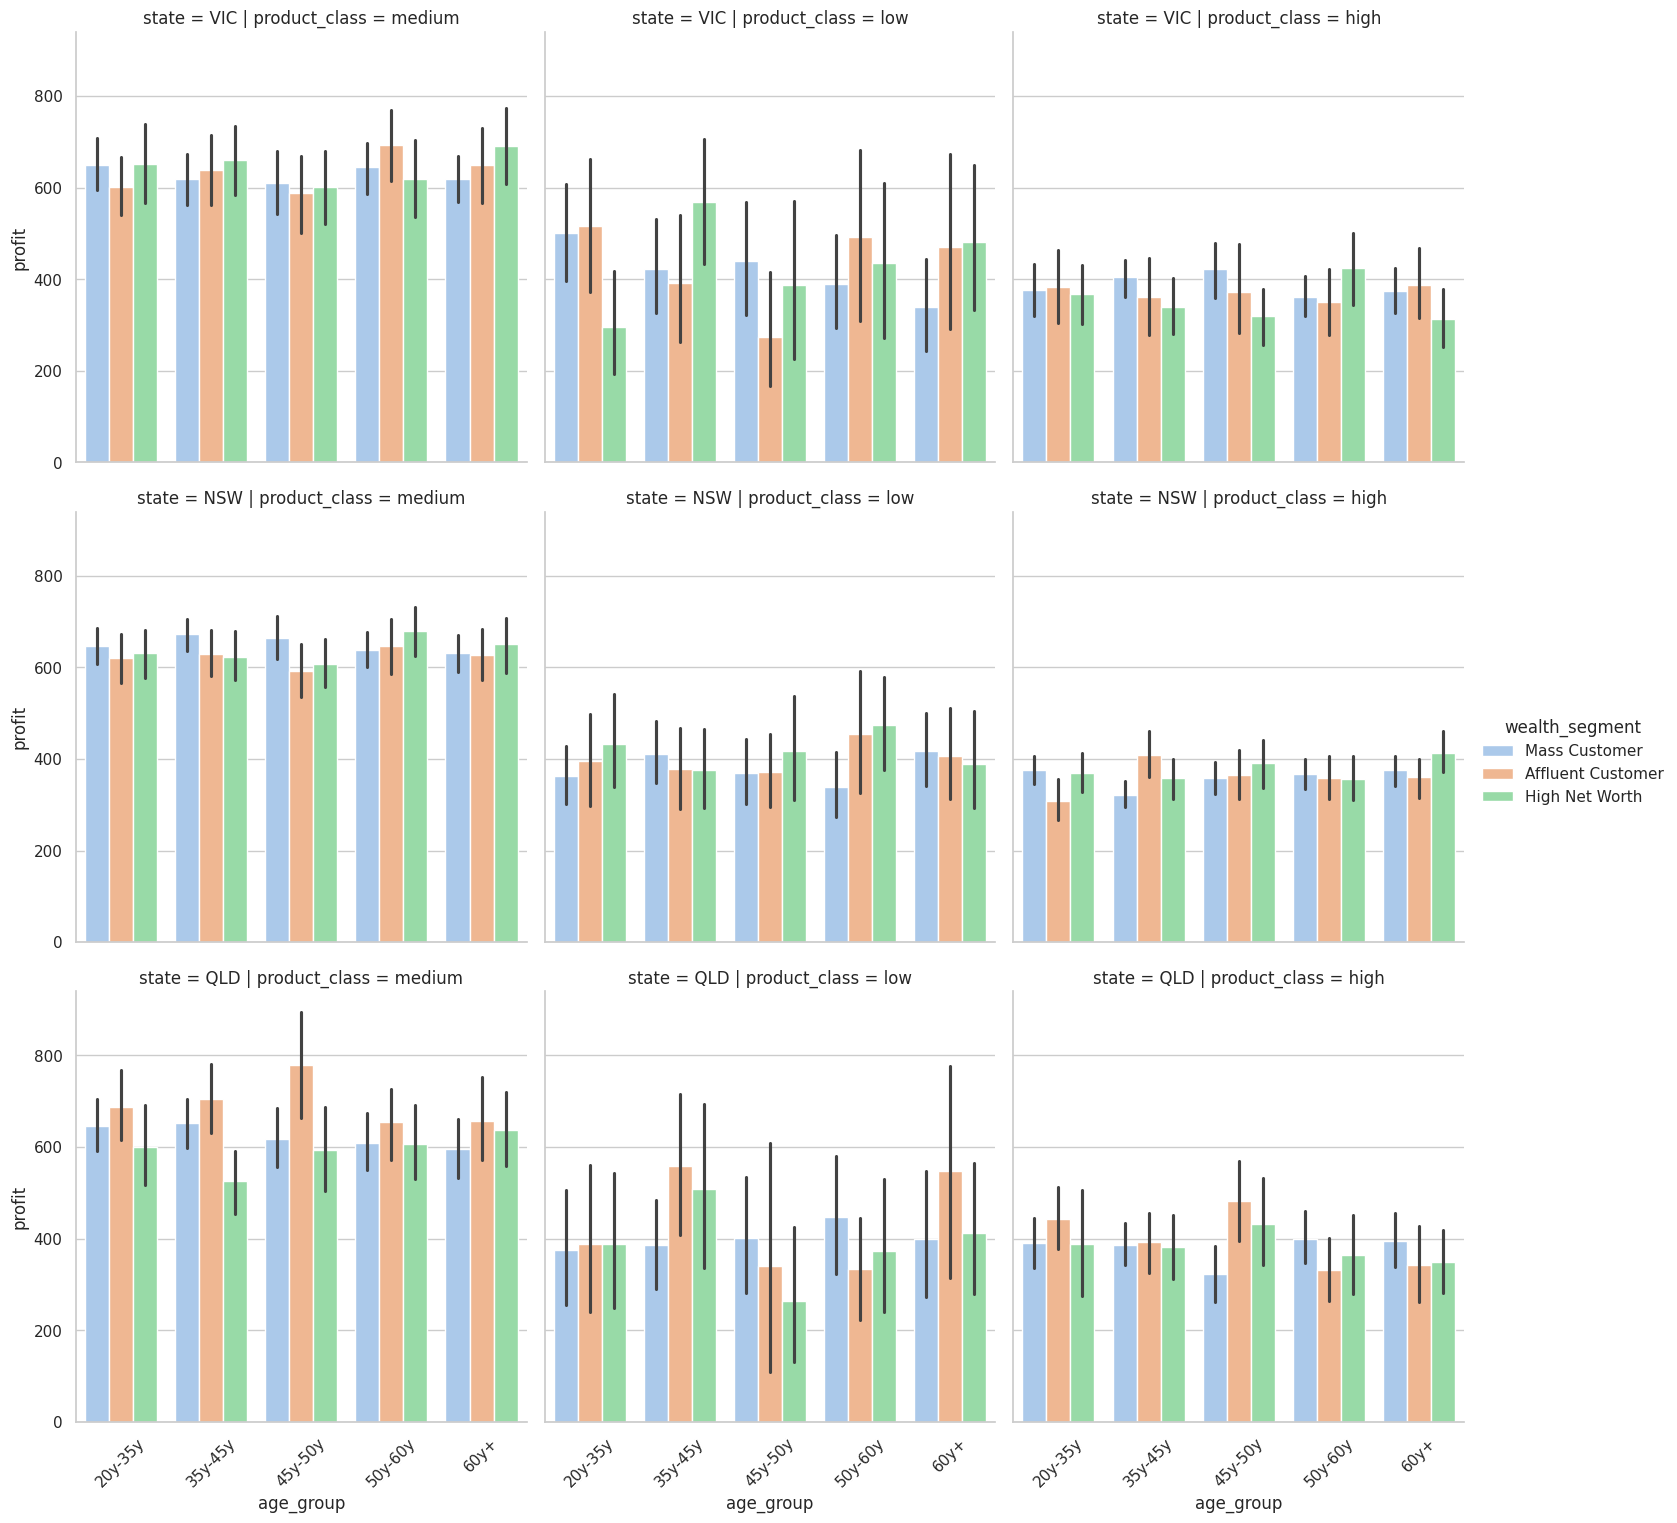

In [153]:
# 3-3. x='age_group', y='profit'
# hue = 'wealth_segment', col='product_class', row='state'
sns.set(style='whitegrid', palette='pastel')
plot_1 = sns.catplot(x='age_group', y='profit', data=join_df, hue='wealth_segment', col='product_class', row='state',kind='bar')
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()


## 7. 多個Numerical v之間的相關性

### Heat Plot

In [154]:
# 1.
join_df[["tenure","standard_cost","profit"]]

tenure  standard_cost   profit
0        10.0          53.62    17.87
1        10.0         388.92  1702.55
2        22.0         248.82  1544.61
3        16.0         381.10   817.36
4         2.0         709.48  1055.82
...       ...            ...      ...
19963     7.0        1203.40   802.26
19964    19.0         312.74   104.24
19965    14.0          44.71  1592.19
19966    20.0         136.73    91.15
19967     5.0        1580.47   195.34

[19968 rows x 3 columns]

In [155]:
join_df[["tenure","standard_cost","profit"]].corr()

tenure  standard_cost    profit
tenure         1.000000      -0.013734  0.003722
standard_cost -0.013734       1.000000 -0.169516
profit         0.003722      -0.169516  1.000000

<Axes: >

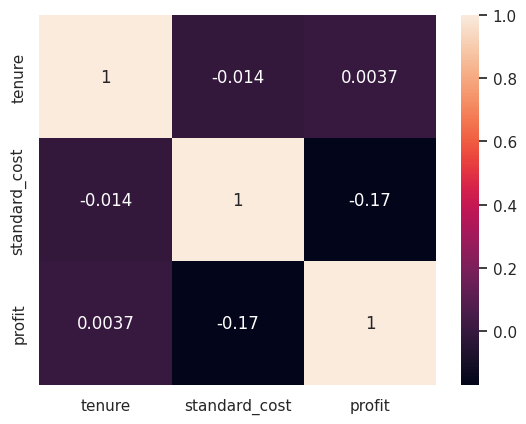

In [156]:
sns.heatmap(join_df[["tenure","standard_cost","profit"]].corr(), annot=True)

In [157]:
#2.
join_df[["past_3_years_bike_related_purchases","standard_cost","profit"]]

past_3_years_bike_related_purchases  standard_cost   profit
0                                       19          53.62    17.87
1                                       89         388.92  1702.55
2                                        9         248.82  1544.61
3                                       83         381.10   817.36
4                                       29         709.48  1055.82
...                                    ...            ...      ...
19963                                    1        1203.40   802.26
19964                                   81         312.74   104.24
19965                                   83          44.71  1592.19
19966                                   12         136.73    91.15
19967                                   73        1580.47   195.34

[19968 rows x 3 columns]

In [158]:
join_df[["past_3_years_bike_related_purchases","standard_cost","profit"]].corr()

past_3_years_bike_related_purchases  \
past_3_years_bike_related_purchases                             1.000000   
standard_cost                                                  -0.008559   
profit                                                          0.013049   

                                     standard_cost    profit  
past_3_years_bike_related_purchases      -0.008559  0.013049  
standard_cost                             1.000000 -0.169516  
profit                                   -0.169516  1.000000

<Axes: >

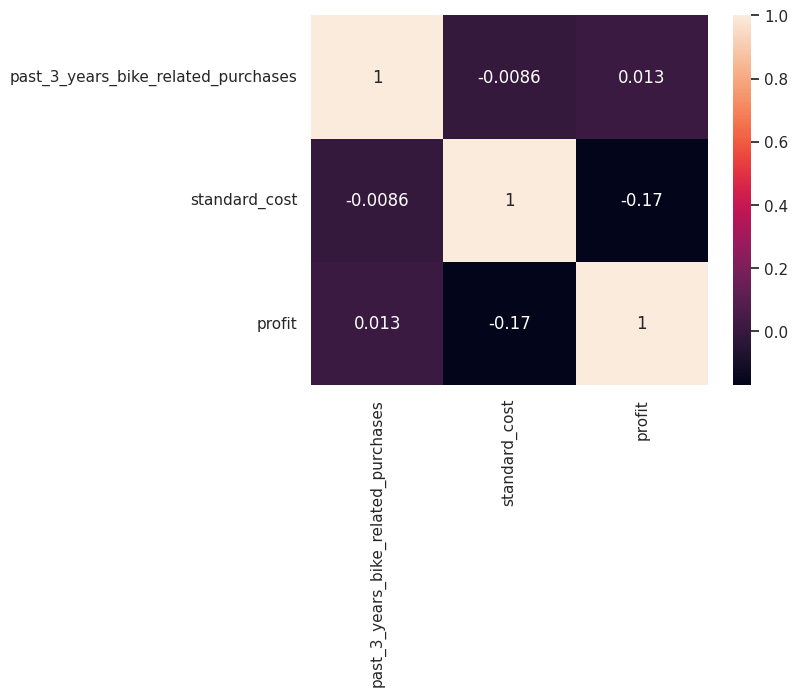

In [159]:
sns.heatmap(join_df[["past_3_years_bike_related_purchases","standard_cost","profit"]].corr(), annot=True)

In [160]:
# 3.
join_df[["list_price","profit","tenure"]]

list_price   profit  tenure
0           71.49    17.87    10.0
1         2091.47  1702.55    10.0
2         1793.43  1544.61    22.0
3         1198.46   817.36    16.0
4         1765.30  1055.82     2.0
...           ...      ...     ...
19963     2005.66   802.26     7.0
19964      416.98   104.24    19.0
19965     1636.90  1592.19    14.0
19966      227.88    91.15    20.0
19967     1775.81   195.34     5.0

[19968 rows x 3 columns]

In [161]:
join_df[["list_price","profit","tenure"]].corr()

list_price    profit    tenure
list_price    1.000000  0.704305 -0.004747
profit        0.704305  1.000000  0.003722
tenure       -0.004747  0.003722  1.000000

<Axes: >

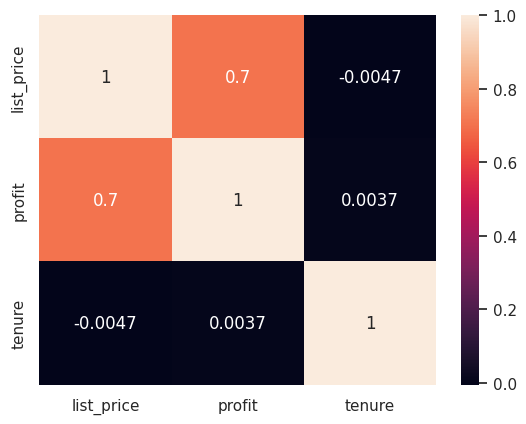

In [162]:
sns.heatmap(join_df[["list_price","profit","tenure"]].corr(), annot=True)

In [163]:
#4.
join_df[["past_3_years_bike_related_purchases","profit","tenure"]]

past_3_years_bike_related_purchases   profit  tenure
0                                       19    17.87    10.0
1                                       89  1702.55    10.0
2                                        9  1544.61    22.0
3                                       83   817.36    16.0
4                                       29  1055.82     2.0
...                                    ...      ...     ...
19963                                    1   802.26     7.0
19964                                   81   104.24    19.0
19965                                   83  1592.19    14.0
19966                                   12    91.15    20.0
19967                                   73   195.34     5.0

[19968 rows x 3 columns]

In [164]:
join_df[["past_3_years_bike_related_purchases","profit","tenure"]].corr()

past_3_years_bike_related_purchases  \
past_3_years_bike_related_purchases                             1.000000   
profit                                                          0.013049   
tenure                                                         -0.021048   

                                       profit    tenure  
past_3_years_bike_related_purchases  0.013049 -0.021048  
profit                               1.000000  0.003722  
tenure                               0.003722  1.000000

<Axes: >

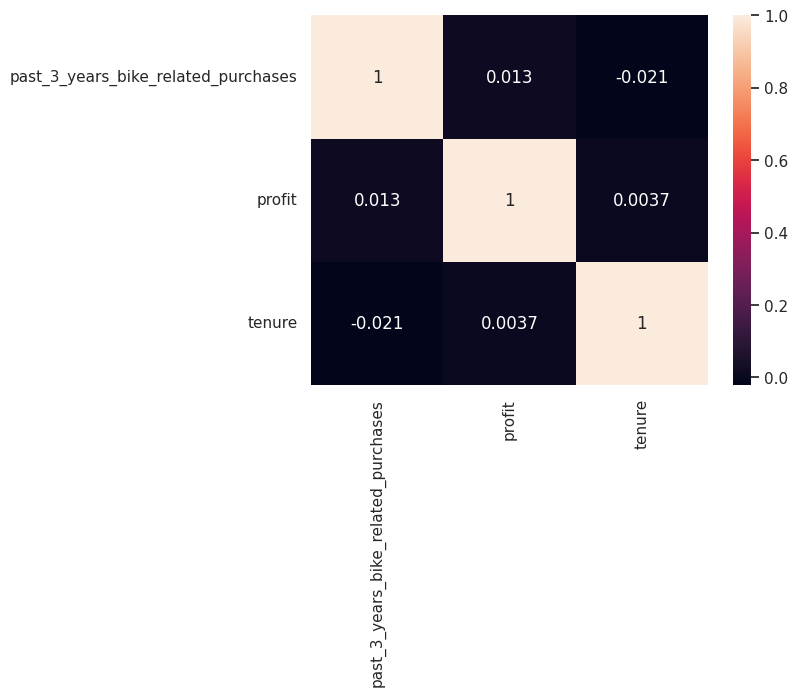

In [165]:
sns.heatmap(join_df[["past_3_years_bike_related_purchases","profit","tenure"]].corr(), annot=True)

# Cohort Analysis

## Assigned the Cohorts & Calculated the Monthly Offset

In [166]:
# Transaction_df 有 transaction_date, 也就是說有一整年的data, 所以 Cohort by Month
# 總共有幾千個用戶, 又有20000筆transaction = 一人一年有多筆transaction

# 所以看這個人在這一年裡發生第一筆transaction的月份,就是這個人的Cohort Month

In [167]:
# 將交易日期轉成datetime的格式
# 並從其中某一筆交易取出「該筆交易所屬月份的第一天」
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])
dt.datetime(transaction_df['transaction_date'][1].year, transaction_df['transaction_date'][1].month, 1)

/tmp/ipython-input-167-940572099.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])


datetime.datetime(2024, 2, 1, 0, 0)

### Step1. 先求 Transaction Month

In [168]:
# 先要把transaction_date變成transaction_month. 可利用datetime()
# datetime(year, month ,1)把統一的日期都變為1號
# A function that will parse the date Time based cohort:  1 day of month

def get_month(x):
  return dt.datetime(x.year, x.month, 1)

# Create transaction_date column based on month and store in TransactionMonth
# 用apply()剛剛自定義的函數,把transaction_date變成transaction_month, 就是把每筆transaction都變成當月的1號
# 現在有了transaction_month就可以求cohort month了

transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month)
transaction_df

0      transaction_id  product_id  customer_id transaction_date  online_order  \
1                   1           2         2950       2024-02-25         False   
2                   2           3         3120       2024-05-21          True   
3                   3          37          402       2024-10-16         False   
4                   4          88         3135       2024-08-31         False   
5                   5          78          787       2024-01-10          True   
...               ...         ...          ...              ...           ...   
19996           19996          51         1018       2024-06-24          True   
19997           19997          41          127       2024-09-11          True   
19998           19998          87         2284       2024-04-14          True   
19999           19999           6         2764       2024-03-07         False   
20000           20000          11         1144       2024-09-22          True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0      list_price  standard_cost  product_first_sold_date   profit  \
1           71.49          53.62                    41245    17.87   
2         2091.47         388.92                    41701  1702.55   
3         1793.43         248.82                    36361  1544.61   
4         1198.46         381.10                    36145   817.36   
5         1765.30         709.48                    42226  1055.82   
...           ...            ...                      ...      ...   
19996     2005.66        1203.40                    37823   802.26   
19997      416.98         312.74                    35560   104.24   
19998     1636.90          44.71                    40410  1592.19   
19999      227.88         136.73                    38216    91.15   
20000     1775.81        1580.47                    36334   195.34   

0     TransactionMonth  
1           2024-02-01  
2           2024-05-01  
3           2024-10-01  
4           2024-08-01  
5           2024-01-01  
...                ...  
19996       2024-06-01  
19997       2024-09-01  
19998       2024-04-01  
19999       2024-03-01  
20000       2024-09-01  

[20000 rows x 15 columns]

### HW: .min()和.transform('min)的區別？
* .min(): 是按照customer_id當index排列出來, 但是少於總行數2萬筆.
* .transform('min'): 是把每一筆transaciton都當作一個index, 排列出所有2萬筆的transcation. 只不過會有duplicate data.後面用unique()就可以調整

### Step 2. 再求 Cohort Month

In [169]:
# 每一個customer_id,在所有歷史紀錄裡發生的第一筆transaction所在的月份
# 就是groupby customer_id 對於 transaction month 求 min

transaction_df.groupby('customer_id')['TransactionMonth'].min()

customer_id
1      2024-02-01
2      2024-04-01
3      2024-02-01
4      2024-03-01
5      2024-03-01
          ...    
3497   2024-01-01
3498   2024-02-01
3499   2024-01-01
3500   2024-02-01
5034   2024-01-01
Name: TransactionMonth, Length: 3494, dtype: datetime64[ns]

In [170]:
transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

1       2024-02-01
2       2024-01-01
3       2024-01-01
4       2024-02-01
5       2024-01-01
           ...    
19996   2024-01-01
19997   2024-01-01
19998   2024-03-01
19999   2024-02-01
20000   2024-01-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [171]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset

# 知道每一行這個customer_id 所有的transcation以後,這個id的第一筆transaction所在的月份
# 增加一列叫做cohort month


transaction_df['CohortMonth'] = transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

# printing top 5 rows

print(transaction_df.head())

0  transaction_id  product_id  customer_id transaction_date  online_order  \
1               1           2         2950       2024-02-25         False   
2               2           3         3120       2024-05-21          True   
3               3          37          402       2024-10-16         False   
4               4          88         3135       2024-08-31         False   
5               5          78          787       2024-01-10          True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date   profit  \
1       71.49          53.

In [172]:
# 舉例講解：
# customer_id是2950的這個人,他所在的transaction moth是02-01,他的cohort month也是02-01
# 證明2950的這個人的第一筆transaction就是發生在2月份

# customer_id是3120的這個人,他所在的transaction month是05-01,他的cohort month是01-01
# 證明3120的這個人的第一筆transaction是發生在1月份

### Step 3. 求 Cohort Index

In [173]:
# 現在有每一個customer_id也就是每個人的cohort month, 已經排列出每個人的第一筆交易紀錄的月份
# 接著就要求cohort index, 就是有這一整年的交易紀錄,所以用每個month來看差異
# 觀察每個月購買數量的對比

In [174]:
# Q: 這裡的code看不懂
# A: 給任何一個column, 自動偵測年月日,
#    放回到transaction_df裡.一個歸類在transactionMonth,一個歸類在CohortMonth因為日不怎麼用得到,所以用下底線替換掉


def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `InvoiceDay` column

transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')

# Getting the integers for date parts from the `CohortDay` column

cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

In [175]:
# 那cohort index要怎麼求？
# 用transaction month的這一列, 證明這個人在這個月還在active
# 距離cohort month發生第一筆交易紀錄的月份是“第幾個月”,即是他的cohort index
# 證明這個人在第幾個月還在active

In [176]:
#  Get the  difference in years 減掉年份的差異＊12

years_diff = transcation_year - cohort_year

# Calculate difference in months 減掉月份的差異 + 1
# 如果想把還在active的當月作為cohort month 1的話,就 +1
# 如果想從 cohort month 0 開始算的話,就不用加了

months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head(5)

0  transaction_id  product_id  customer_id transaction_date  online_order  \
1               1           2         2950       2024-02-25         False   
2               2           3         3120       2024-05-21          True   
3               3          37          402       2024-10-16         False   
4               4          88         3135       2024-08-31         False   
5               5          78          787       2024-01-10          True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date   profit  \
1       71.49          53.62                    41245    17.87   
2     2091.47         388.92                    41701  1702.55   
3     1793.43         248.82                    36361  1544.61   
4     1198.46         381.10                    36145   817.36   
5     1765.30         709.48                    42226  1055.82   

0 TransactionMonth CohortMonth  CohortIndex  
1       2024-02-01  2024-02-01            1  
2       2024-05-01  2024-01-01            5  
3       2024-10-01  2024-01-01           10  
4       2024-08-01  2024-02-01            7  
5       2024-01-01  2024-01-01            1

### Step 4. 計算總人口數 Number of Customer id

In [177]:
# 有了transaction month, cohort month之後, 現在只差熱力圖格子裡的留存率.就要算留存率就先算出 “總人數的變化”.
# 那要怎麼算在cohort的 month1、month2… 的 “總人數”呢？

In [178]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex

# 就是 group by cohort month 和 cohort index 再count unique customer_id.

cohort_data = transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()

# Printing top 5 rows of Dataframe

cohort_data.head(5)

CohortMonth  CohortIndex  customer_id
0  2024-01-01            1         1358
1  2024-01-01            2          497
2  2024-01-01            3          490
3  2024-01-01            4          490
4  2024-01-01            5          498

In [179]:
# 講解：
# 跑出來的結果就是3列N行
# 同一批人
# Cohort month 的第1個 月份, 一共有1358個unique customer id
# 在這1358個人裡面, Cohort month 的第2個 月份, 一共有497個人還在購買自行車(1358個人裡的497個人還在active)

#注意一下第5個月份, 繼續購買的人數增加了, 表示在1358個人裡, 有些人在第3、4個月都沒有購買. 但是在第5個月購買了

## Calculate business metrics: Retention rate

### Step 5. 整理成Pivot Table & 計算留存率

In [180]:
# 這裡用 Pivot Table 做整理
# 可以一目瞭然. 一次看清楚所有data.

In [181]:
# index放 Cohort Month, 就是第一筆transaction購買紀錄的月份
# columns放 Cohort Inedex, 第1個月份到第12個月份, 按照月份來看
# value 放的是 Customer id, 標出每個月份還持續購買的總人數


cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2024-01-01   1358.0  497.0  490.0  490.0  498.0  492.0  534.0  519.0  488.0   
2024-02-01    800.0  325.0  305.0  323.0  299.0  297.0  326.0  308.0  328.0   
2024-03-01    502.0  189.0  183.0  193.0  189.0  217.0  196.0  188.0  197.0   
2024-04-01    305.0  103.0  111.0  129.0  119.0   99.0  130.0  129.0  130.0   
2024-05-01    211.0   81.0   87.0   84.0   78.0   89.0   66.0   81.0    NaN   
2024-06-01    114.0   37.0   46.0   49.0   38.0   46.0   43.0    NaN    NaN   
2024-07-01     80.0   42.0   23.0   30.0   35.0   26.0    NaN    NaN    NaN   
2024-08-01     54.0   18.0   19.0   22.0   14.0    NaN    NaN    NaN    NaN   
2024-09-01     34.0   12.0    9.0   16.0    NaN    NaN    NaN    NaN    NaN   
2024-10-01     20.0    3.0   10.0    NaN    NaN    NaN    NaN    NaN    NaN   
2024-11-01     12.0    6.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2024-12-01      4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12  
CohortMonth                       
2024-01-01   527.0  514.0  505.0  
2024-02-01   309.0  282.0    NaN  
2024-03-01   209.0    NaN    NaN  
2024-04-01     NaN    NaN    NaN  
2024-05-01     NaN    NaN    NaN  
2024-06-01     NaN    NaN    NaN  
2024-07-01     NaN    NaN    NaN  
2024-08-01     NaN    NaN    NaN  
2024-09-01     NaN    NaN    NaN  
2024-10-01     NaN    NaN    NaN  
2024-11-01     NaN    NaN    NaN  
2024-12-01     NaN    NaN    NaN

In [182]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

# 計算留存率！ 每個值去除以他們一橫行的第一列的總人口數
# 先把第1列提取出來

cohort_sizes = cohort_counts.iloc[:,0]

# 把整個table, 一橫行都除以他們的第一列
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                
2024-01-01   100.0  36.6  36.1  36.1  36.7  36.2  39.3  38.2  35.9  38.8   
2024-02-01   100.0  40.6  38.1  40.4  37.4  37.1  40.8  38.5  41.0  38.6   
2024-03-01   100.0  37.6  36.5  38.4  37.6  43.2  39.0  37.5  39.2  41.6   
2024-04-01   100.0  33.8  36.4  42.3  39.0  32.5  42.6  42.3  42.6   NaN   
2024-05-01   100.0  38.4  41.2  39.8  37.0  42.2  31.3  38.4   NaN   NaN   
2024-06-01   100.0  32.5  40.4  43.0  33.3  40.4  37.7   NaN   NaN   NaN   
2024-07-01   100.0  52.5  28.8  37.5  43.8  32.5   NaN   NaN   NaN   NaN   
2024-08-01   100.0  33.3  35.2  40.7  25.9   NaN   NaN   NaN   NaN   NaN   
2024-09-01   100.0  35.3  26.5  47.1   NaN   NaN   NaN   NaN   NaN   NaN   
2024-10-01   100.0  15.0  50.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2024-11-01   100.0  50.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2024-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12  
CohortMonth              
2024-01-01   37.8  37.2  
2024-02-01   35.2   NaN  
2024-03-01    NaN   NaN  
2024-04-01    NaN   NaN  
2024-05-01    NaN   NaN  
2024-06-01    NaN   NaN  
2024-07-01    NaN   NaN  
2024-08-01    NaN   NaN  
2024-09-01    NaN   NaN  
2024-10-01    NaN   NaN  
2024-11-01    NaN   NaN  
2024-12-01    NaN   NaN

## Visualizing the retention rate

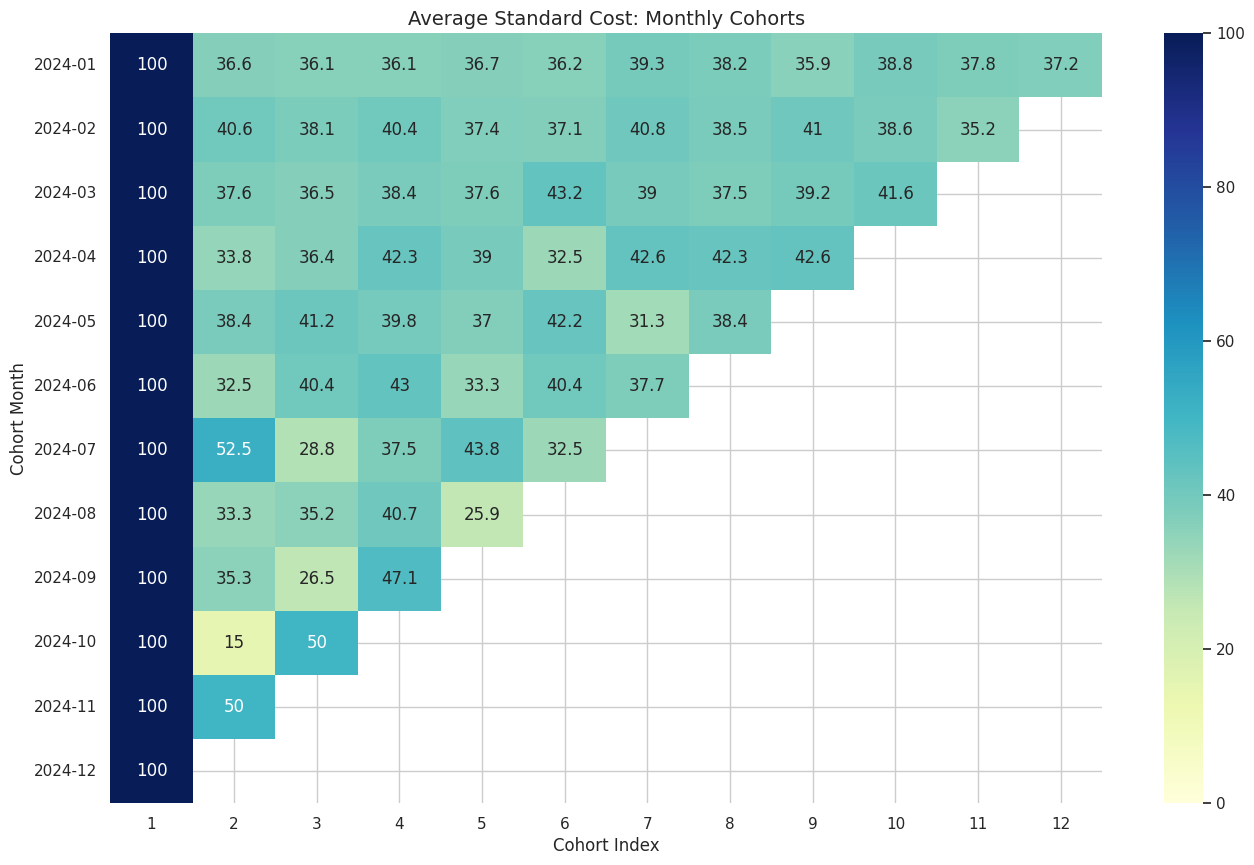

In [183]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation=360)
plt.show()

In [184]:
# 這裡Cohort Analysis就做完了
# 看到留存率的變化現象, 就要找出變化的原因！利用Segmentation Analysis
# 挑變化明顯、差距大的, 找出上升和下降的原因
# Sementation Analysis去filter 上升和下降的原因.

In [185]:
join_df = pd.merge(transaction_df, demographic_df, on='customer_id', how = 'inner').merge(address_df, on='customer_id', how = 'inner')
join_df.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2024-02-25         False   
1               2           3         3120       2024-05-21          True   
2               3          37          402       2024-10-16         False   
3               4          88         3135       2024-08-31         False   
4               5          78          787       2024-01-10          True   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

      wealth_segment  deceased_indicator  owns_car  tenure age_group  \
0      Mass Customer                   N       Yes    10.0      60y+   
1      Mass Customer                   N       Yes    10.0   35y-45y   
2  Affluent Customer                   N        No    22.0   45y-50y   
3      Mass Customer                   N        No    16.0      60y+   
4  Affluent Customer                   N       Yes     2.0   20y-35y   

               address  postcode state    country  property_valuation  
0    984 Hoepker Court      3064   VIC  Australia                   6  
1      4 Shopko Circle      2196   NSW  Australia                   5  
2   586 Miller Parkway      2835   NSW  Australia                   1  
3  1617 Harper Parkway      2096   NSW  Australia                  10  
4   0601 Stephen Place      2292   NSW  Australia                   7  

[5 rows x 34 columns]

# Segmentation Anaylsis

*   Root Cause Analysis of the Retention Rate
*   Analysing the changing reasons



## Case 1: 2024-07 52.5% -> 28.8%

### 提取 Data

In [186]:
# 把join_df裡的customer_id 和 profit用group by 分組 並且 加總每個customer_id總共profit有多少. 最後重新整理index
# df1裡新增一列叫做 rank_M, 按照profit做排名 並 倒敘

df1 = join_df.groupby(['customer_id'])['profit'].sum().reset_index()
df1['rank_M'] = join_df['profit'].rank(ascending = False)

In [187]:
df_52 = join_df[(join_df['CohortMonth'] == '2024-07-01') & (join_df['CohortIndex'] == 2)]

In [188]:
df_28 = join_df[(join_df['CohortMonth'] == '2024-07-01') & (join_df['CohortIndex'] == 3)]

In [189]:
df_52=df_52.copy()
df_28=df_28.copy()

### 單一維度：y = 'profit'

In [190]:
# Q: 單一維度的displot, countplot都用不了

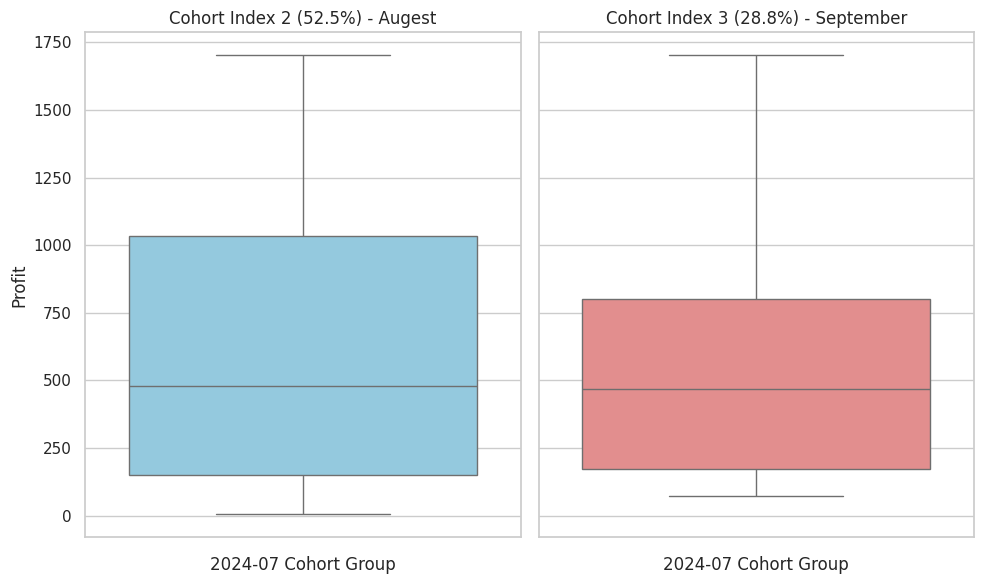

In [191]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

sns.boxplot(data=df_52, y='profit', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - Augest")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.boxplot(data=df_28, y='profit', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - September")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

### 兩個維度：x軸cate, y軸num

*   Strip Plot
*   Box Plot
*   Count Plot (x & hue都是cate)



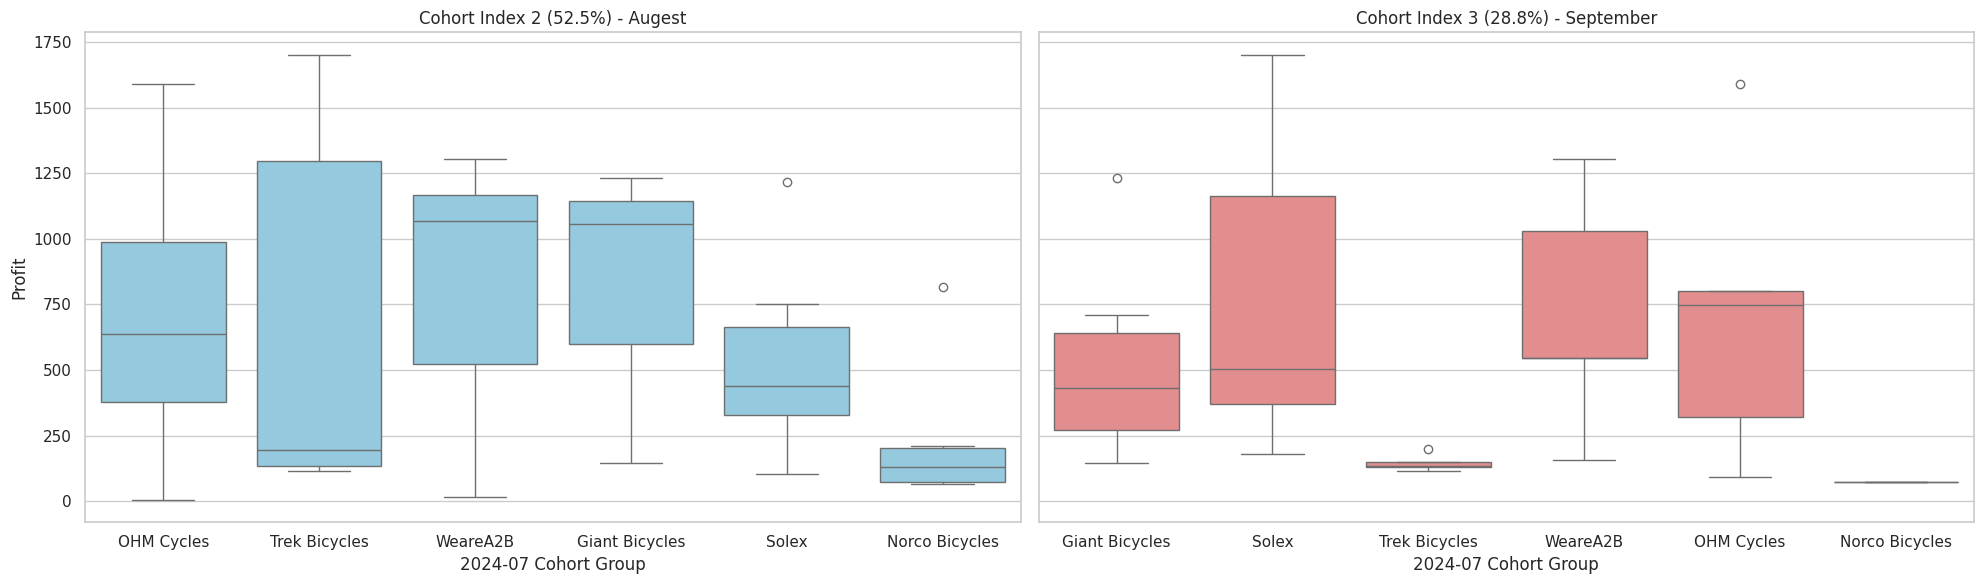

In [192]:
# Box Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)


sns.boxplot(data=df_52, x='brand', y='profit', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - Augest")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")


sns.boxplot(data=df_28, x='brand', y='profit', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - September")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

/tmp/ipython-input-193-916537253.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df_52, x='brand', hue='gender', ax=axes[0], color='skyblue')
/tmp/ipython-input-193-916537253.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.countplot(data=df_28, x='brand', hue='gender', ax=axes[1], color='lightcoral')


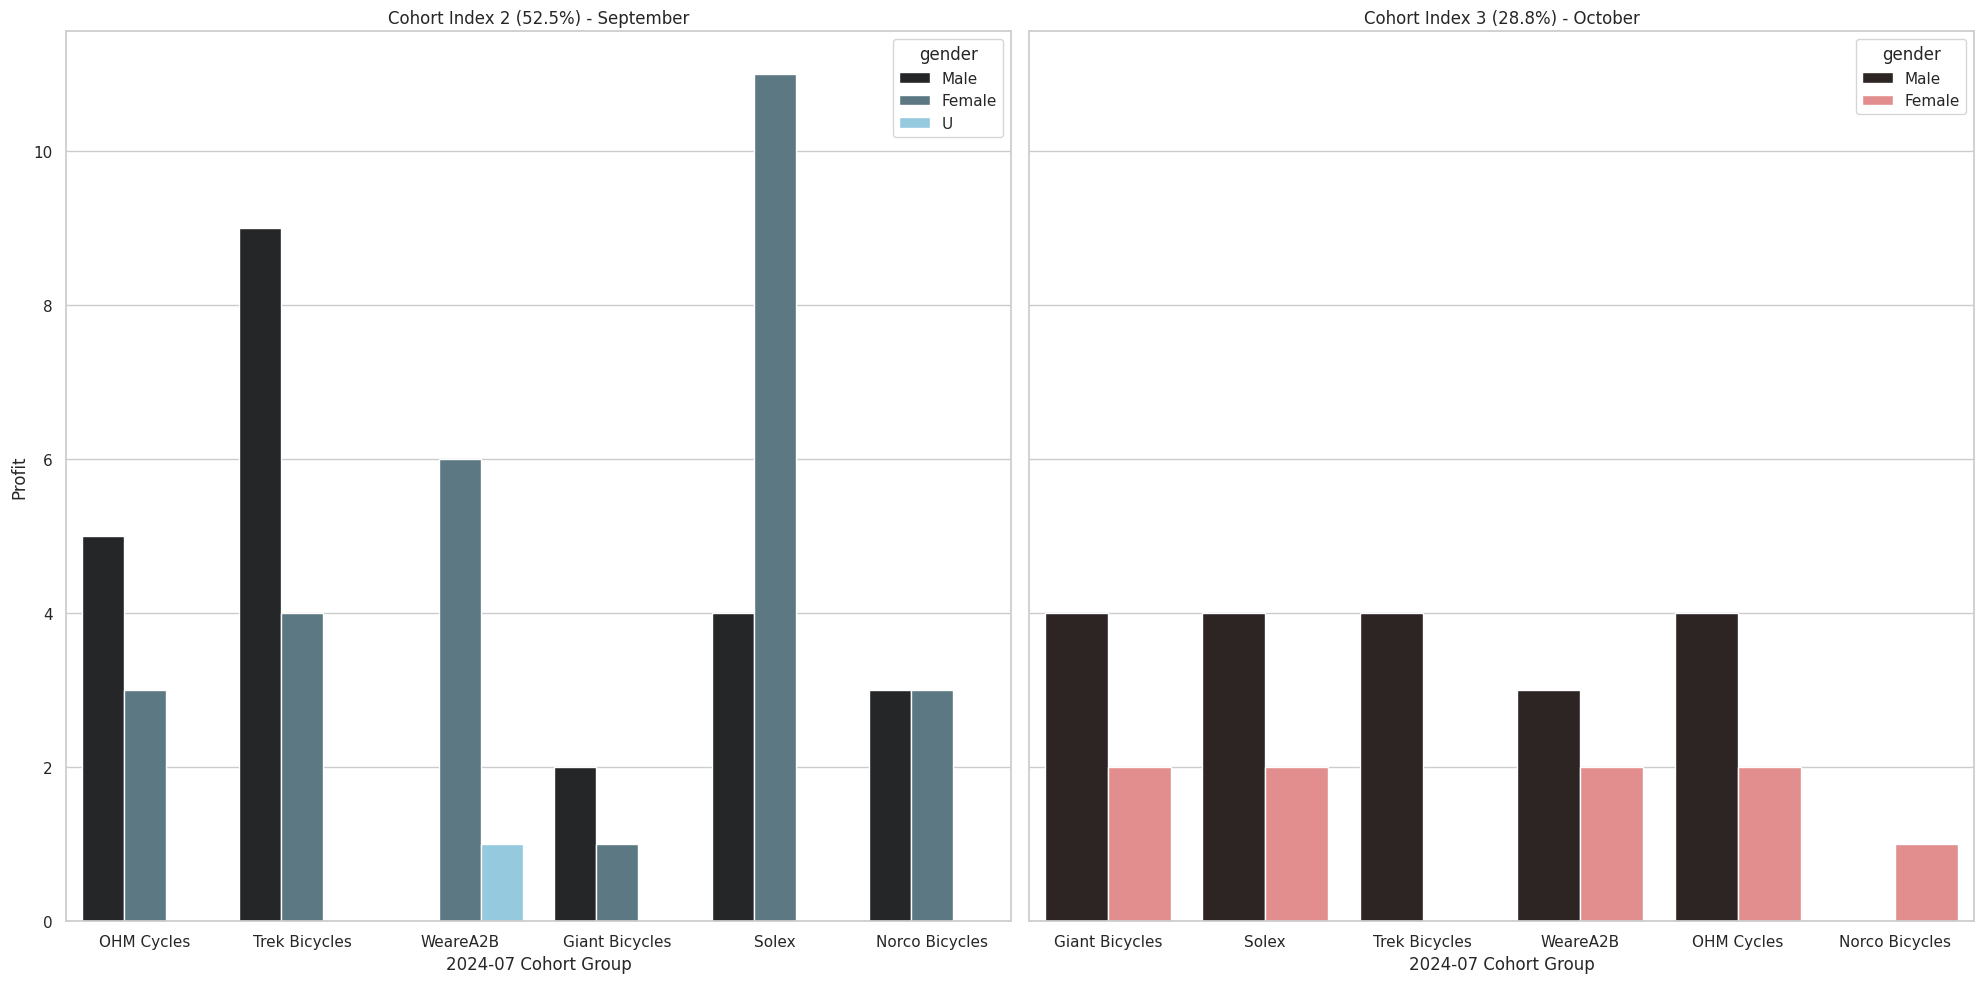

In [193]:
# Count Plot

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)


sns.countplot(data=df_52, x='brand', hue='gender', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")


sns.countplot(data=df_28, x='brand', hue='gender', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

### 三個維度： ：x軸cate, y軸num, hue
*   Strip Plot 散點圖
*   Box Plot 箱型圖(聚合型)
*   Bar Plot 條形圖

/tmp/ipython-input-194-4240644291.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.stripplot(data=df_52, x='brand', y='profit', hue='gender', ax=axes[0], color='skyblue', size = 10 )
/tmp/ipython-input-194-4240644291.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.stripplot(data=df_28, x='brand', y='profit', hue='gender', ax=axes[1], color='lightcoral', size = 10 )


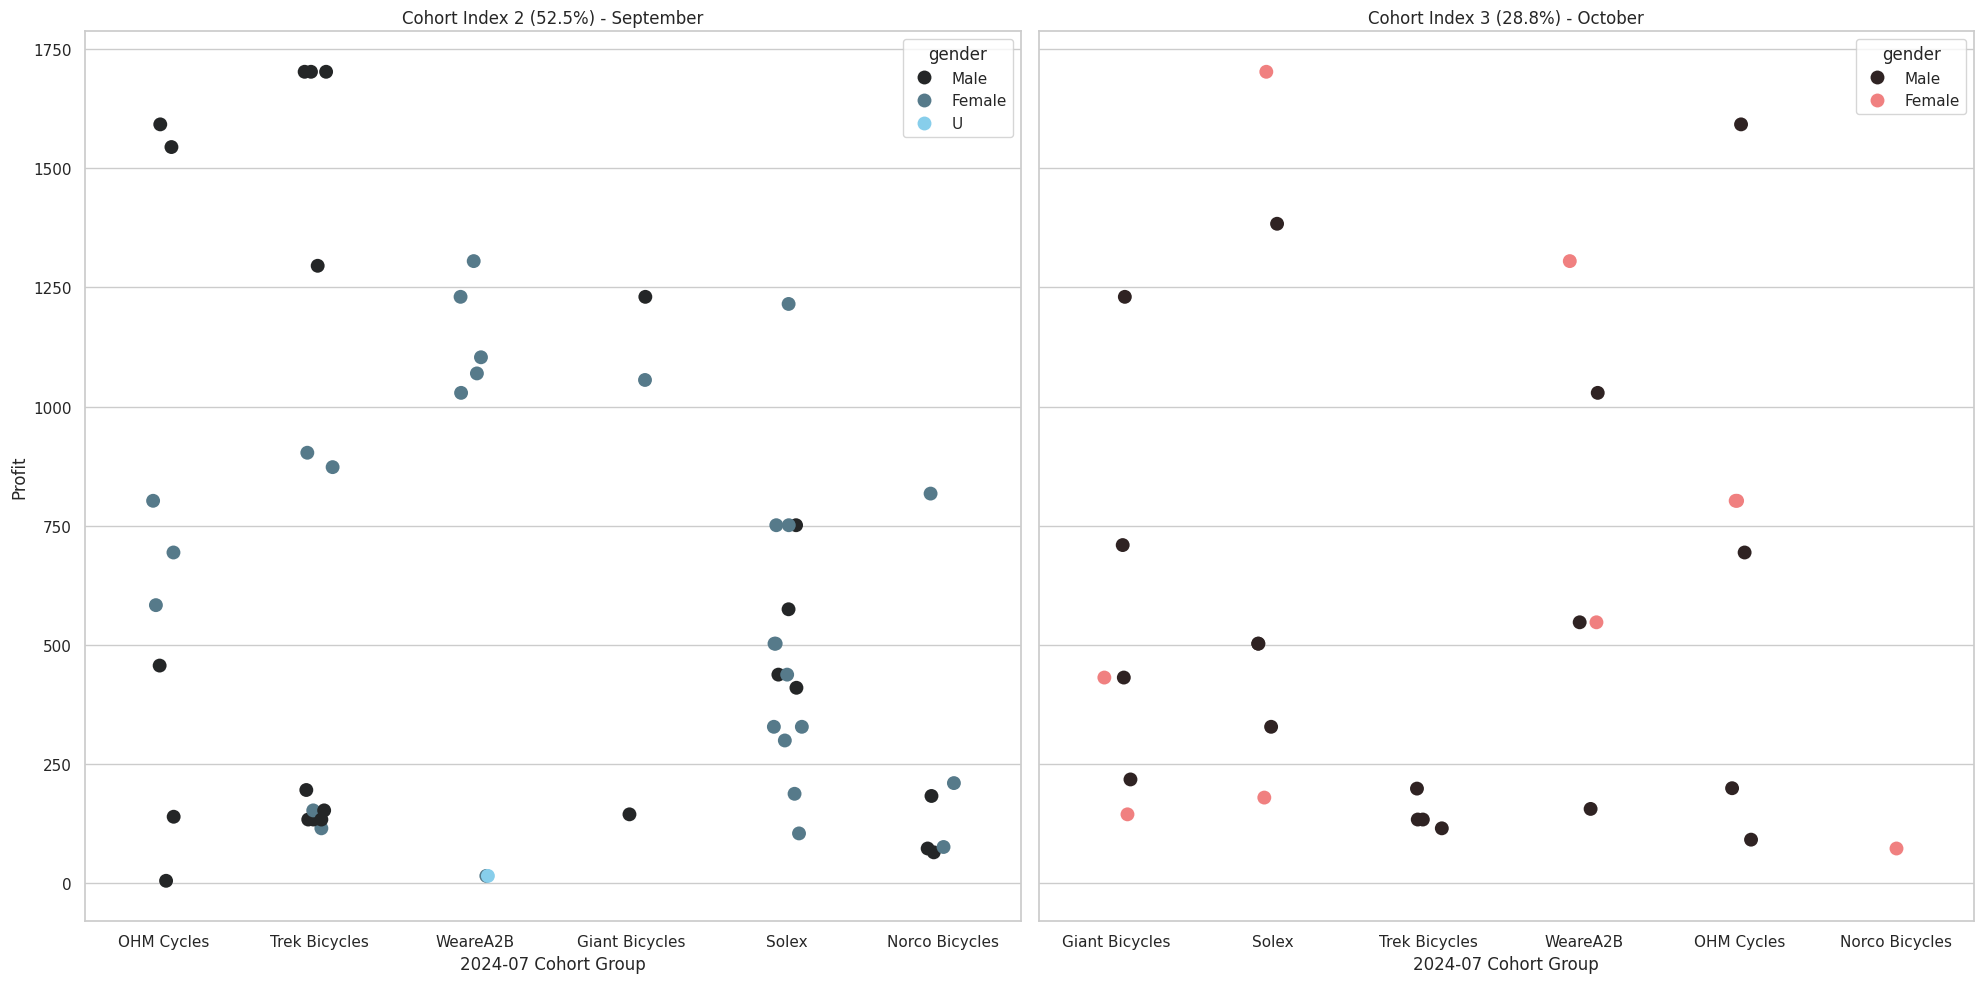

In [194]:
# Strip Plot

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)


sns.stripplot(data=df_52, x='brand', y='profit', hue='gender', ax=axes[0], color='skyblue', size = 10 )
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")


sns.stripplot(data=df_28, x='brand', y='profit', hue='gender', ax=axes[1], color='lightcoral', size = 10 )
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

/tmp/ipython-input-195-2005154074.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.barplot(data=df_52, x='brand', y='profit', hue='gender', ax=axes[0], color='skyblue')
/tmp/ipython-input-195-2005154074.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.barplot(data=df_28, x='brand', y='profit', hue='gender', ax=axes[1], color='lightcoral')


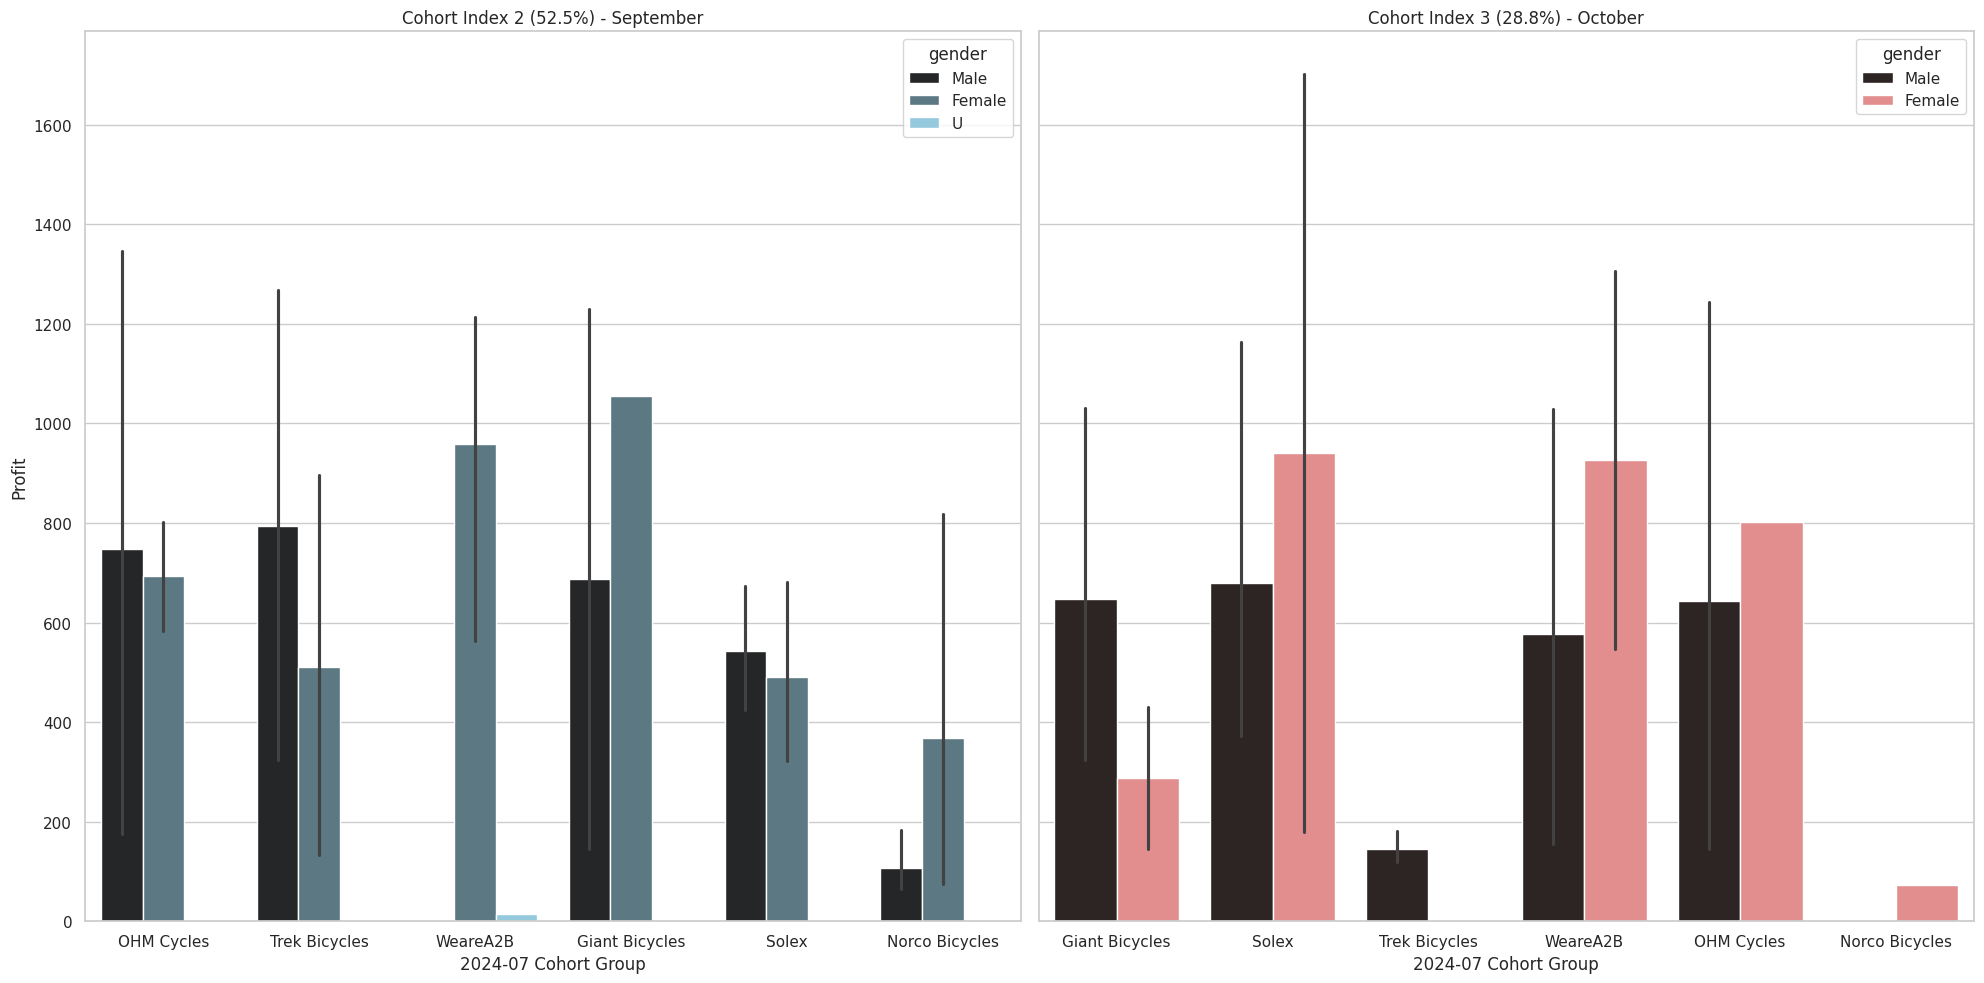

In [195]:
# Bar Plot

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)


sns.barplot(data=df_52, x='brand', y='profit', hue='gender', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")


sns.barplot(data=df_28, x='brand', y='profit', hue='gender', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

### 三個維度：x軸 ＆ y軸 num, hue

*   Joint Plot
*   Point Plot



In [196]:
print(join_df.columns)

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'TransactionMonth', 'CohortMonth',
       'CohortIndex', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'DOB', 'age', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age_group', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')


/tmp/ipython-input-197-2017826801.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=df_52, x='standard_cost', y='profit', ax=axes[0], color='skyblue')
/tmp/ipython-input-197-2017826801.py:11: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=df_28, x='standard_cost', y='profit', ax=axes[1], color='lightcoral')


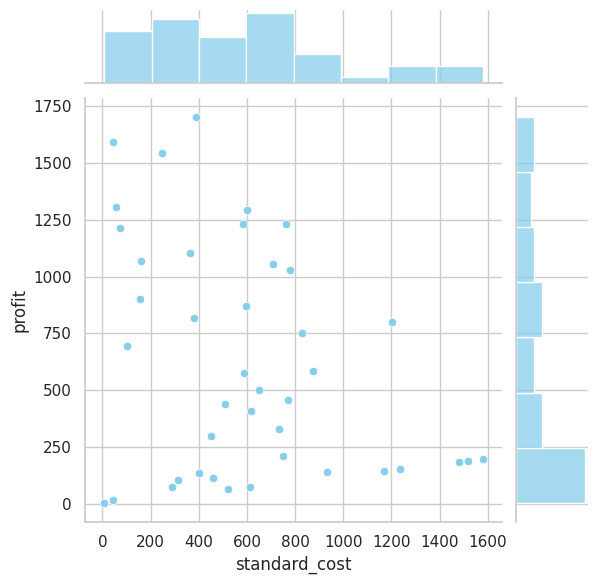

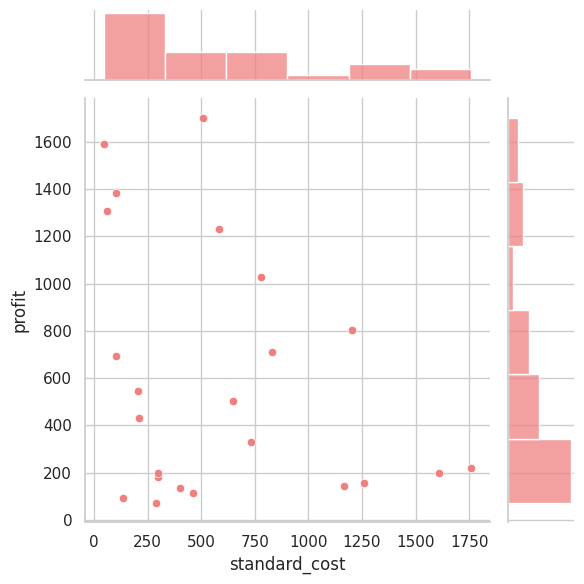

In [197]:
# Joint Plot
# Q: 要怎麼變成一橫行？
# A: Joint plot是Seaborn中自帶圖表佈局的函數. 不接受ax參數u,也無法直接嵌入subplot之中

sns.jointplot(data=df_52, x='standard_cost', y='profit', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")


sns.jointplot(data=df_28, x='standard_cost', y='profit', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")


plt.tight_layout()
plt.show()

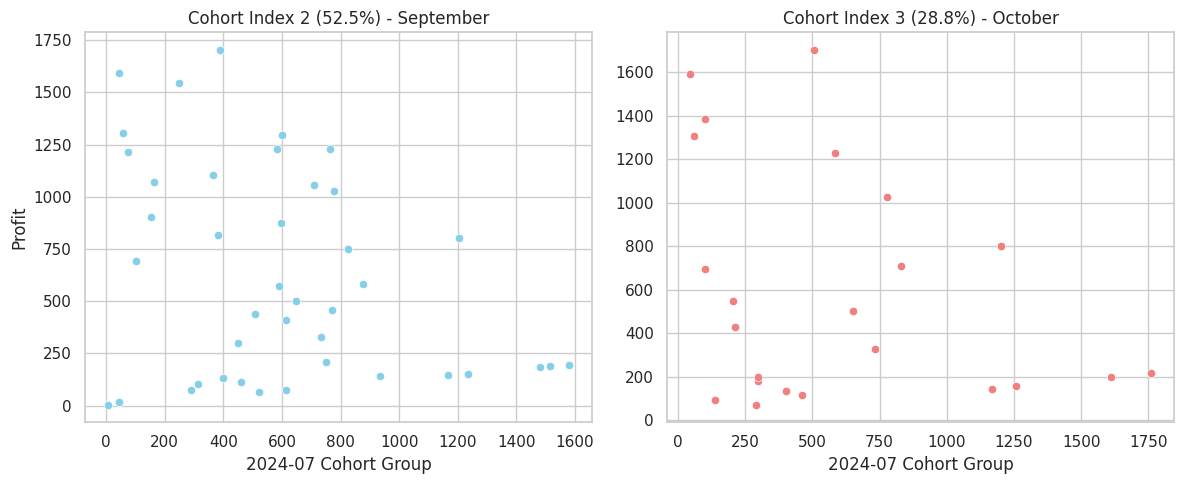

In [198]:
# 相較之下用Scatter能呈現成本和獲利的關係

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 一橫行兩圖

# 左邊圖
sns.scatterplot(data=df_52, x='standard_cost', y='profit', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")

# 右邊圖
sns.scatterplot(data=df_28, x='standard_cost', y='profit', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")  # 不顯示 y label
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

### 多個維度： Cat Plot

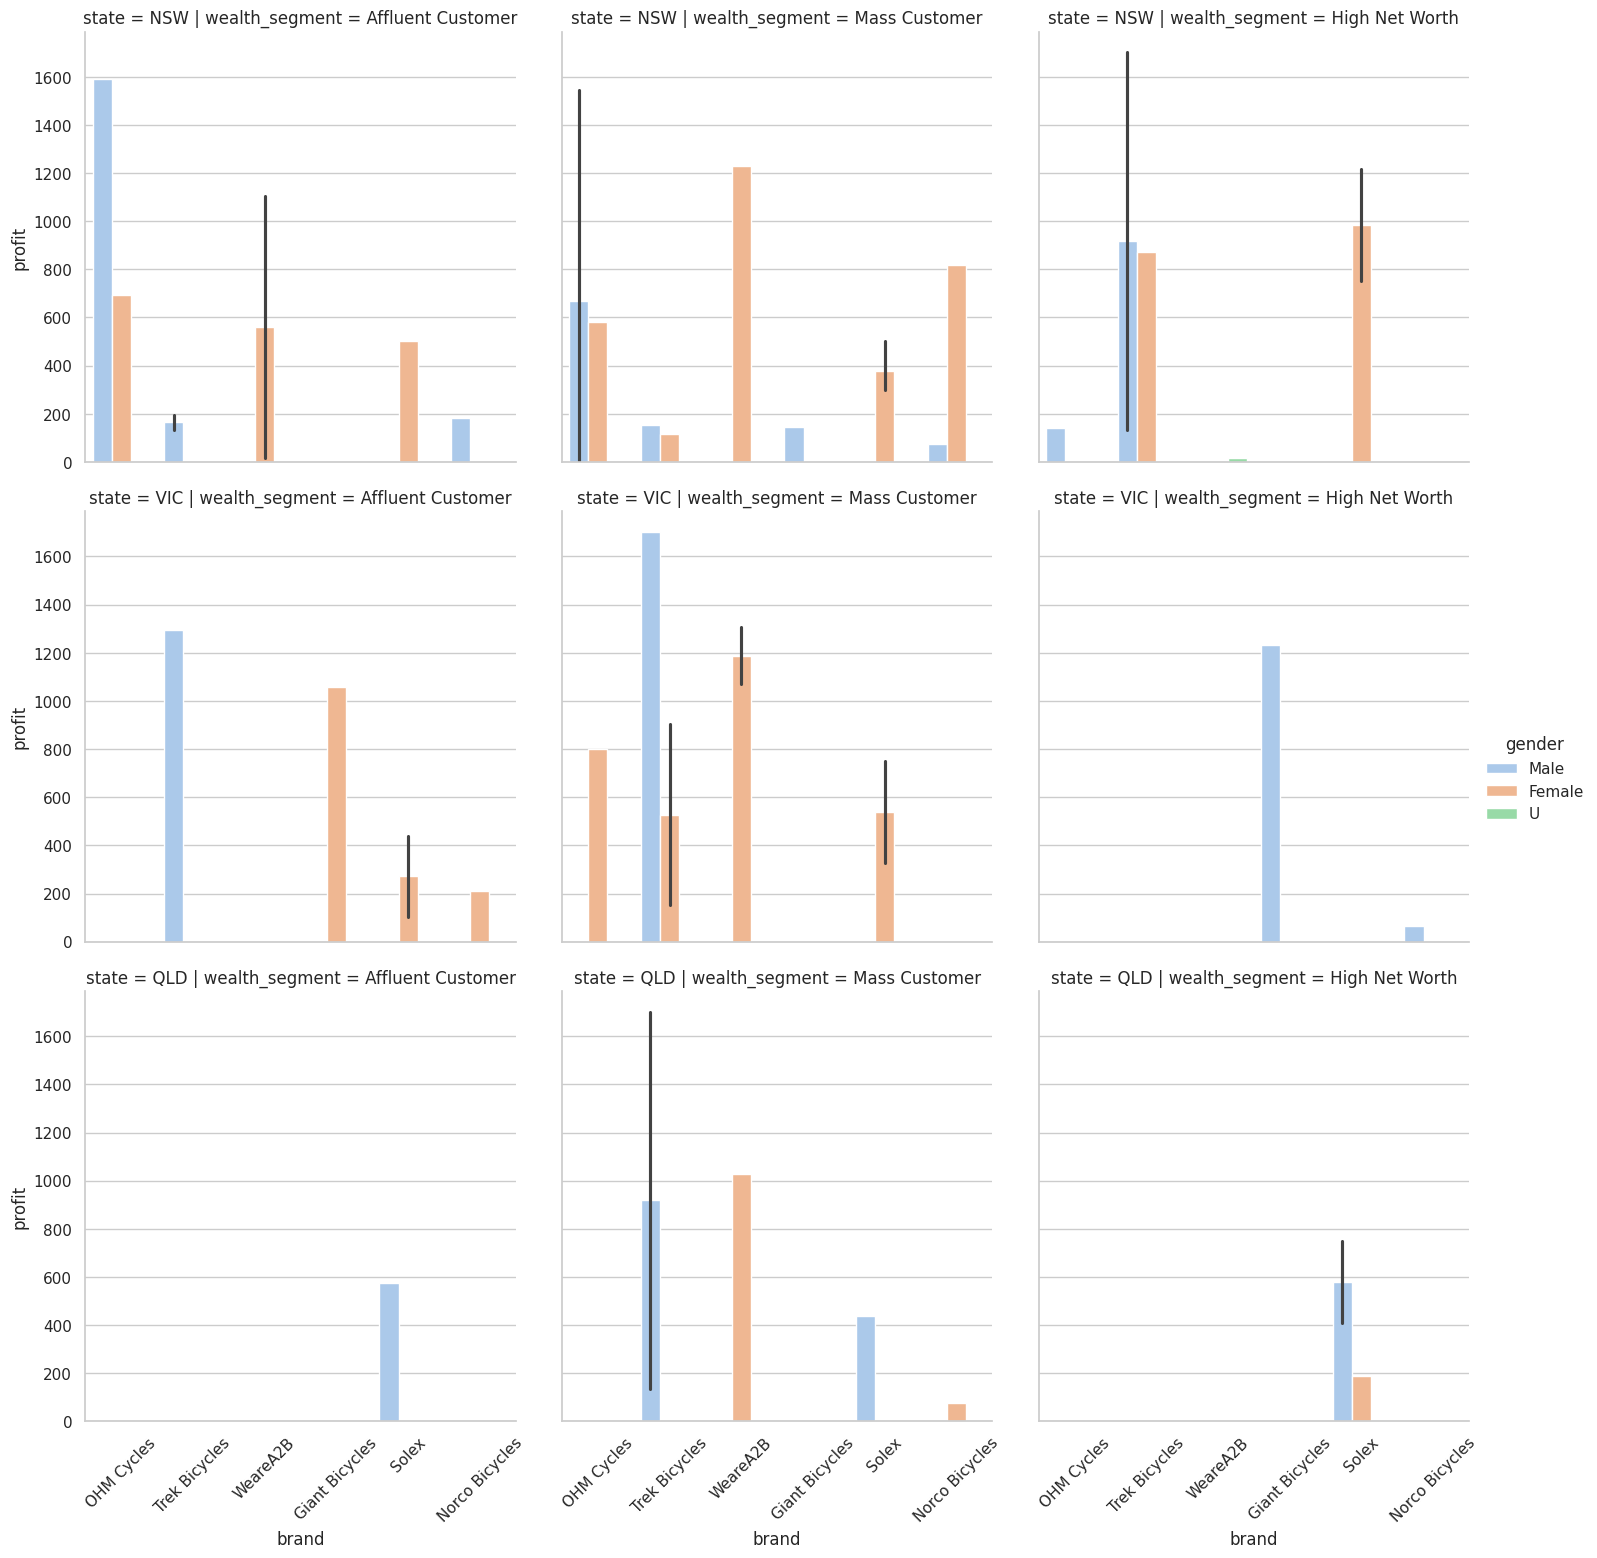

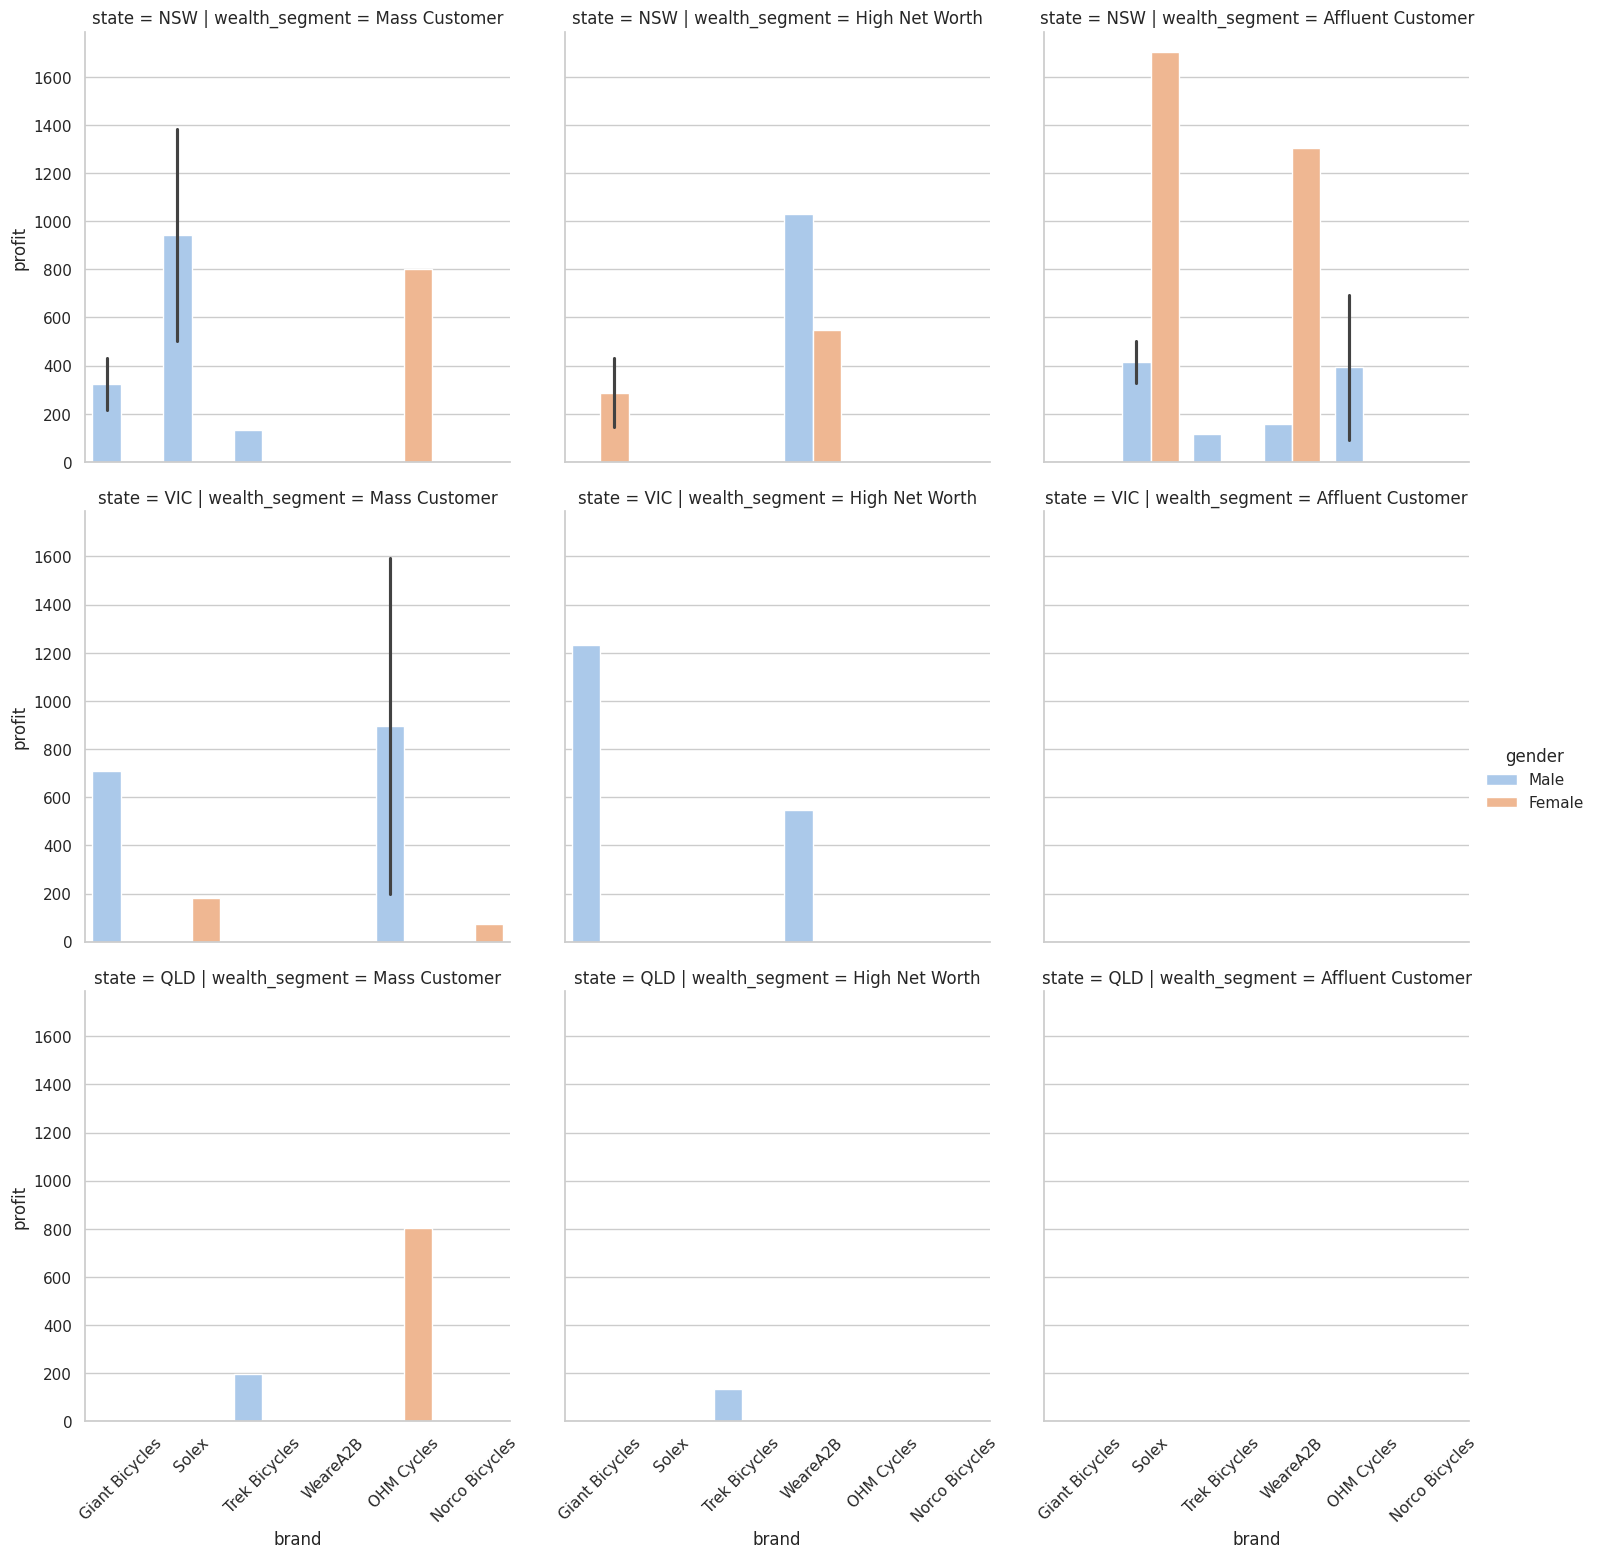

In [199]:

sns.set(style='whitegrid', palette='pastel')

plot_1=sns.catplot(x='brand', y='profit', data=df_52, hue='gender', col='wealth_segment', row='state',kind='bar')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")
for ax in plot_1.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()



sns.set(style='whitegrid', palette='pastel')

plot_2=sns.catplot(x='brand', y='profit', data=df_28, hue='gender', col='wealth_segment', row='state',kind='bar')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")
for ax in plot_2.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

### 多個Num V: Heat Plot

In [200]:
df_52[["tenure","standard_cost","profit"]].corr()
df_28[["tenure","standard_cost","profit"]].corr()

tenure  standard_cost    profit
tenure         1.000000      -0.466200 -0.099093
standard_cost -0.466200       1.000000 -0.240238
profit        -0.099093      -0.240238  1.000000

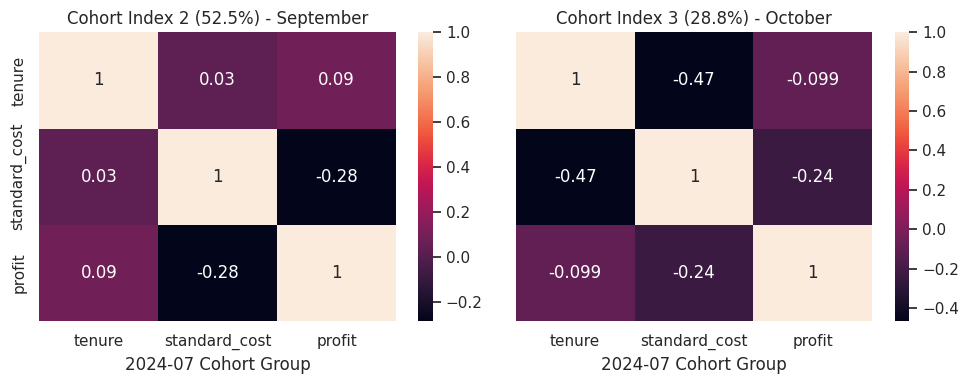

In [201]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)


sns.heatmap(df_52[["tenure","standard_cost","profit"]].corr(), annot=True, ax=axes[0])
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_xlabel("2024-07 Cohort Group")


sns.heatmap(df_28[["tenure","standard_cost","profit"]].corr(), annot=True, ax=axes[1])
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

## Case 2: 2024-10 15% -> 50%

### 提取 Data

In [202]:
df1 = join_df.groupby(['customer_id'])['profit'].sum().reset_index()
df1['rank_M'] = join_df['profit'].rank(ascending = False)

In [203]:
df_15 = join_df[(join_df['CohortMonth'] == '2024-10-01') & (join_df['CohortIndex'] == 2)]
df_50 = join_df[(join_df['CohortMonth'] == '2024-10-01') & (join_df['CohortIndex'] == 3)]

### 單一維度：y = 'profit'

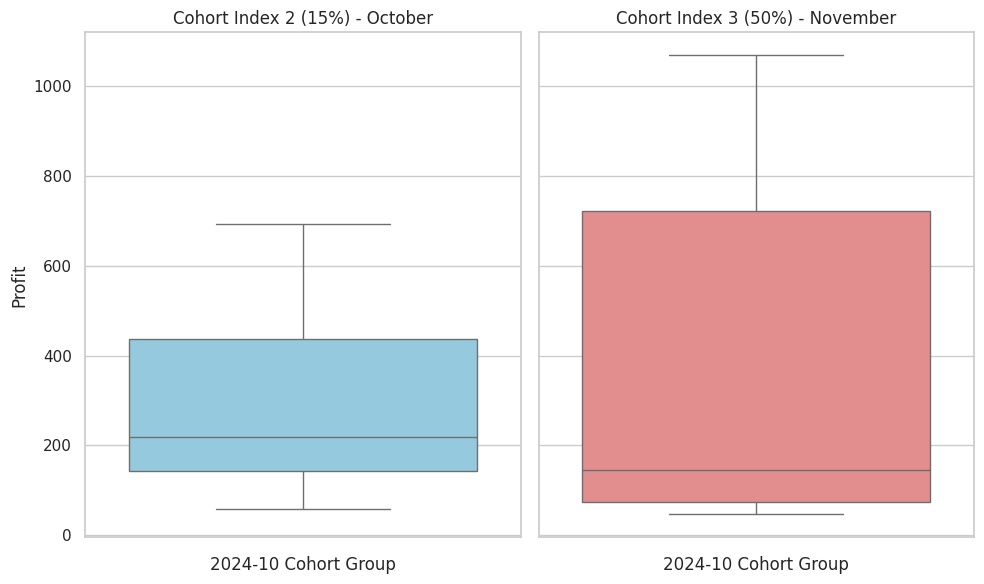

In [204]:
# Box Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

sns.boxplot(data=df_15, y='profit', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (15%) - October")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-10 Cohort Group")

sns.boxplot(data=df_50, y='profit', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (50%) - November")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-10 Cohort Group")

plt.tight_layout()
plt.show()

### 兩個維度：x軸cate, y軸num

*   Strip Plot
*   Box Plot
*   Count Plot (x & hue都是cate)

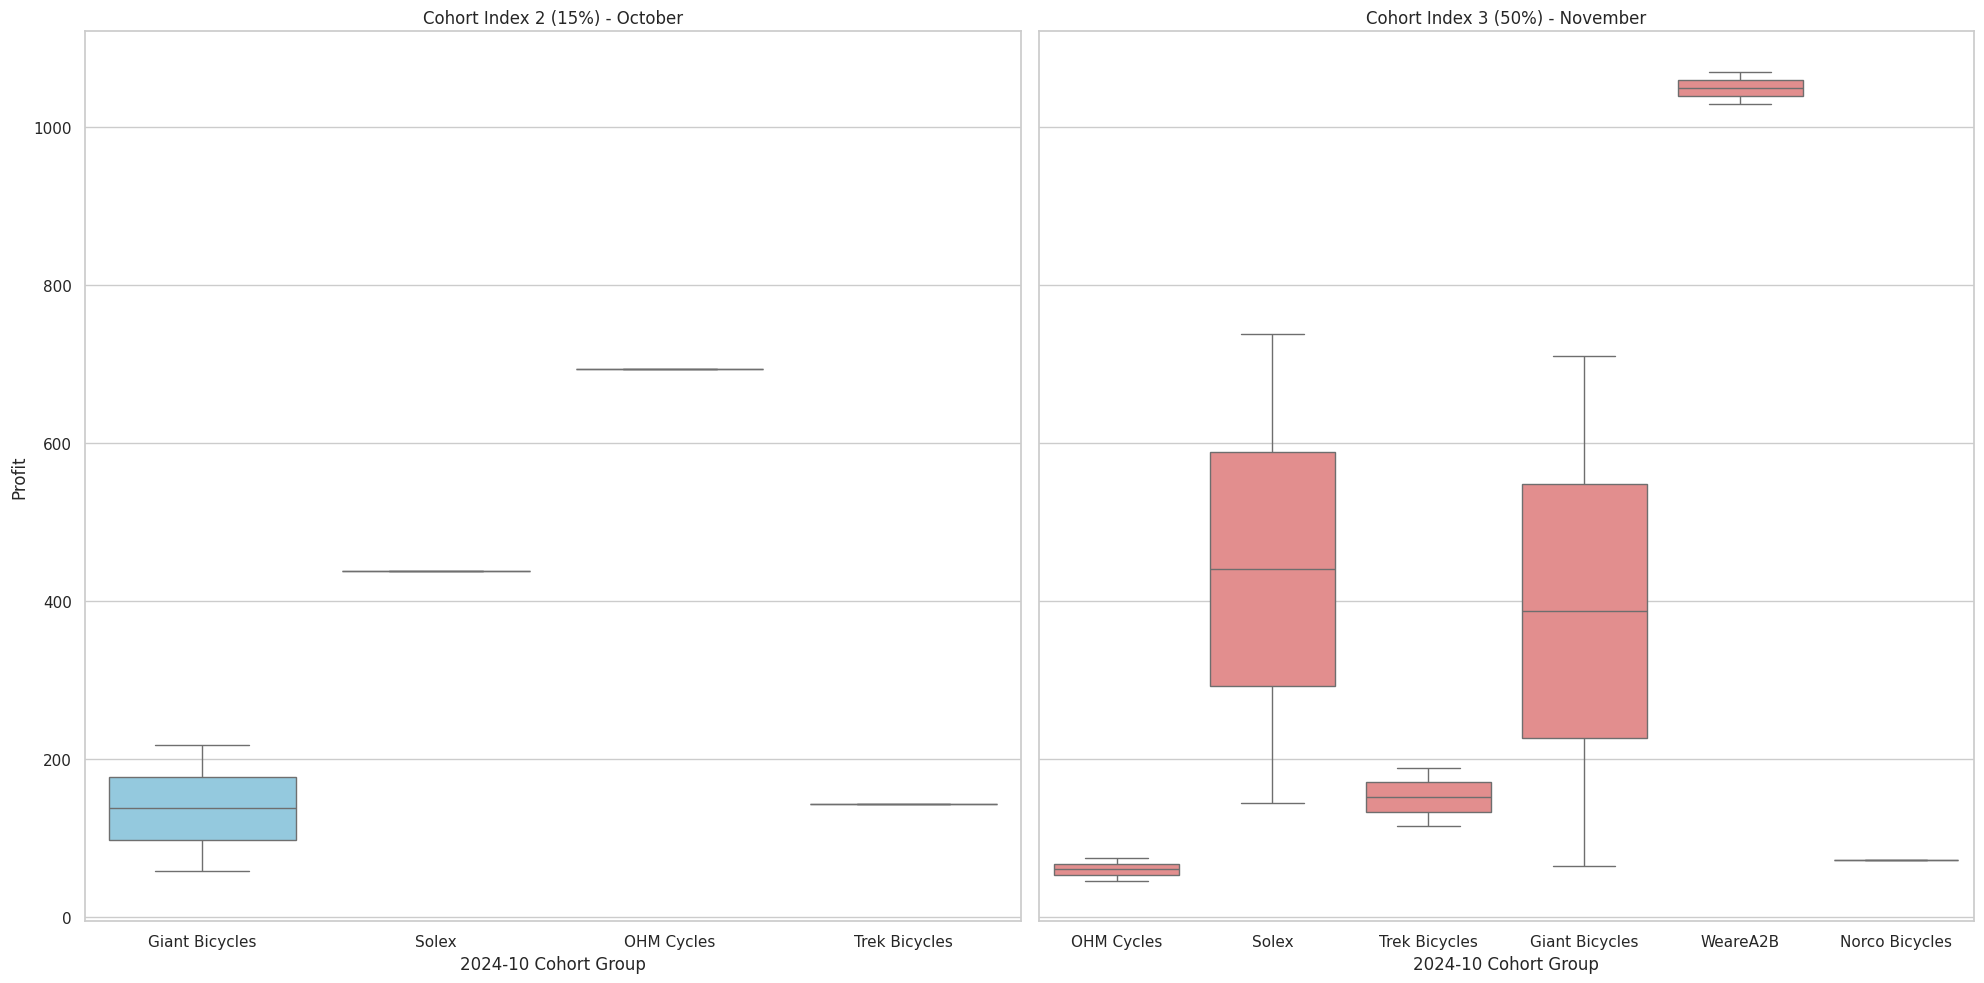

In [205]:
# Box Plot

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.boxplot(data=df_15, x='brand', y='profit', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (15%) - October")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-10 Cohort Group")

sns.boxplot(data=df_50, x='brand', y='profit', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (50%) - November")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-10 Cohort Group")

plt.tight_layout()
plt.show()

/tmp/ipython-input-206-406582823.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df_15, x='brand', hue='gender', ax=axes[0], color='skyblue')
/tmp/ipython-input-206-406582823.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.countplot(data=df_50, x='brand', hue='gender', ax=axes[1], color='lightcoral')


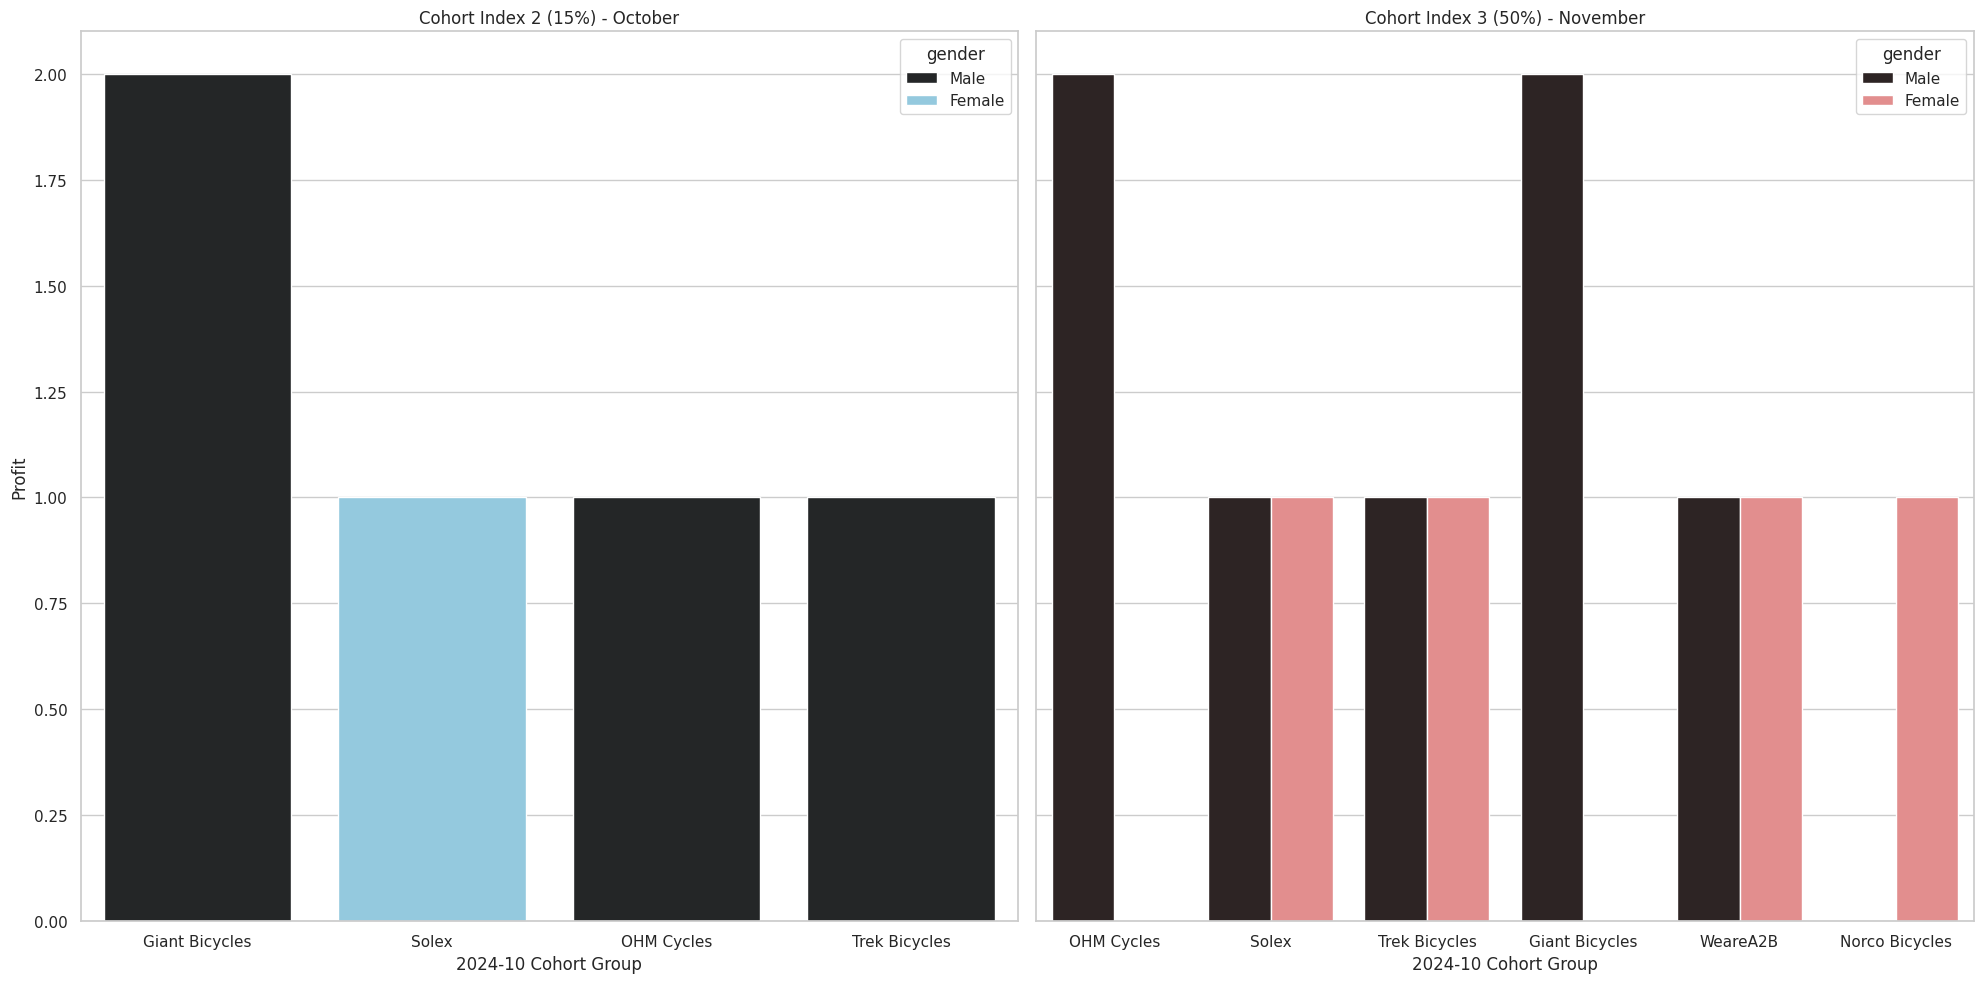

In [206]:
# Count Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.countplot(data=df_15, x='brand', hue='gender', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (15%) - October")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-10 Cohort Group")

sns.countplot(data=df_50, x='brand', hue='gender', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (50%) - November")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-10 Cohort Group")

plt.tight_layout()
plt.show()

### 三個維度： ：x軸cate, y軸num, hue
*   Strip Plot 散點圖
*   Box Plot 箱型圖(聚合型)
*   Bar Plot 條形圖

/tmp/ipython-input-207-2815813556.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.barplot(data=df_15, x='brand', y='profit', hue='gender', ax=axes[0], color='skyblue')
/tmp/ipython-input-207-2815813556.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.barplot(data=df_50, x='brand', y='profit', hue='gender', ax=axes[1], color='lightcoral')


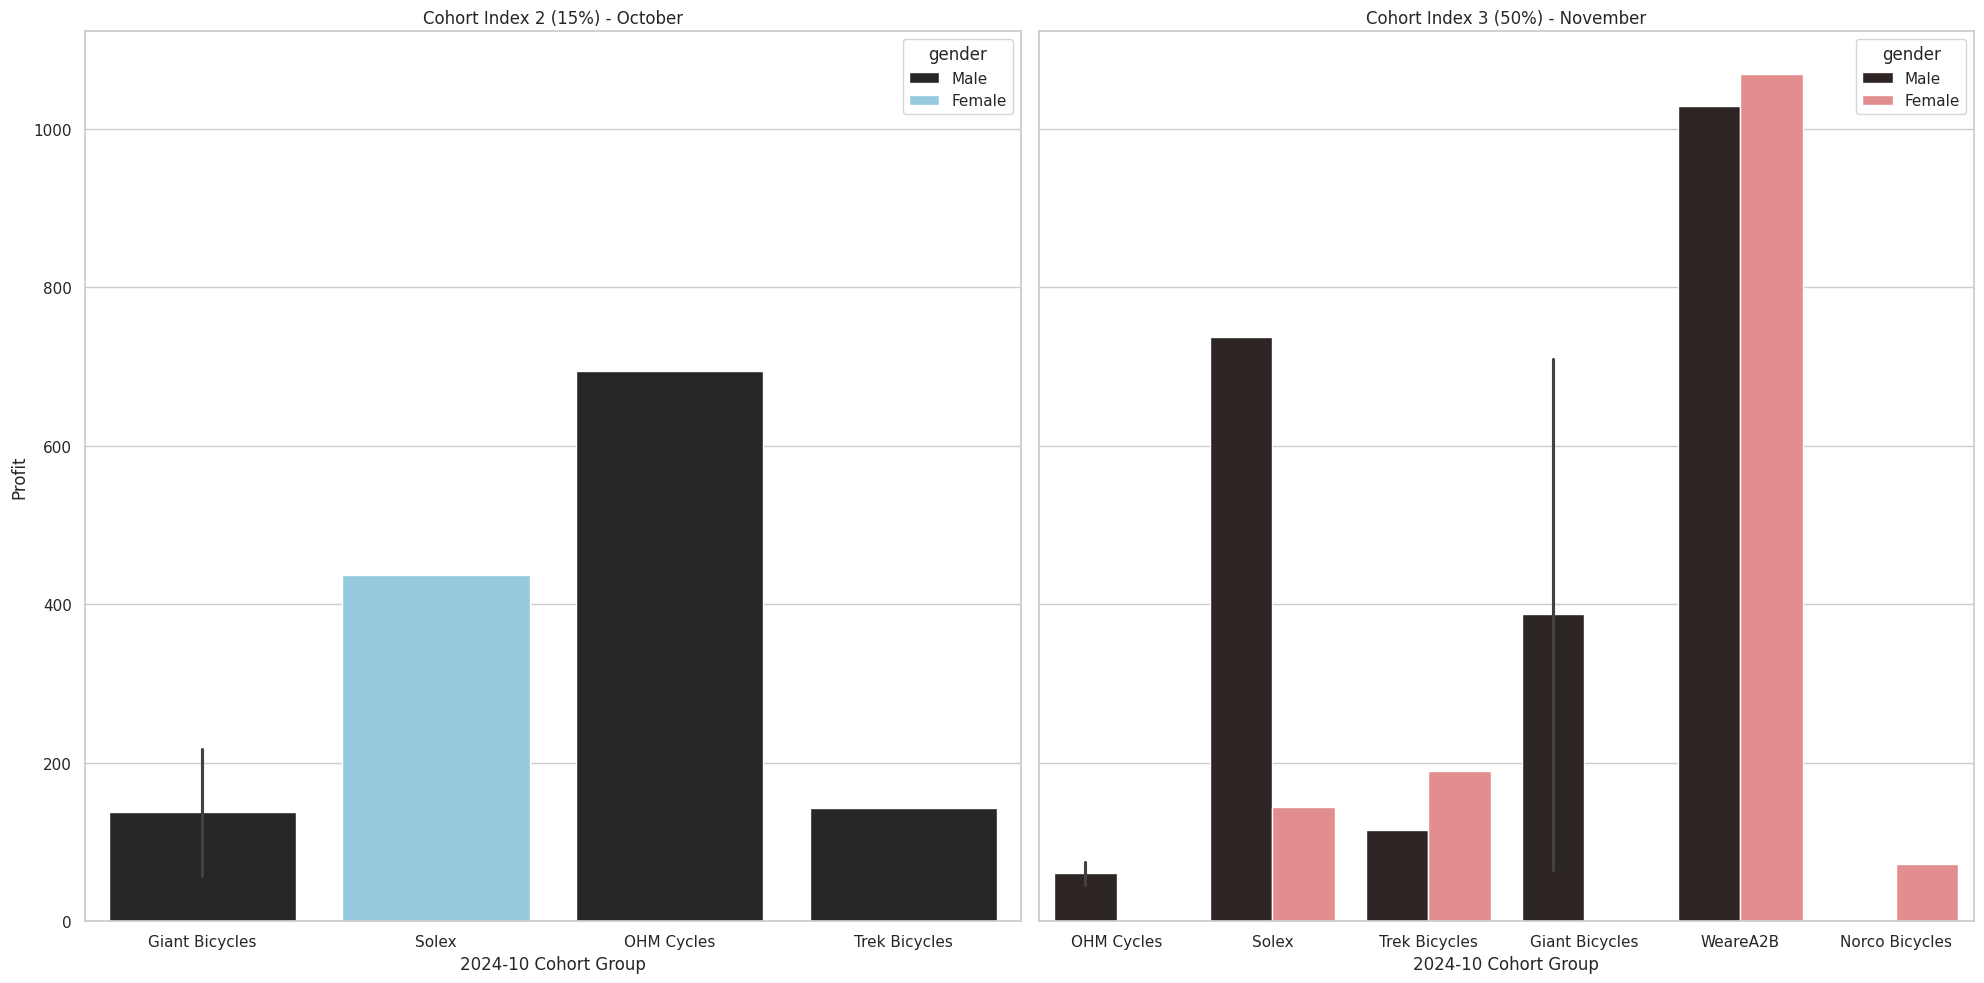

In [207]:
# Bar Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.barplot(data=df_15, x='brand', y='profit', hue='gender', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (15%) - October")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-10 Cohort Group")

sns.barplot(data=df_50, x='brand', y='profit', hue='gender', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (50%) - November")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-10 Cohort Group")

plt.tight_layout()
plt.show()

### 三個維度：x軸 ＆ y軸 num, hue

*   Joint Plot
*   Point Plot

In [208]:
# 沒有意義

### 多個維度： Cat Plot

In [209]:
# 沒有特別顯示有效的差異

### 多個Num V: Heat Plot

In [210]:
df_15[["tenure","standard_cost","profit"]].corr()
df_50[["tenure","standard_cost","profit"]].corr()

tenure  standard_cost    profit
tenure         1.000000       0.167378  0.042108
standard_cost  0.167378       1.000000  0.127335
profit         0.042108       0.127335  1.000000

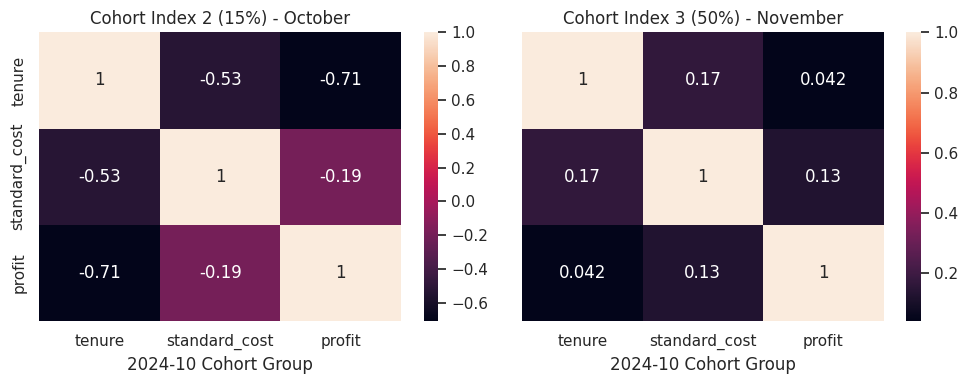

In [211]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

sns.heatmap(df_15[["tenure","standard_cost","profit"]].corr(), annot=True, ax=axes[0])
axes[0].set_title("Cohort Index 2 (15%) - October")
axes[0].set_xlabel("2024-10 Cohort Group")

sns.heatmap(df_50[["tenure","standard_cost","profit"]].corr(), annot=True, ax=axes[1])
axes[1].set_title("Cohort Index 3 (50%) - November")
axes[1].set_xlabel("2024-10 Cohort Group")

plt.tight_layout()
plt.show()

# RFM Model 顧客價值分析模型

*   Recency : 最近一次購買距今多久？
*   Frequency : 一段時間內的購買次數
*   Monetary : 購買總金額



## Recency Rank

In [212]:
# 取得每個客戶最近一次的交易日期
recency_df = transaction_df.groupby('customer_id')['transaction_date'].max().reset_index()

In [213]:
# 依照最近期的時間由最近到最久遠排序
recency_df = recency_df.sort_values(by='transaction_date', ascending=False).reset_index(drop=True)

In [214]:
# 新增一列叫 frecency_rank 加入排名的column
recency_df['recency_rank'] = recency_df['transaction_date'].rank(method='first', ascending=False)
recency_df.head()

customer_id transaction_date  recency_rank
0          195       2024-12-30           1.0
1          933       2024-12-30           2.0
2         2659       2024-12-30           3.0
3         1787       2024-12-30           4.0
4         3169       2024-12-30           5.0

## Frequncy Rank

In [215]:
# 計算每一位客戶在今年有多少筆交易
frequency_df = transaction_df.groupby('customer_id')['transaction_id'].nunique().reset_index()
frequency_df.columns = ['customer_id', 'frequency']
frequency_df

customer_id  frequency
0               1         11
1               2          3
2               3          8
3               4          2
4               5          6
...           ...        ...
3489         3497          3
3490         3498          6
3491         3499          7
3492         3500          6
3493         5034          3

[3494 rows x 2 columns]

In [216]:
# 根據頻率次數由高到低排序
frequency_df = frequency_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
frequency_df

customer_id  frequency
0            2476         14
1            2183         14
2            1068         14
3            1913         13
4            3048         13
...           ...        ...
3489         2532          1
3490         2749          1
3491          161          1
3492          191          1
3493         2807          1

[3494 rows x 2 columns]

In [217]:
# 新增一列叫 frequency_rank 加入排名的column
frequency_df['frequency_rank'] = frequency_df['frequency'].rank(method='first', ascending=False)
frequency_df

customer_id  frequency  frequency_rank
0            2476         14             1.0
1            2183         14             2.0
2            1068         14             3.0
3            1913         13             4.0
4            3048         13             5.0
...           ...        ...             ...
3489         2532          1          3490.0
3490         2749          1          3491.0
3491          161          1          3492.0
3492          191          1          3493.0
3493         2807          1          3494.0

[3494 rows x 3 columns]

## Monetary Rank

In [218]:
# 計算每位客戶消費而賺取的盈利總數
monetary_df = transaction_df.groupby('customer_id')['profit'].sum().reset_index()
monetary_df

customer_id       profit
0               1  3018.090000
1               2  2226.260000
2               3  3362.810000
3               4   220.570000
4               5  2394.940000
...           ...          ...
3489         3497  1648.320000
3490         3498  3147.330000
3491         3499  4955.250000
3492         3500  1785.860000
3493         5034   269.484972

[3494 rows x 2 columns]

In [219]:
# 依照盈利的金格由最高到最低排序
monetary_df = monetary_df.sort_values(by='profit', ascending=False).reset_index(drop=True)
monetary_df

customer_id    profit
0             941  11668.95
1            2637  11222.65
2            1503  11098.88
3            1460  10787.60
4            1558  10640.30
...           ...       ...
3489         3189     50.18
3490         3272     41.13
3491         2274     35.74
3492         2532     17.87
3493         3292     15.08

[3494 rows x 2 columns]

In [220]:
# 新增一列排名的column
monetary_df['monetary_rank'] = monetary_df['profit'].rank(method='first', ascending=False)
monetary_df

customer_id    profit  monetary_rank
0             941  11668.95            1.0
1            2637  11222.65            2.0
2            1503  11098.88            3.0
3            1460  10787.60            4.0
4            1558  10640.30            5.0
...           ...       ...            ...
3489         3189     50.18         3490.0
3490         3272     41.13         3491.0
3491         2274     35.74         3492.0
3492         2532     17.87         3493.0
3493         3292     15.08         3494.0

[3494 rows x 3 columns]

##RFM Score Rank

In [221]:
# 提取每個的排名columns

RFM_df = recency_df[['customer_id', 'recency_rank']].merge(
    frequency_df[['customer_id', 'frequency_rank']], on='customer_id').merge(
    monetary_df[['customer_id', 'monetary_rank']], on='customer_id')
RFM_df

customer_id  recency_rank  frequency_rank  monetary_rank
0             195           1.0          1182.0           16.0
1             933           2.0          1955.0         1848.0
2            2659           3.0            45.0           50.0
3            1787           4.0          1748.0          625.0
4            3169           5.0          1031.0          783.0
...           ...           ...             ...            ...
3489         2525        3490.0          3484.0         3447.0
3490         1846        3491.0          3469.0         3406.0
3491         2423        3492.0          3481.0         3489.0
3492         2394        3493.0          3480.0         3293.0
3493         2328        3494.0          3478.0         3407.0

[3494 rows x 4 columns]

In [222]:
RFM_df['RFM_score'] = (RFM_df['recency_rank'] + RFM_df['frequency_rank'] + RFM_df['monetary_rank'])/3
RFM_df

customer_id  recency_rank  frequency_rank  monetary_rank    RFM_score
0             195           1.0          1182.0           16.0   399.666667
1             933           2.0          1955.0         1848.0  1268.333333
2            2659           3.0            45.0           50.0    32.666667
3            1787           4.0          1748.0          625.0   792.333333
4            3169           5.0          1031.0          783.0   606.333333
...           ...           ...             ...            ...          ...
3489         2525        3490.0          3484.0         3447.0  3473.666667
3490         1846        3491.0          3469.0         3406.0  3455.333333
3491         2423        3492.0          3481.0         3489.0  3487.333333
3492         2394        3493.0          3480.0         3293.0  3422.000000
3493         2328        3494.0          3478.0         3407.0  3459.666667

[3494 rows x 5 columns]

In [223]:
# 定義條件

conditions = [
    (RFM_df['RFM_score'] >= 1) & (RFM_df['RFM_score'] <= 1000),
    (RFM_df['RFM_score'] > 1000) & (RFM_df['RFM_score'] <= 3000),
    (RFM_df['RFM_score'] > 3000) & (RFM_df['RFM_score'] <= 4000)
]

# 對應的分類
choices = ['High Value', 'Medium Value', 'Low Value']

# 新增一欄 customer_segment
RFM_df['RFM_label'] = np.select(conditions, choices, default='Unknown')
RFM_df

customer_id  recency_rank  frequency_rank  monetary_rank    RFM_score  \
0             195           1.0          1182.0           16.0   399.666667   
1             933           2.0          1955.0         1848.0  1268.333333   
2            2659           3.0            45.0           50.0    32.666667   
3            1787           4.0          1748.0          625.0   792.333333   
4            3169           5.0          1031.0          783.0   606.333333   
...           ...           ...             ...            ...          ...   
3489         2525        3490.0          3484.0         3447.0  3473.666667   
3490         1846        3491.0          3469.0         3406.0  3455.333333   
3491         2423        3492.0          3481.0         3489.0  3487.333333   
3492         2394        3493.0          3480.0         3293.0  3422.000000   
3493         2328        3494.0          3478.0         3407.0  3459.666667   

         RFM_label  
0       High Value  
1     Medium Value  
2       High Value  
3       High Value  
4       High Value  
...            ...  
3489     Low Value  
3490     Low Value  
3491     Low Value  
3492     Low Value  
3493     Low Value  

[3494 rows x 6 columns]

# RFM Model EDA

### 提取 Data

In [224]:
join_RFM_df = pd.merge(RFM_df, join_df, on='customer_id', how = 'inner')
join_RFM_df.head()

customer_id  recency_rank  frequency_rank  monetary_rank   RFM_score  \
0          195           1.0          1182.0           16.0  399.666667   
1          195           1.0          1182.0           16.0  399.666667   
2          195           1.0          1182.0           16.0  399.666667   
3          195           1.0          1182.0           16.0  399.666667   
4          195           1.0          1182.0           16.0  399.666667   

    RFM_label  transaction_id  product_id transaction_date  online_order  ...  \
0  High Value            8545           3       2024-05-24         False  ...   
1  High Value           10620          43       2024-09-12          True  ...   
2  High Value           12742          57       2024-11-18          True  ...   
3  High Value           13117           3       2024-08-03         False  ...   
4  High Value           13173           3       2024-03-29          True  ...   

  wealth_segment deceased_indicator owns_car tenure age_group  \
0  Mass Customer                  N       No    6.0      60y+   
1  Mass Customer                  N       No    6.0      60y+   
2  Mass Customer                  N       No    6.0      60y+   
3  Mass Customer                  N       No    6.0      60y+   
4  Mass Customer                  N       No    6.0      60y+   

             address  postcode  state    country property_valuation  
0  43 Upham Crossing      3143    VIC  Australia                  9  
1  43 Upham Crossing      3143    VIC  Australia                  9  
2  43 Upham Crossing      3143    VIC  Australia                  9  
3  43 Upham Crossing      3143    VIC  Australia                  9  
4  43 Upham Crossing      3143    VIC  Australia                  9  

[5 rows x 39 columns]

In [225]:
join_RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   recency_rank                         19968 non-null  float64       
 2   frequency_rank                       19968 non-null  float64       
 3   monetary_rank                        19968 non-null  float64       
 4   RFM_score                            19968 non-null  float64       
 5   RFM_label                            19968 non-null  object        
 6   transaction_id                       19968 non-null  int64         
 7   product_id                           19968 non-null  int64         
 8   transaction_date                     19968 non-null  datetime64[ns]
 9   online_order                         19968 non-null  bool          
 10  order_stat

### 單一維度

/tmp/ipython-input-226-1829511932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(join_RFM_df['RFM_score'], bins=30, rug=True)


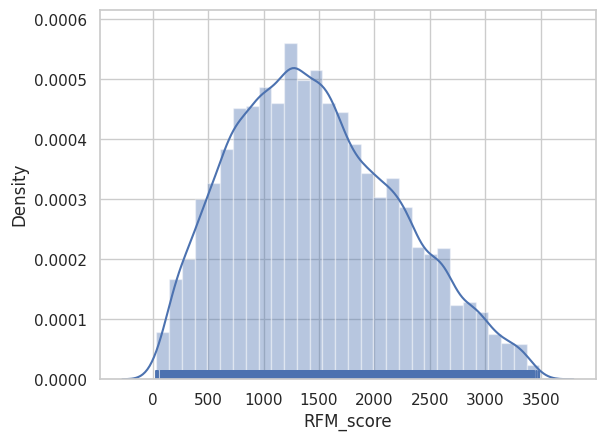

In [226]:
# Dist Plot

sns.distplot(join_RFM_df['RFM_score'], bins=30, rug=True)
plt.show()

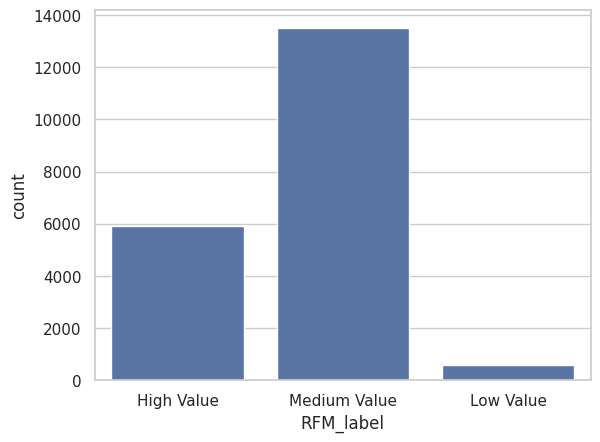

In [227]:
# Count Plot

sns.countplot(data=join_RFM_df, x='RFM_label')
plt.show()

### 兩個維度：x軸cate, y軸num

*   Strip Plot
*   Box Plot
*   Count Plot (x & hue都是cate)

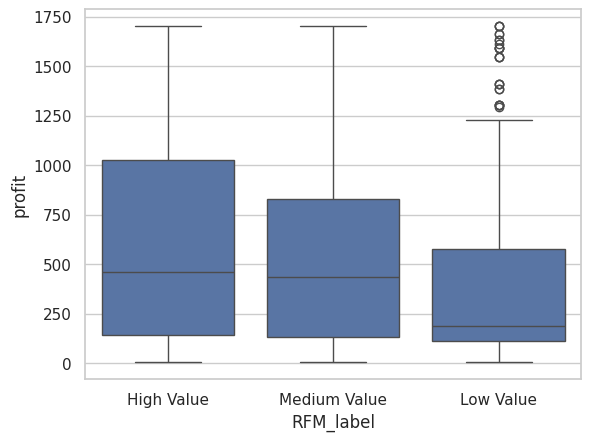

In [228]:
# Box Plot
sns.boxplot(data=join_RFM_df, x='RFM_label', y='profit')
plt.show()

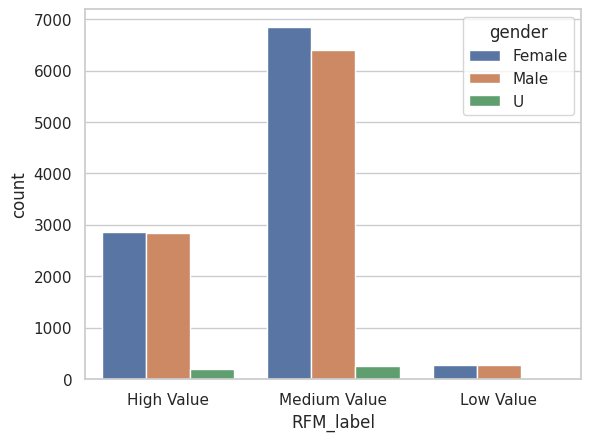

In [229]:
# Count Plot
sns.countplot(data=join_RFM_df, x='RFM_label', hue='gender')
plt.show()

### 三個維度： ：x軸cate, y軸num, hue
*   Strip Plot 散點圖
*   Box Plot 箱型圖(聚合型)
*   Bar Plot 條形圖

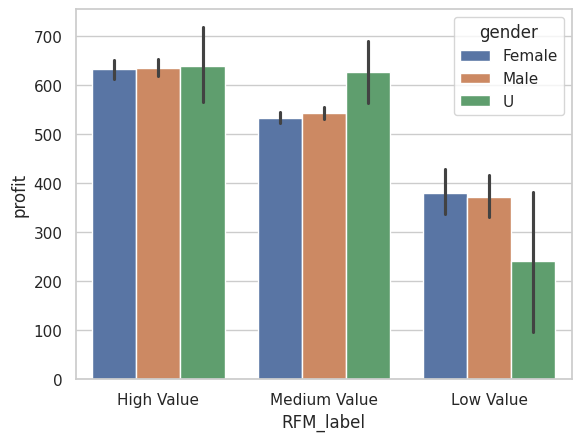

In [230]:
# Bar Plot
sns.barplot(data=join_RFM_df, x='RFM_label', y='profit', hue='gender')
plt.show()

### 三個維度：x軸 ＆ y軸 num, hue

*   Joint Plot
*   Point Plot

### 多個維度： Cat Plot

<Figure size 2000x1000 with 0 Axes>

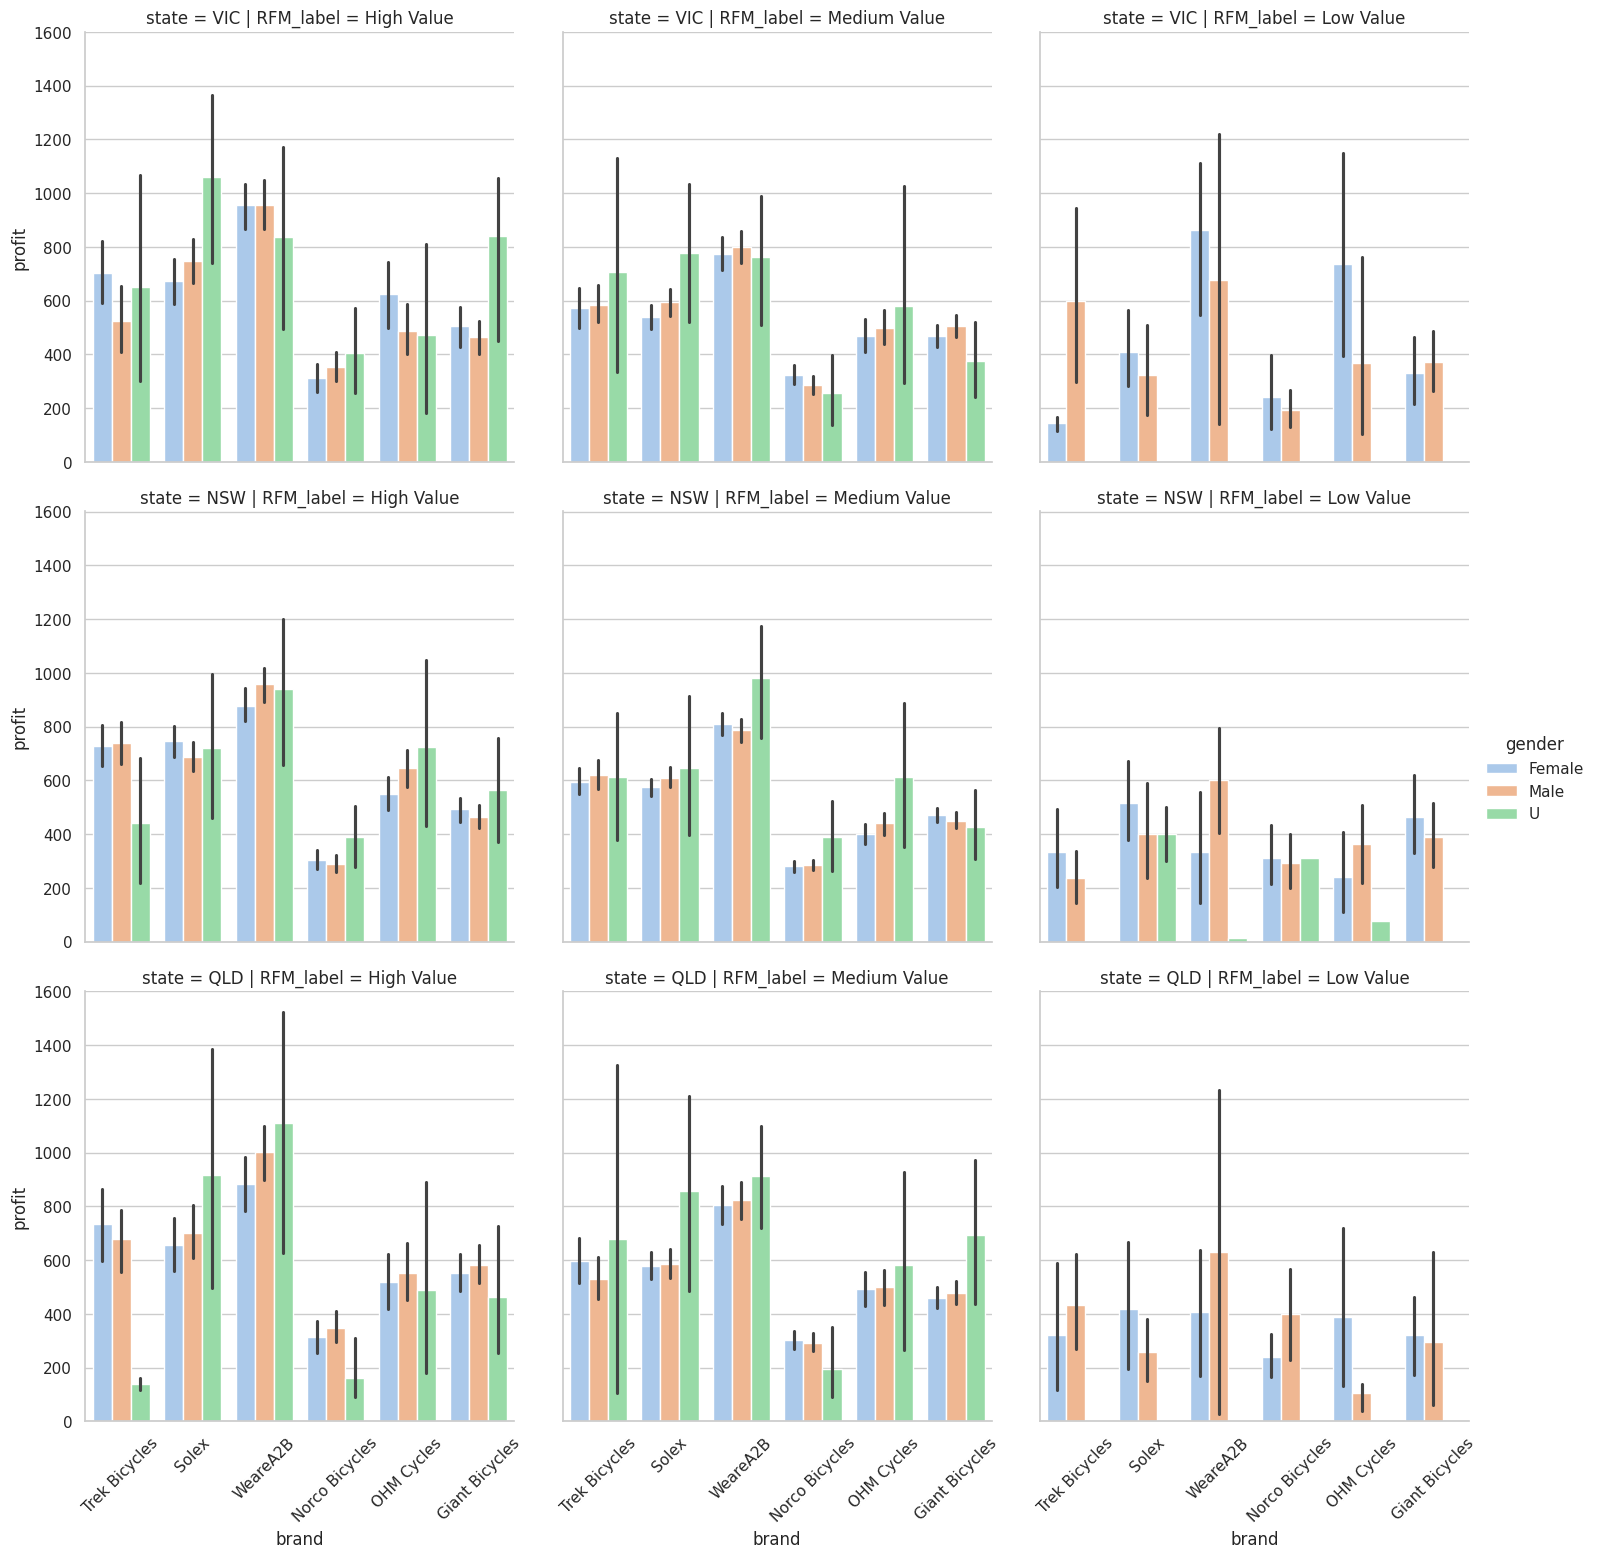

In [231]:
sns.set(style='whitegrid', palette='pastel')
plt.figure(figsize=(20, 10))


plot_3 = sns.catplot(x='brand', y='profit', data=join_RFM_df, hue='gender', col='RFM_label', row='state',kind='bar')
plot_3.set(xlabel="brand",ylabel="profit")
for ax in plot_3.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

### 多個Num V: Heat Plot

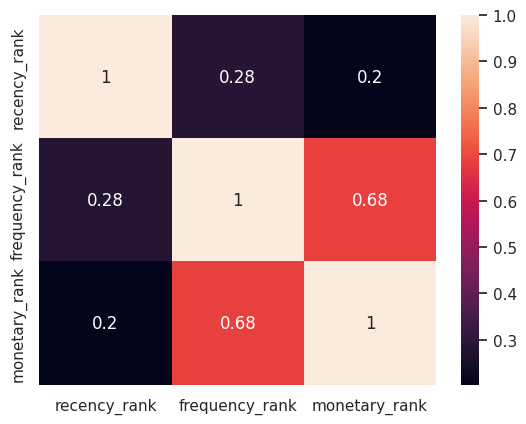

In [232]:
sns.heatmap(join_RFM_df[["recency_rank","frequency_rank","monetary_rank"]].corr(), annot=True)
plt.show()

# RFM Segmentation Analysis

### 提取Data

In [233]:
df_rfm = join_RFM_df.groupby(['customer_id'])['profit'].sum().reset_index()
df_rfm['rank_M'] = join_RFM_df['profit'].rank(ascending = False)

In [234]:
df_52 = join_RFM_df[(join_RFM_df['CohortMonth'] == '2024-07-01') & (join_RFM_df['CohortIndex'] == 2)]
df_28 = join_RFM_df[(join_RFM_df['CohortMonth'] == '2024-07-01') & (join_RFM_df['CohortIndex'] == 3)]

### 單一維度：y = 'profit’

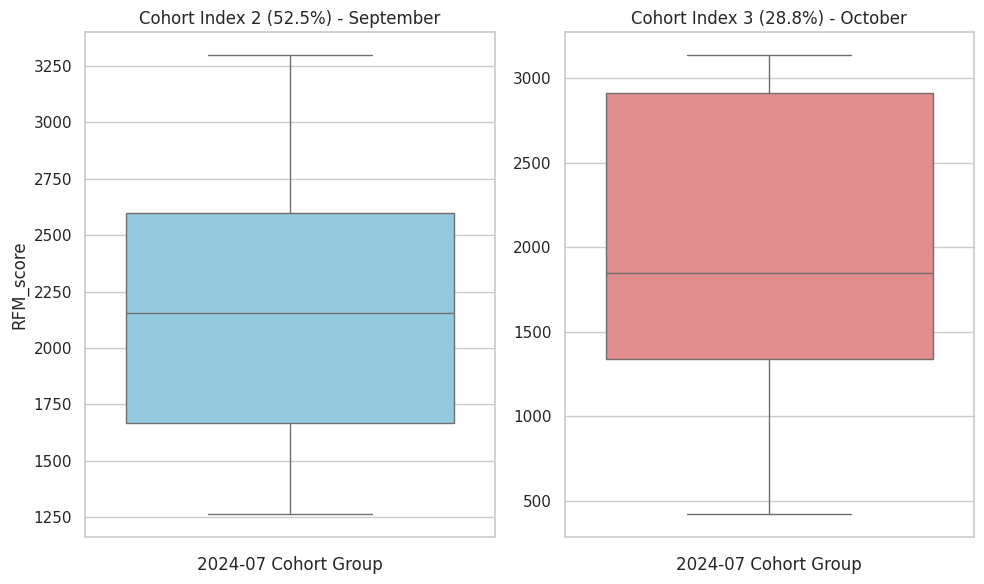

In [235]:
# Box Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.boxplot(data=df_52, y='RFM_score', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("RFM_score")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.boxplot(data=df_28, y='RFM_score', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

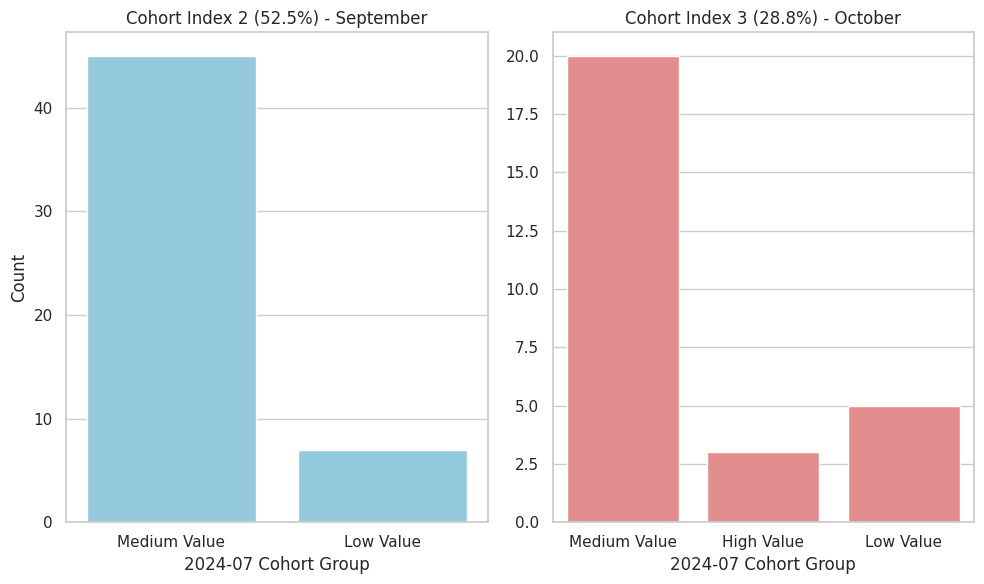

In [236]:
# Count Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.countplot(data=df_52, x='RFM_label', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.countplot(data=df_28, x='RFM_label', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

### 兩個維度：x軸cate, y軸num
- Strip Plot
- Box Plot
- Count Plot (x & hue都是Cate)

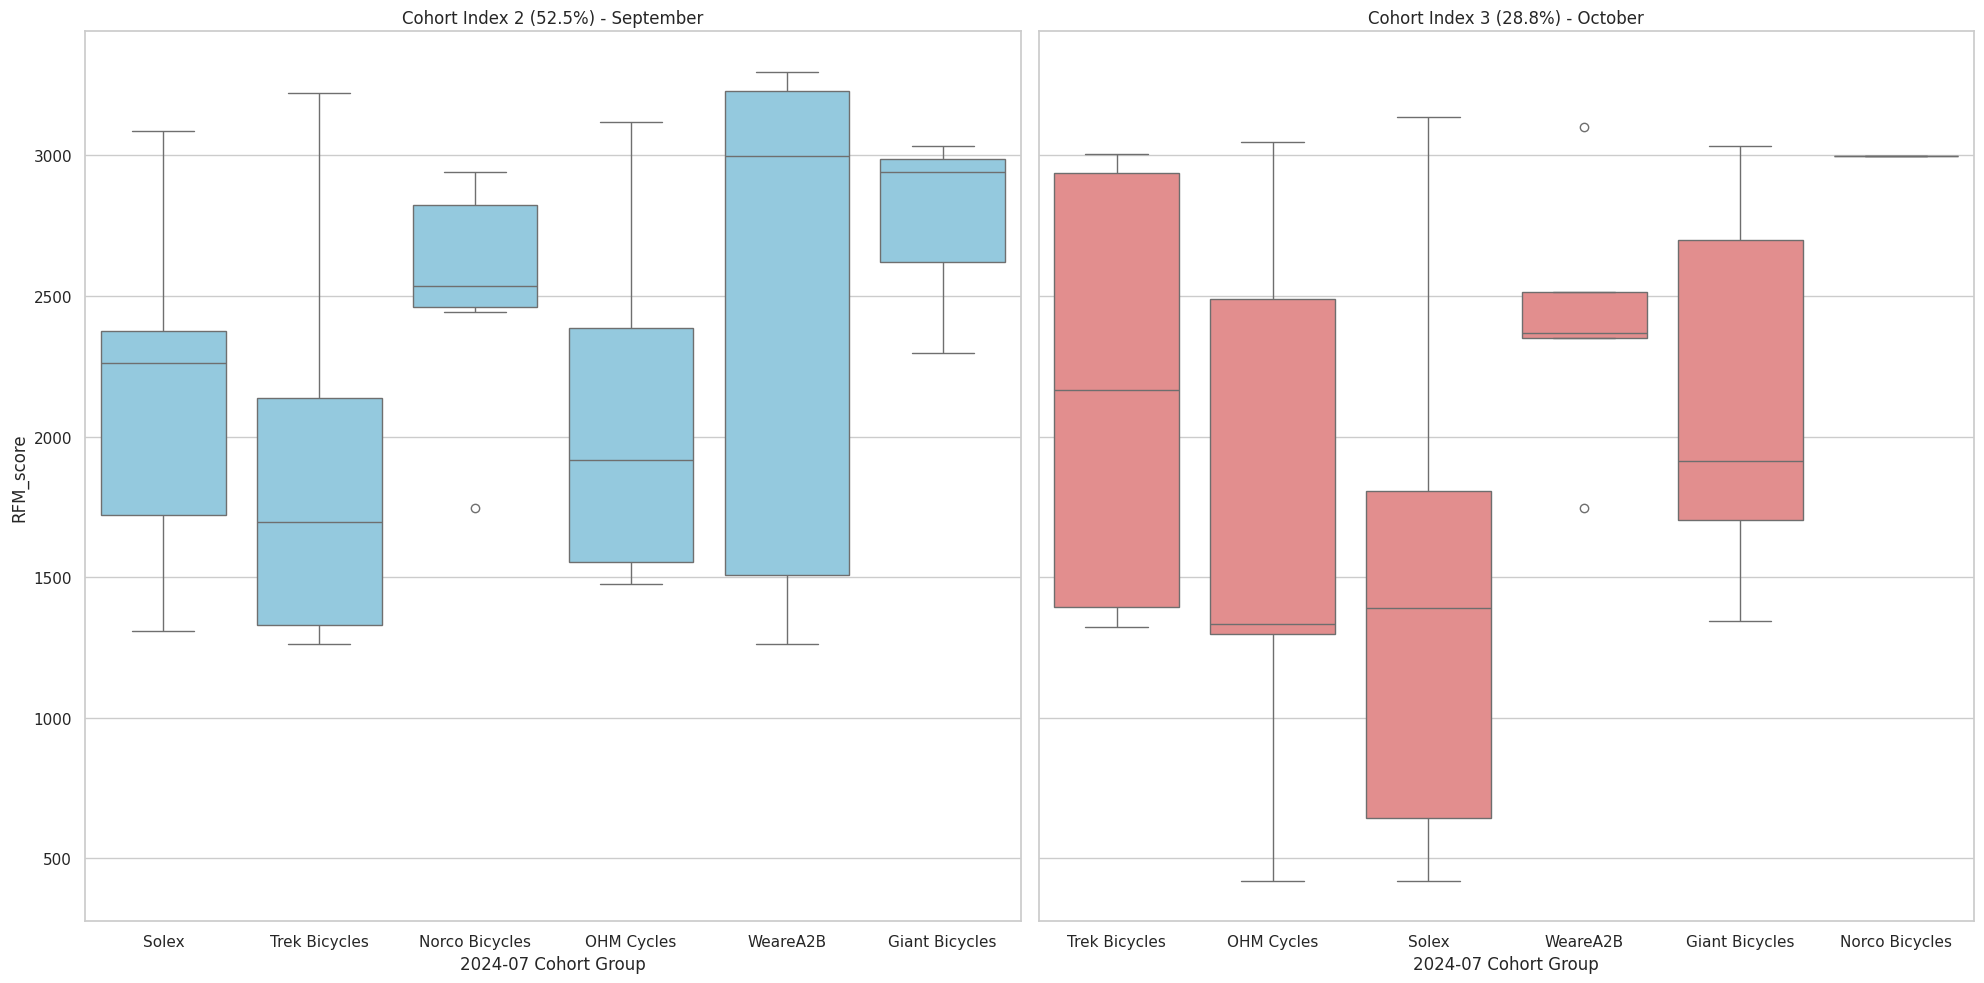

In [237]:
# Box Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.boxplot(data=df_52, x='brand', y='RFM_score', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("RFM_score")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.boxplot(data=df_28, x='brand', y='RFM_score', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()


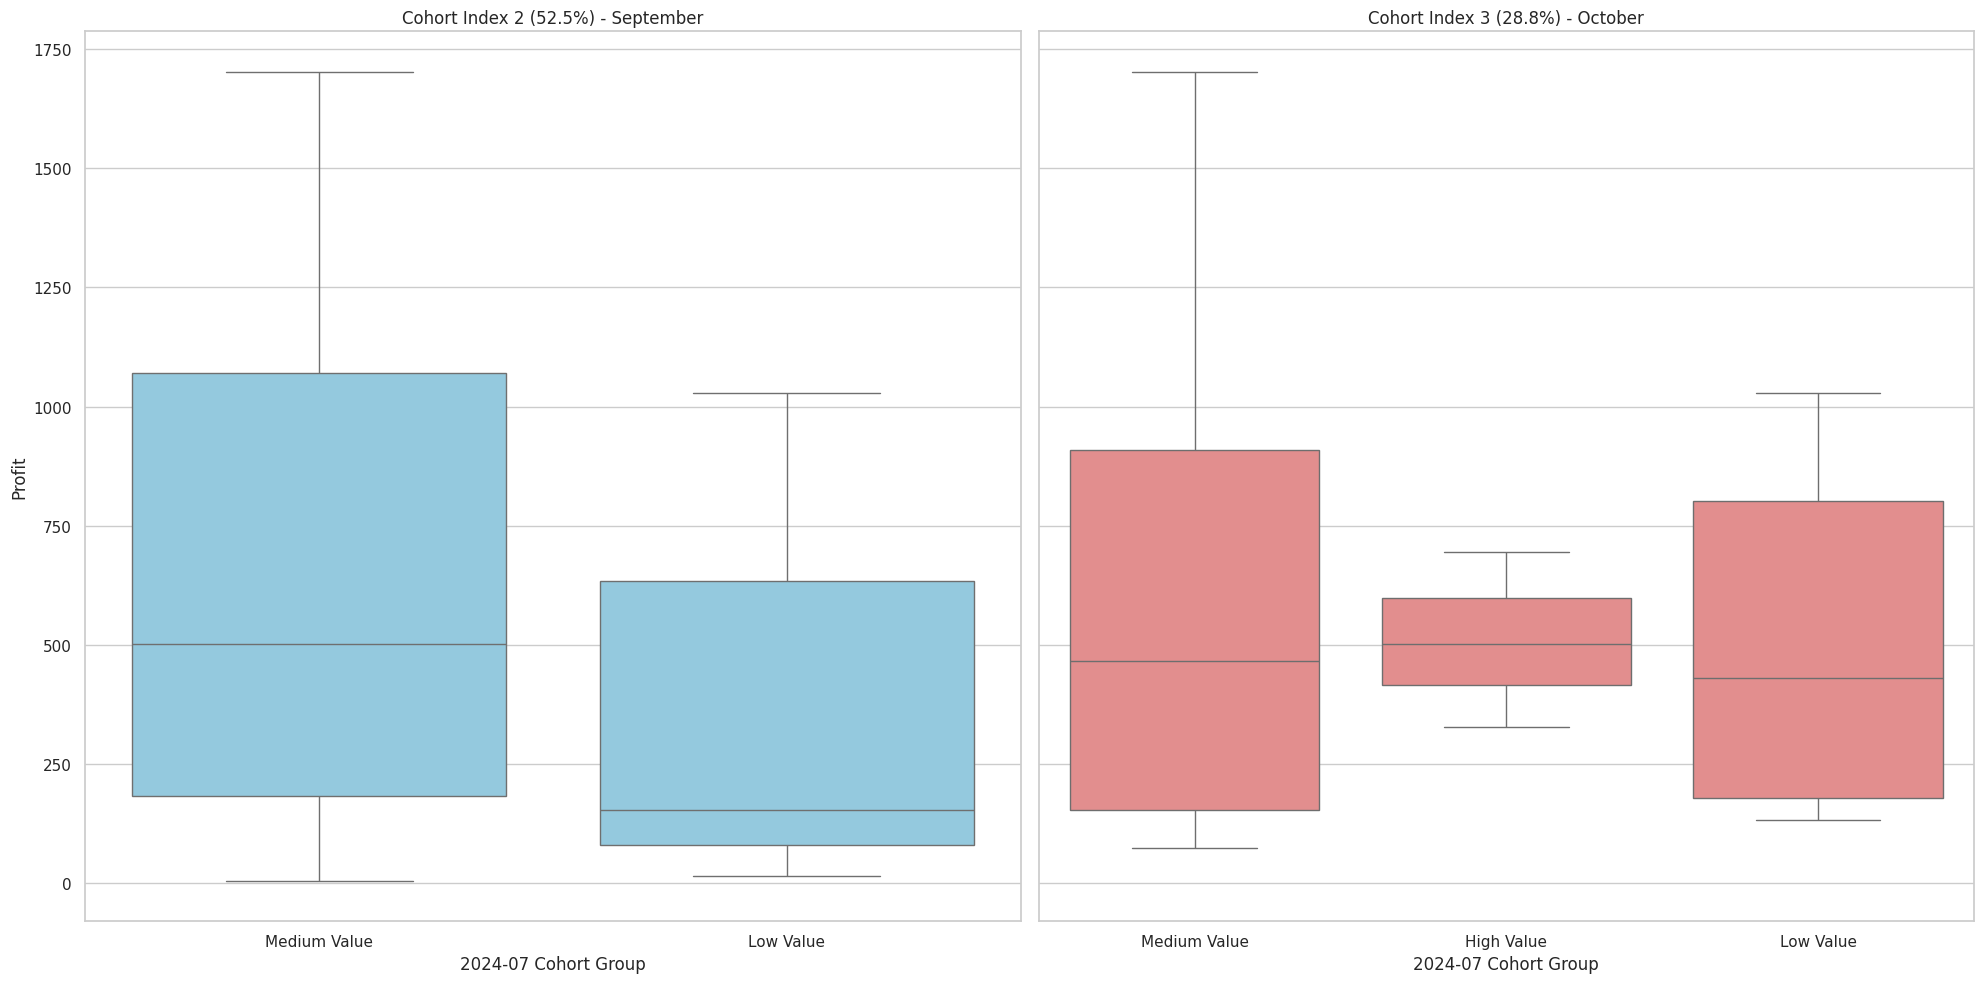

In [238]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.boxplot(data=df_52, x='RFM_label', y='profit', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.boxplot(data=df_28, x='RFM_label', y='profit', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

/tmp/ipython-input-239-1785704830.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df_52, x='RFM_label', hue='gender', ax=axes[0], color='skyblue')
/tmp/ipython-input-239-1785704830.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.countplot(data=df_28, x='RFM_label', hue='gender', ax=axes[1], color='lightcoral')


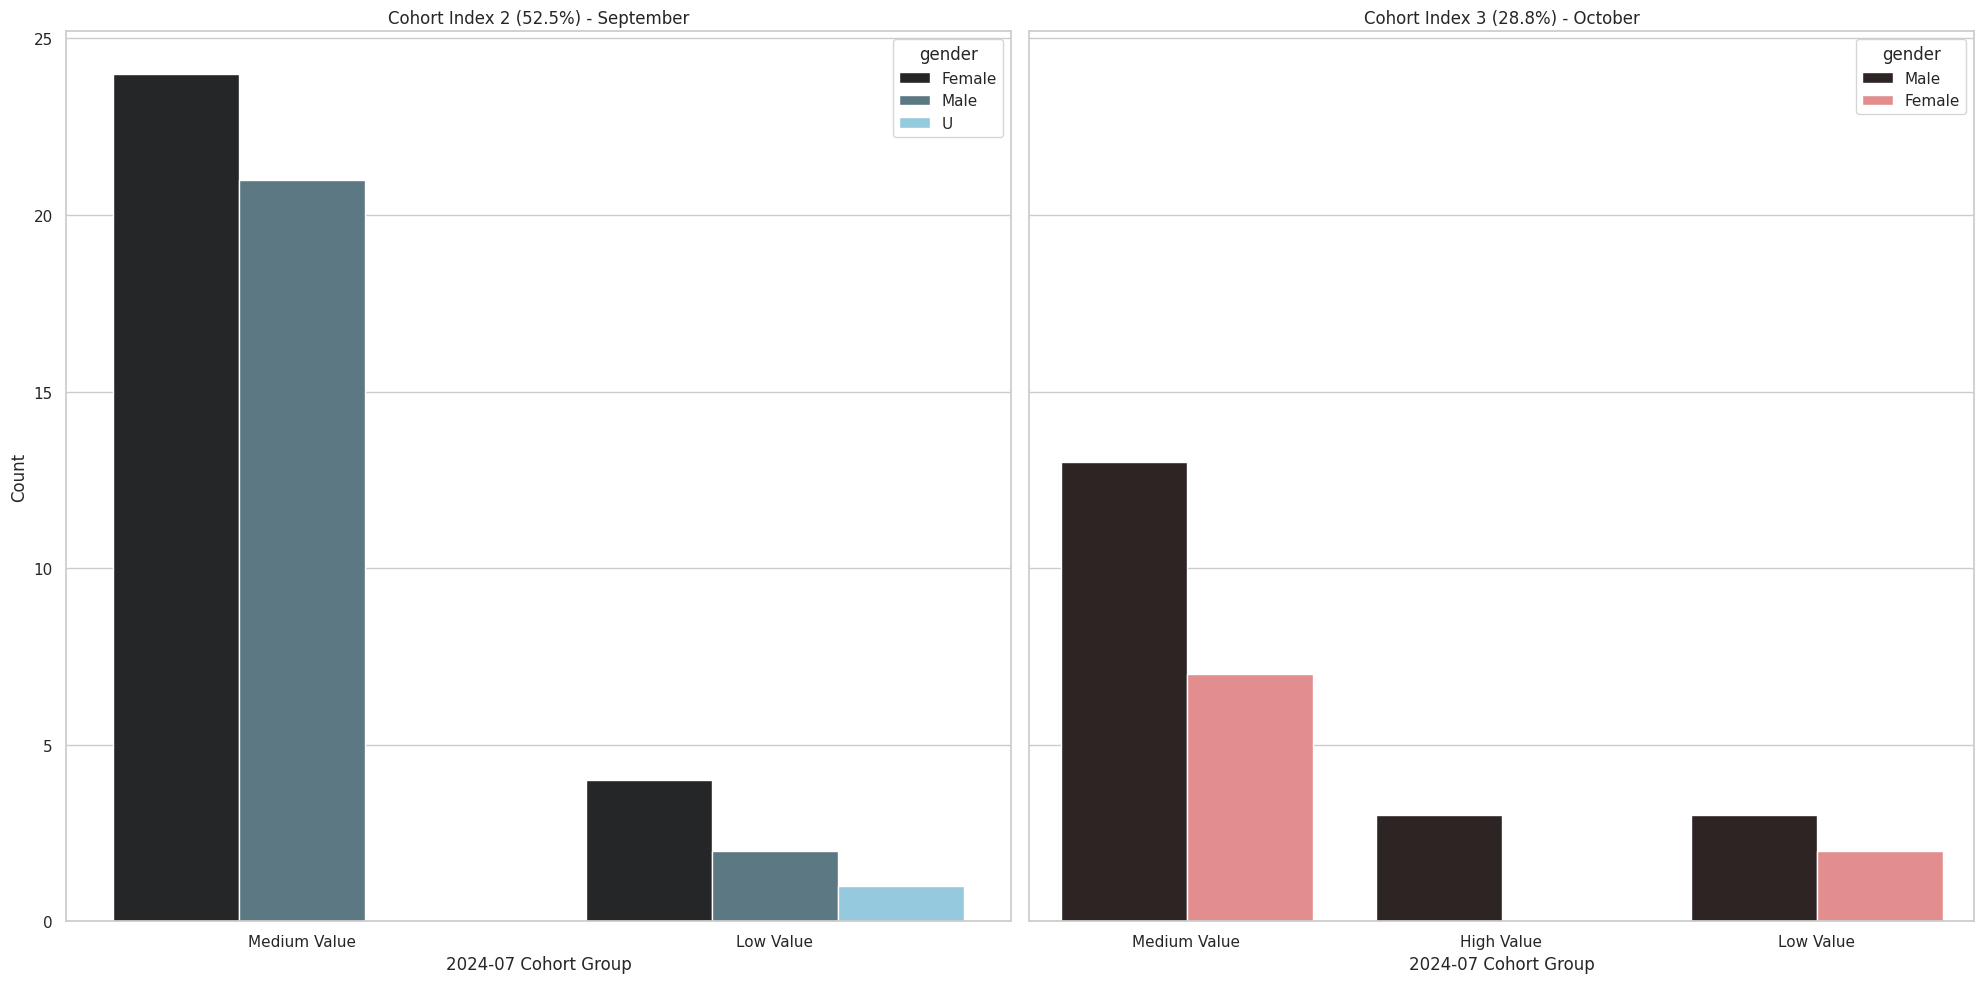

In [239]:
# Count Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.countplot(data=df_52, x='RFM_label', hue='gender', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.countplot(data=df_28, x='RFM_label', hue='gender', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

### 三個維度：x軸cate, y軸num, hue
- Strip Plot 散點圖
- Box Plot 箱型圖(聚合型)
- Bar Plot 條形圖

/tmp/ipython-input-240-2082023279.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.barplot(data=df_52, x='RFM_label', y='RFM_score', hue='gender', ax=axes[0], color='skyblue')
/tmp/ipython-input-240-2082023279.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.barplot(data=df_28, x='RFM_label', y='RFM_score', hue='gender', ax=axes[1], color='lightcoral')


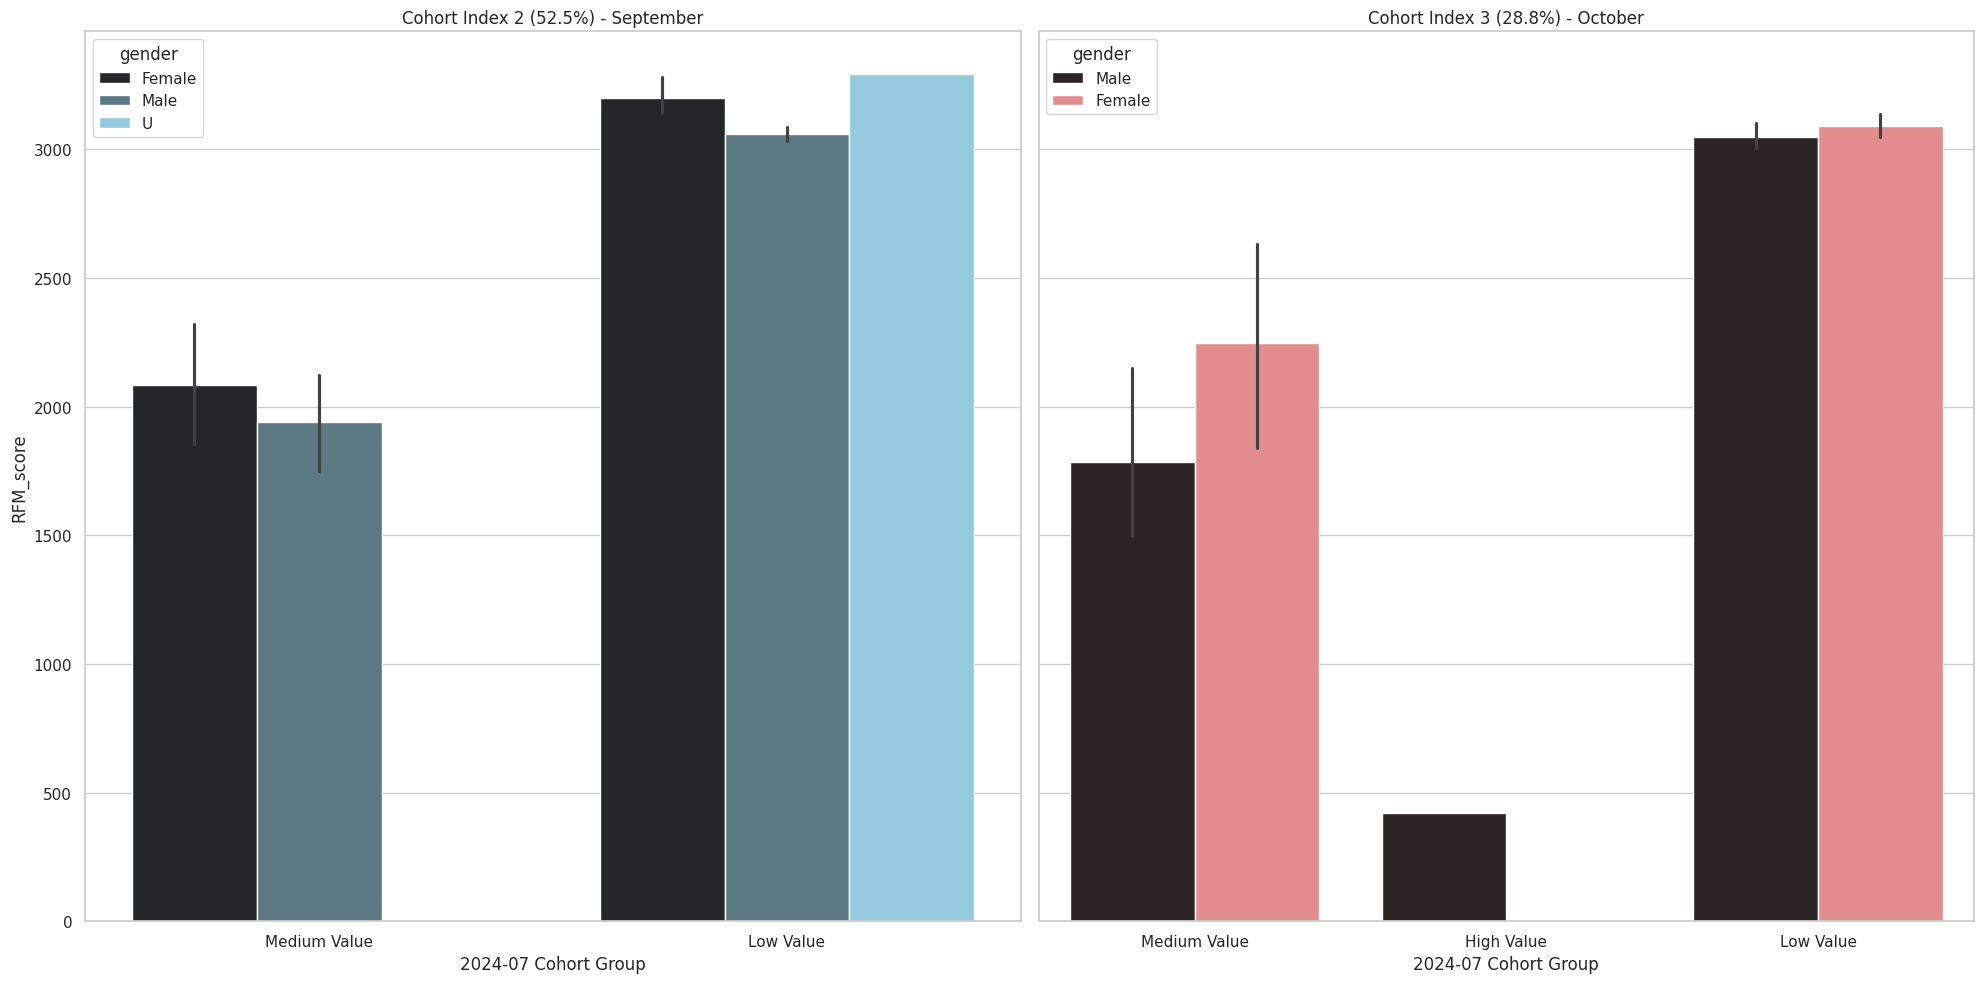

In [240]:
# Bar Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.barplot(data=df_52, x='RFM_label', y='RFM_score', hue='gender', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("RFM_score")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.barplot(data=df_28, x='RFM_label', y='RFM_score', hue='gender', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

/tmp/ipython-input-241-2729416638.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.boxplot(data=df_52, x='state', y='profit', hue='RFM_label', ax=axes[0], color='skyblue')
/tmp/ipython-input-241-2729416638.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightcoral'` for the same effect.

  sns.boxplot(data=df_28, x='state', y='profit', hue='RFM_label', ax=axes[1], color='lightcoral')


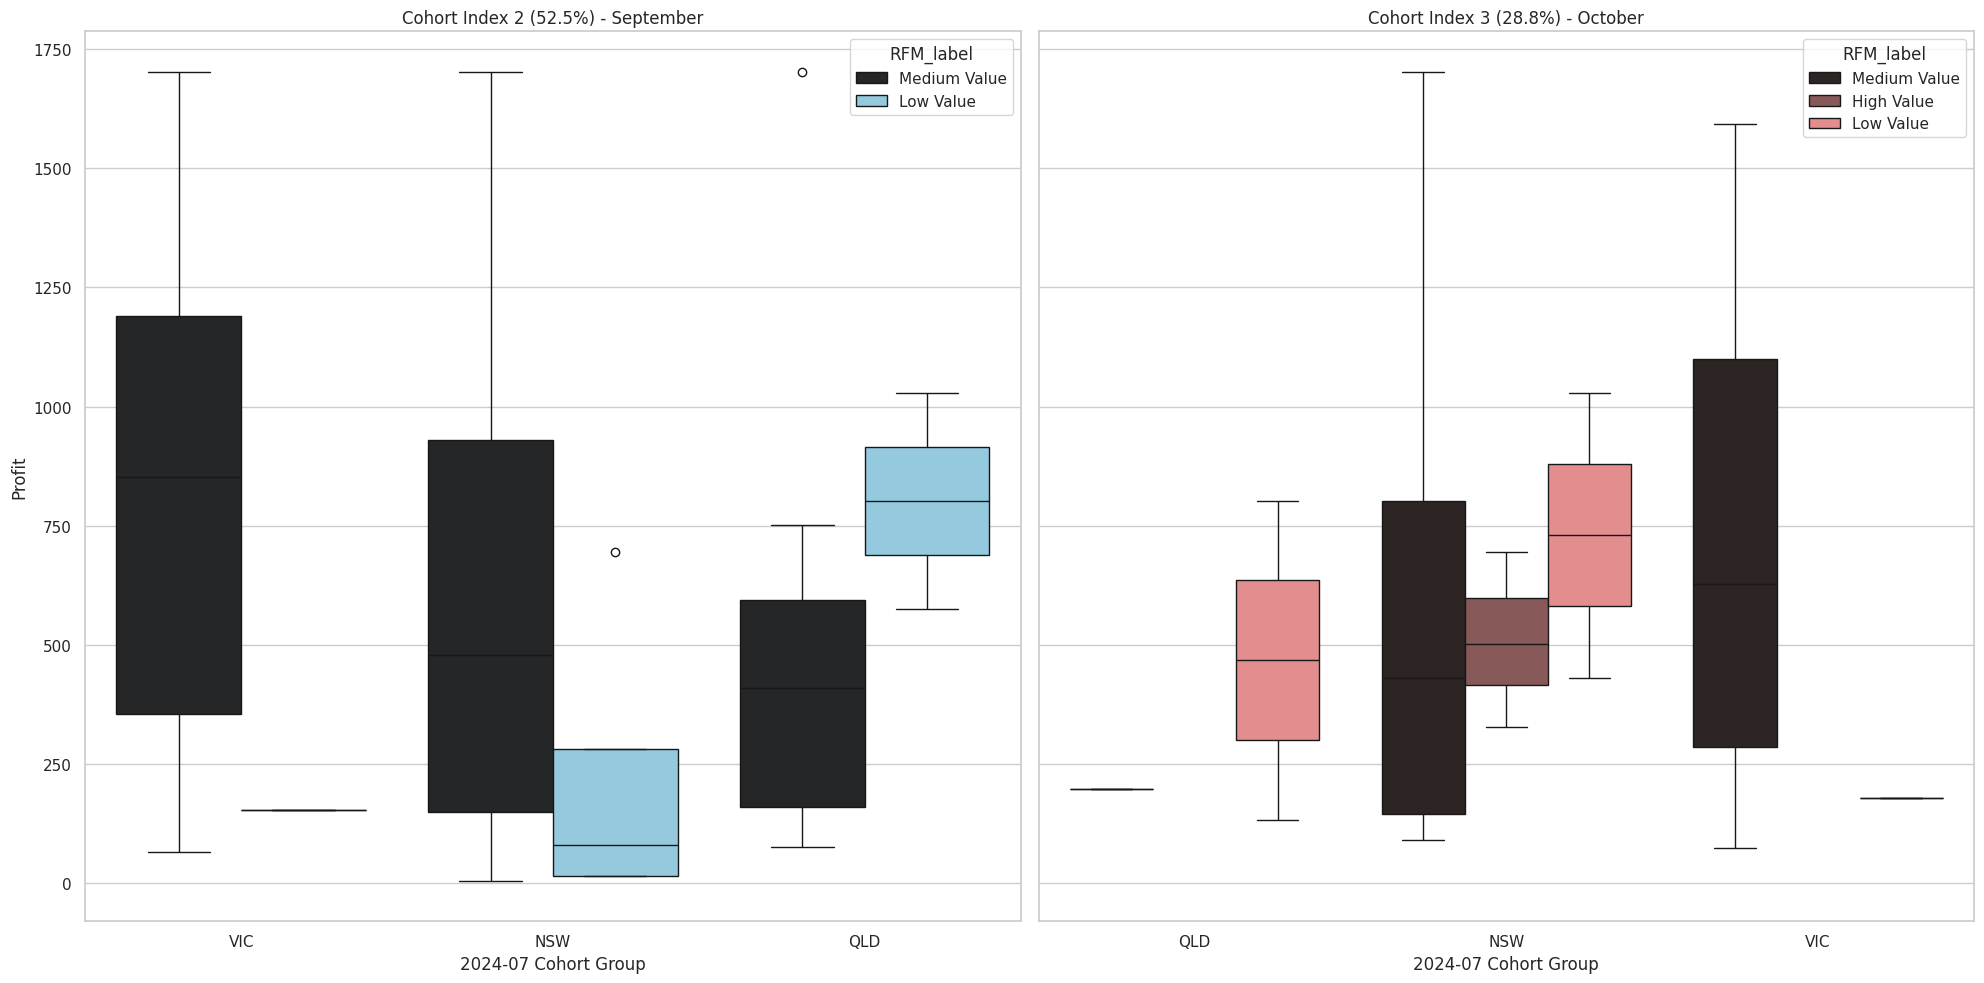

In [241]:
# Box Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

sns.boxplot(data=df_52, x='state', y='profit', hue='RFM_label', ax=axes[0], color='skyblue')
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_ylabel("Profit")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.boxplot(data=df_28, x='state', y='profit', hue='RFM_label', ax=axes[1], color='lightcoral')
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()

### 三個維度： x軸 & y軸 Num, hue
- Joint Plot
- Point Plot

In [242]:
# 畫這兩個圖的意義不大

### 多個維度：Cat Plot

<Figure size 2000x1000 with 0 Axes>

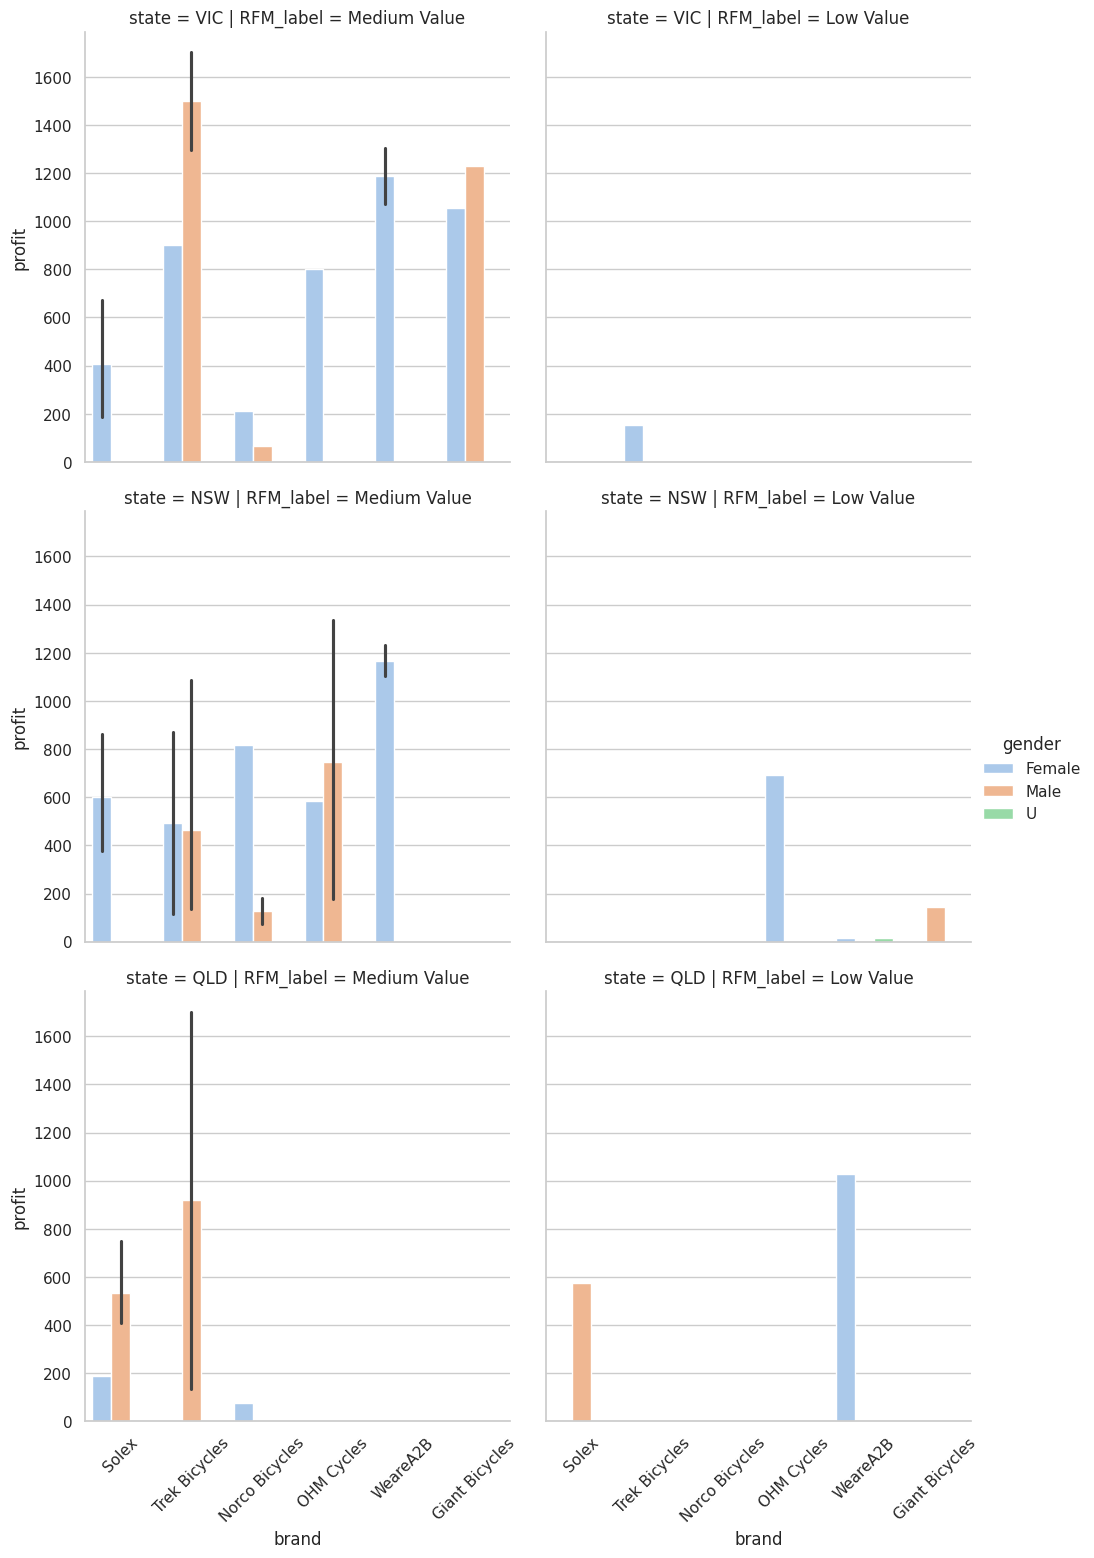

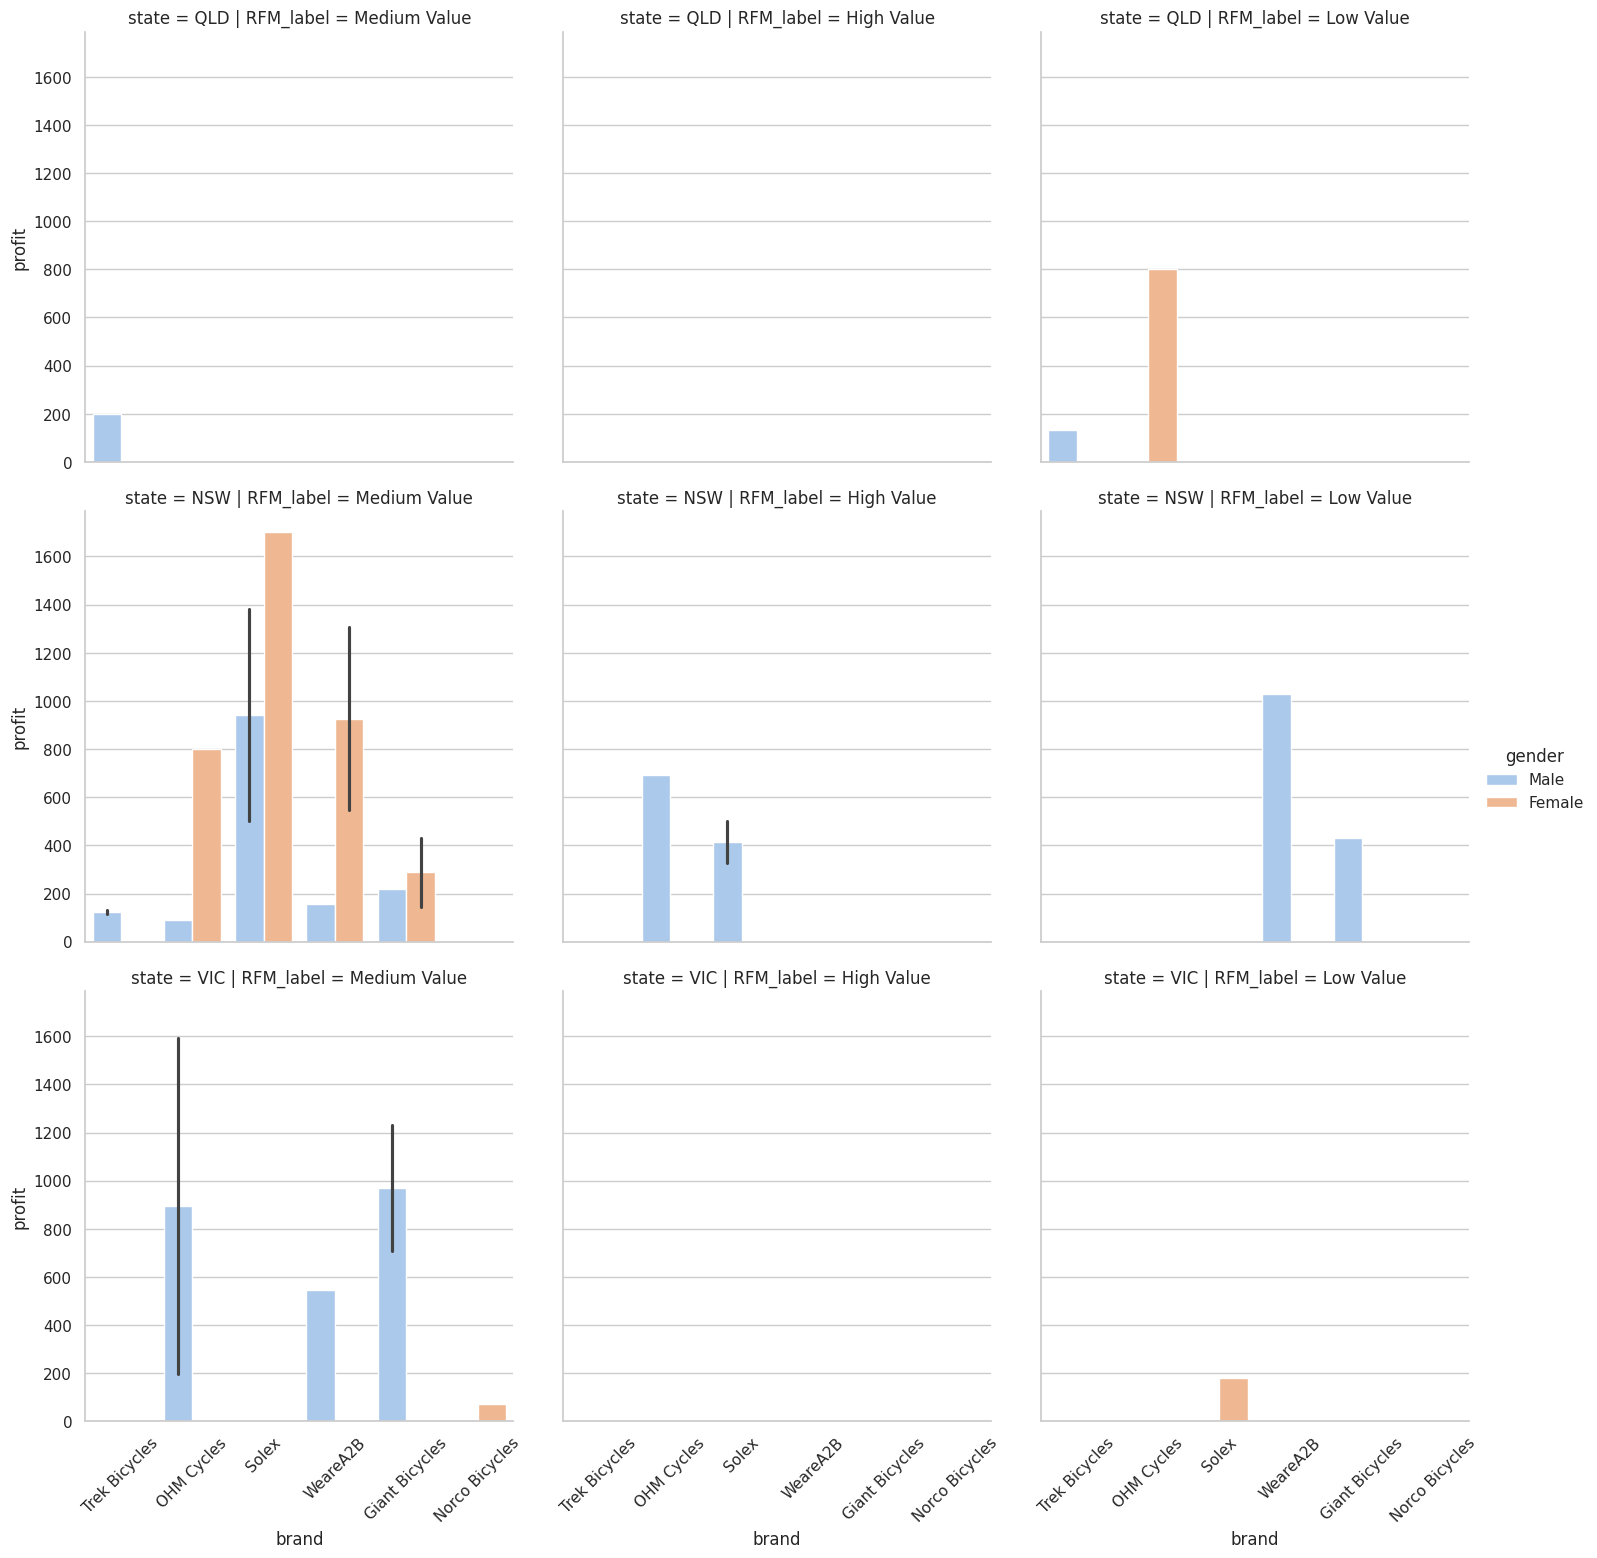

In [243]:
sns.set(style='whitegrid', palette='pastel')
plt.figure(figsize=(20, 10))


plot_52 = sns.catplot(x='brand', y='profit', data=df_52, hue='gender', col='RFM_label', row='state',kind='bar')
plot_52.set(xlabel="brand",ylabel='profit')
for ax in plot_52.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

plot_28 = sns.catplot(x='brand', y='profit', data=df_28, hue='gender', col='RFM_label', row='state',kind='bar')
plot_28.set(xlabel="brand",ylabel='profit')
for ax in plot_28.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

### 多個Num V維度：Heat Plot

In [244]:
df_52[["recency_rank","frequency_rank","monetary_rank"]].corr()
df_28[["recency_rank","frequency_rank","monetary_rank"]].corr()

recency_rank  frequency_rank  monetary_rank
recency_rank        1.000000        0.818246       0.604148
frequency_rank      0.818246        1.000000       0.730068
monetary_rank       0.604148        0.730068       1.000000

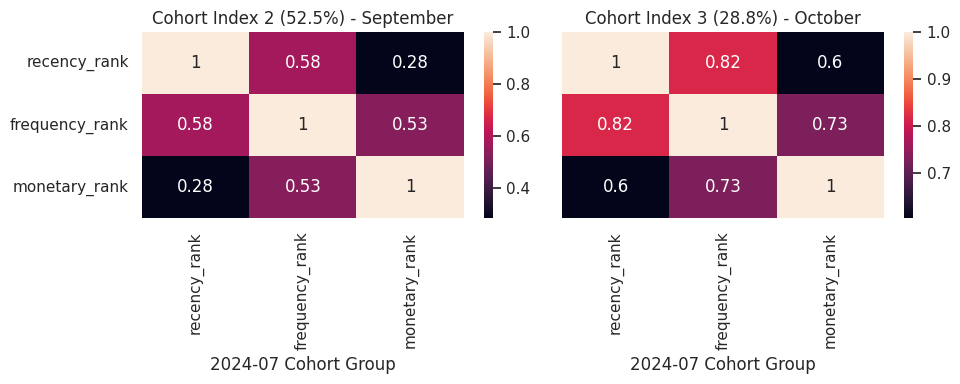

In [245]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

sns.heatmap(df_52[["recency_rank","frequency_rank","monetary_rank"]].corr(), annot=True, ax=axes[0])
axes[0].set_title("Cohort Index 2 (52.5%) - September")
axes[0].set_xlabel("2024-07 Cohort Group")

sns.heatmap(df_28[["recency_rank","frequency_rank","monetary_rank"]].corr(), annot=True, ax=axes[1])
axes[1].set_title("Cohort Index 3 (28.8%) - October")
axes[1].set_xlabel("2024-07 Cohort Group")

plt.tight_layout()
plt.show()